In [1]:
# Import Libries

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV, RidgeCV, SGDRegressor
from sklearn.preprocessing import MinMaxScaler



import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# Read data

df = pd.read_csv('../Dat/FINAL_USO.csv')

y = df['Adj Close']

# Selecting gold features
gold_features = ['Open', 'High', 'Low', 'Volume']
X = df[gold_features]
X.head()

,Open,High,Low,Volume
0,154.740005,154.949997,151.710007,21521900
1,154.309998,155.369995,153.899994,18124300
2,155.479996,155.860001,154.360001,12547200
3,156.820007,157.429993,156.580002,9136300
4,156.979996,157.529999,156.130005,11996100


In [3]:
# check data

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
# Checking null values

df.isnull().values.any()

False

In [5]:
# Linear Regression()

gold_lr = LinearRegression()

# fit model

gold_lr.fit(X, y)

print("Making predictions for the first 5 Entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(gold_lr.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())

Making predictions for the first 5 Entries

         Open        High         Low    Volume
0  154.740005  154.949997  151.710007  21521900
1  154.309998  155.369995  153.899994  18124300
2  155.479996  155.860001  154.360001  12547200
3  156.820007  157.429993  156.580002   9136300
4  156.979996  157.529999  156.130005  11996100

The predictions are:

[152.55743325 154.81709905 154.92457233 157.14066214 156.77663033]

The actual values are:

0    152.330002
1    155.229996
2    154.869995
3    156.979996
4    157.160004
Name: Adj Close, dtype: float64


In [6]:
# Model validation

predicted_adj_close = gold_lr.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = gold_lr.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.24778906753825822
0.21905793913673588


In [7]:
# Partition data into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Define a new model for training set
gold_lr = LinearRegression()

# Fit mode
gold_lr.fit(train_X, train_y)

# Get predicted prices on validation data
val_predictions = gold_lr.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

0.22434694334979258


MAE: 0.19397976138432585


<AxesSubplot:xlabel='Adj Close'>

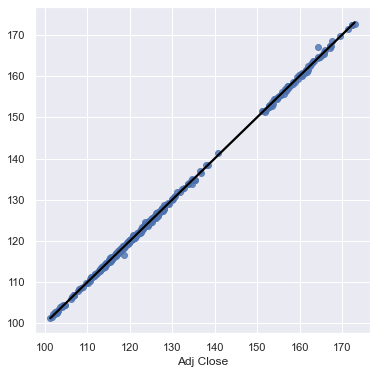

In [32]:
# Creating a data pipeline
gold_lr = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('gold_lr', gold_lr)])

# Preprocessiong of training data, fit model
pipeline.fit(train_X, train_y)

# Preprocession of validation data, get predictions
preds = pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display model
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

In [9]:
# Run model through cross-validation

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')

print("MAE scores:\n", scores, "\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y, preds))
print("\nRMSE is", rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)

MAE scores:
 [0.33869539 0.28749731 0.27608857 0.18376062 0.19862309 0.20854433
 0.23916281 0.16176519 0.17072235 0.14091063] 

Average MAE score (across all ten folds):
0.2205770272159402

RMSE is 0.3257335889268298

r2 score is 0.9996725196712225


In [10]:
# Create a Gradient Boosting Model
gold_xgb = XGBRegressor()

# Fit model 
gold_xgb.fit(train_X, train_y)

# Make predictions using XGBoost model
predictions = gold_xgb.predict(val_X)
print("Mean Absolute Error: ", mean_absolute_error(predictions, val_y))


Mean Absolute Error:  0.3436271869697034


This is much worse than our linear regression model. We will need to adjust some of our parameters to make sure we get the best result XGBoost can afford us. We will start by changing: 

1. The number of estimators - the number of times it will go through the modeling cycle.

2. The early stopping round - the parameter we set to stop the model when our validation scrore stops improving.

3. Learning rate - the parameter that means each model will help us less. The lower we set the learning rate, generally, the more accurate our predictions will be. 

4. n_jobs - we would change this to build our models faster. Ideally, you match this to the number of cores on your machine to shorten the amount of time the model is being fit. 

Mean Absolute Error 0.32507077580850213

r2 score is 0.9996725196712225


<AxesSubplot:xlabel='Adj Close'>

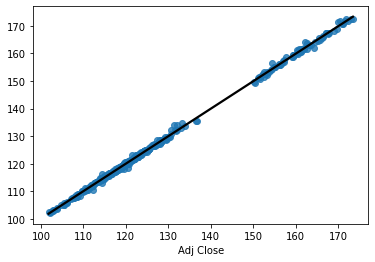

In [11]:
# Adjusted Gradient Boosting Model
gold_adj_xgb = XGBRegressor(n_estimators=1000,
                          learning_rate=0.03,
                          n_jobs=4)
gold_adj_xgb.fit(train_X, train_y, 
              early_stopping_rounds=5, 
              eval_set=[(val_X, val_y)],
              verbose=False)

predictions = gold_adj_xgb.predict(val_X)
print("Mean Absolute Error", 
     mean_absolute_error(predictions, val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})


In this instance, XGBoost has a MAE of 0.325 and an RMSE of 0.490. The linear regresion model gave an average MAE of 0.221 after it ws run throght ten folds of cross valiisation and an RMSE 0f 0.326. The linear regression model is slightly superior to SGBoost when given these parameters and validation technigues.


Feature Engineering

Using feature enginnering to determine what are hightly correlated features and seee if we can build a better model with them We'll start by ranking features with mutual infirmation and show which features rank the highest with seaborn.


In [12]:
# Refresh on what all of the features look like
# There are 79 predictor columns. I'm not including Adj Close and Close of the 81 total. 

plt.style.use("seaborn-whitegrid")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [13]:
# Create new ds with all predictor features. Take Adj Close as Y
# Remove Close because it is too close to Adj Close

X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Close, Length: 1718, dtype: float64

In [14]:
# Create mutual info scores

def make_mi_scores (X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

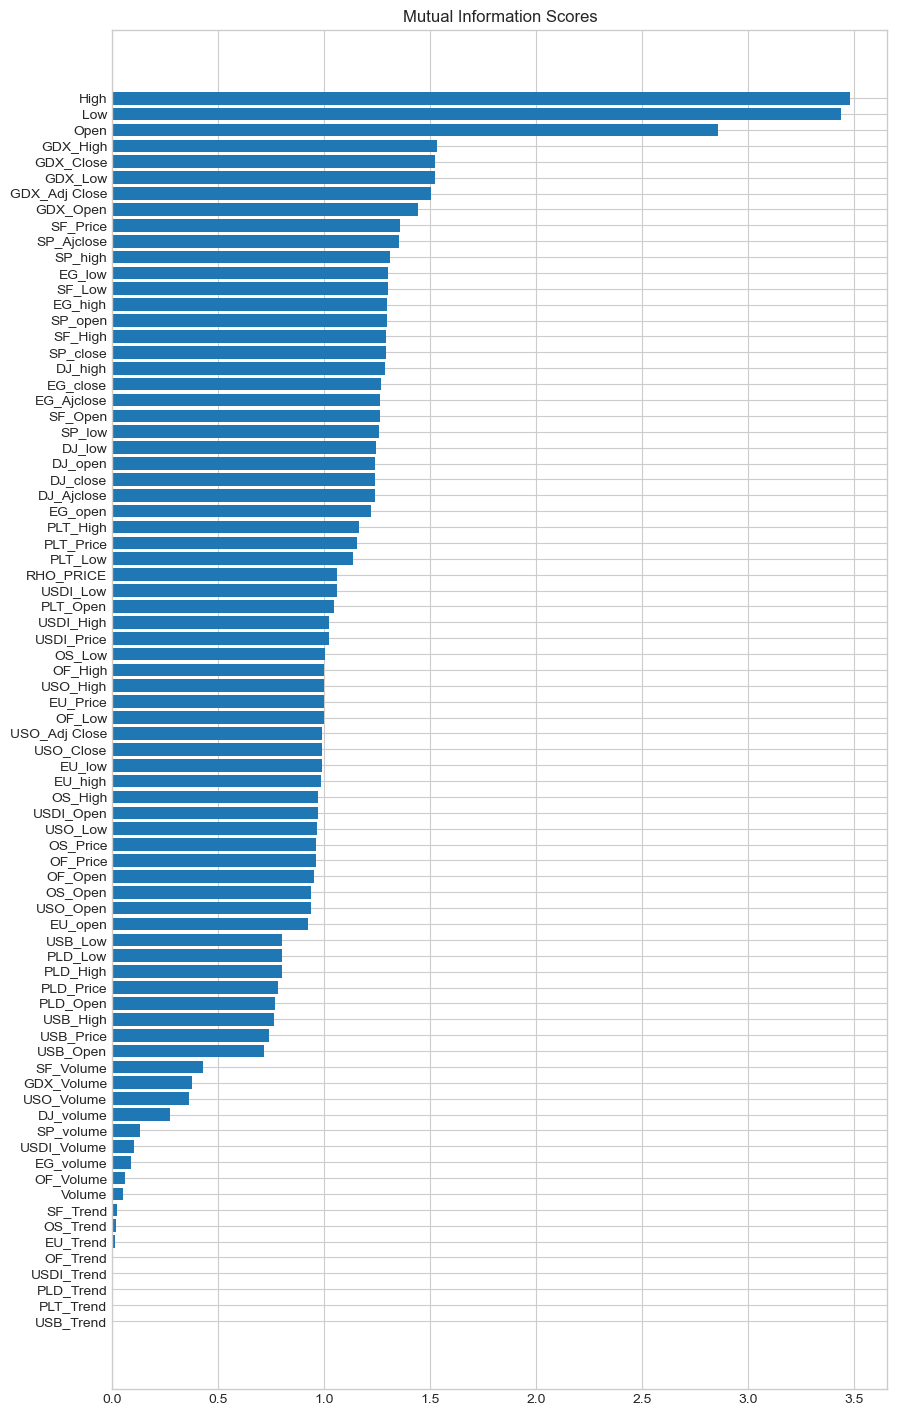

In [15]:
# Construct a bar plot to show each feature's score.

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
plt.figure(dpi=100, figsize=(10,18))
plot_mi_scores(mi_scores)


No wonder our earlier models performed so well. We were already using the best predictors: High, Low, and Open. The predictor we used that has very low mutual information is Volume. In fact, Volume has a lower mutual information than other volumes for stock market indicies. Thanks to the graph above, we know to drop Volume as a predictor and perhaps add in higher ranking predictors such as GDX_High and GDX_Close. It seems that the volume and trend categories of predictors always have a lower MI score than any high, low, or open predictor.

High, Low and Open are extremely correlated to the Adj Close value. Let's create simple regplots to magnify their relationships. You will see that as their mutual information rank gets lower, the less correlated that feature's regplot is with adjusted close.

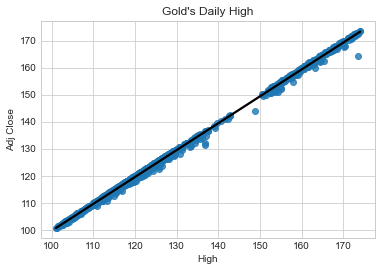

In [16]:
daily_high = sns.regplot(x="High", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily High")

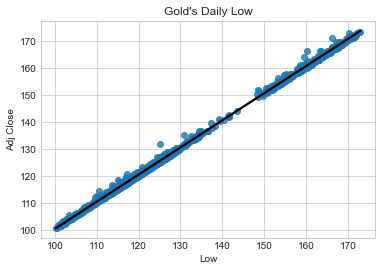

In [17]:
daily_low = sns.regplot(x="Low", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Low")

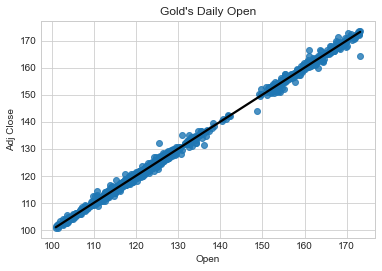

In [18]:
daily_close = sns.regplot(x="Open", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Open")

We can see that these three native features are very good predictors for the adjusted close price. However, what if we can create a new feature that can lend a little more insight into the price of gold. In the code below, we will create a feature called "daily change" by taking the price difference from open and close. Daily change is useless as a predictor on its own, but maybe we can apply it to time-series data to see any trends. Daily change is a way to track the volatility of gold prices.

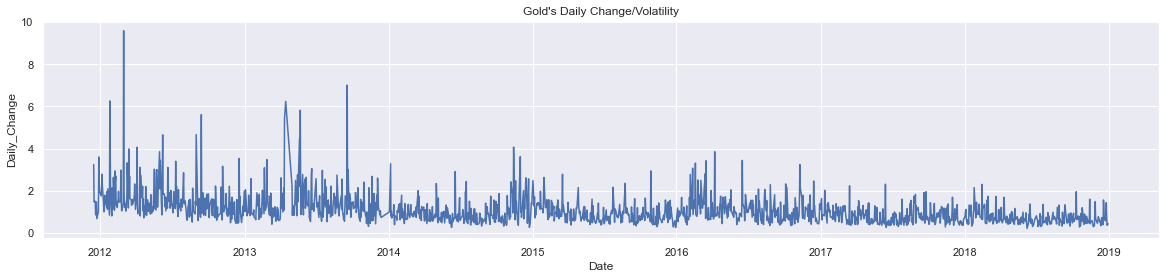

In [19]:
# Create column of Daily_Change
df["Daily_Change"] = abs(X.High - X.Low)

# Convert Data from string to datetime to give us yearly ticks on the X-axis
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="Gold's Daily Change/Volatility")

We can see that gold prices have gotten less volatile since 2012. Around after mid-2017, gold seems to have become less volatile to the end of 2018. If we were to split up the data from 2012-2013 and 2017-2018 and run them through our linear regression model, we would get better performance from the 2017-2018 dataset because the prices have less daily variation than the 2012-2013 subset. The main takeaway here is that gold volatility has decreased overtime. However, the Adjusted Close has also gone down, as visualized below.

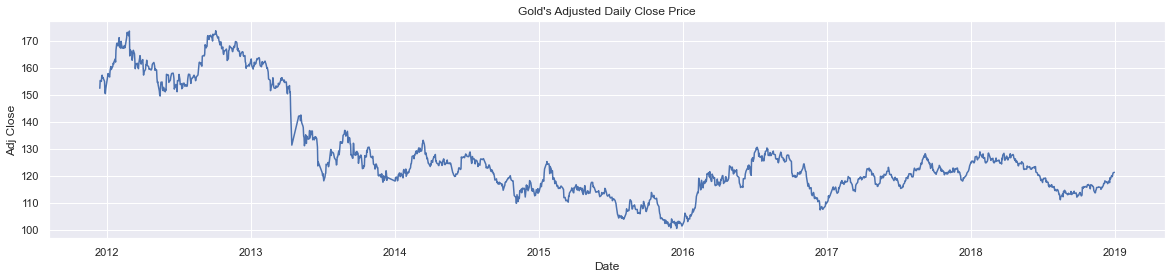

In [20]:
# Adjusted Close with Time Series
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=df).set(title="Gold's Adjusted Daily Close Price")

Next we'll apply principal component analysis (PCA). PCA will be good to use with this dataset for two reasons.

- The first is that PCA works well with numeric features. All of our features, with the exception of Date, are numeric features.

- Many of our features are redundant and are closely related mutual information scores. A lot of them can be removed or combined to create principal components. We already know that High, Low, and Open have the highest mutual information scores. We also know that those features alone produce a high-performing linear regression model. To experiment with something new. We will leave in the top six features, which means including the gold index(GDX) features.

In [21]:
features = ["High", "Low", "Open", "GDX_High", "GDX_Low", "GDX_Close"]

X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')
X = X.loc[:, features]

# Standardize the new df. PCA is sensitive to scale.
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [22]:
# Create principal componenets
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.786447,1.084283,0.062709,0.089771,0.020374,-0.008956
1,4.895857,1.091385,-0.013283,-0.007822,-0.004370,-0.009334
2,4.823785,0.920197,0.005722,0.050612,-0.030129,-0.008412
3,5.092355,0.949527,-0.042882,-0.010260,0.000476,0.002431
4,5.095494,0.961803,-0.020048,0.008791,0.007451,0.000329


In [23]:
# Wrap the PCA loadings up in a dataframe
loadings = pd.DataFrame(
    pca.components_.T,       # Transpose the matrix of loadings
    columns=component_names, # to turn columns into principal components
    index = X.columns,       # and the rows are original features, so we can identify them
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
High,0.408326,-0.401039,0.529359,-0.274509,0.192727,-0.528883
Low,0.408168,-0.413142,-0.558814,-0.298090,-0.510041,0.037945
Open,0.408236,-0.410488,0.040841,0.563978,0.321422,0.491724
GDX_High,0.408251,0.408309,0.433426,0.271772,-0.632694,0.067782
GDX_Low,0.408318,0.402371,-0.466389,0.320687,0.285792,-0.518978
GDX_Close,0.408190,0.413960,0.021448,-0.583966,0.342671,0.450686


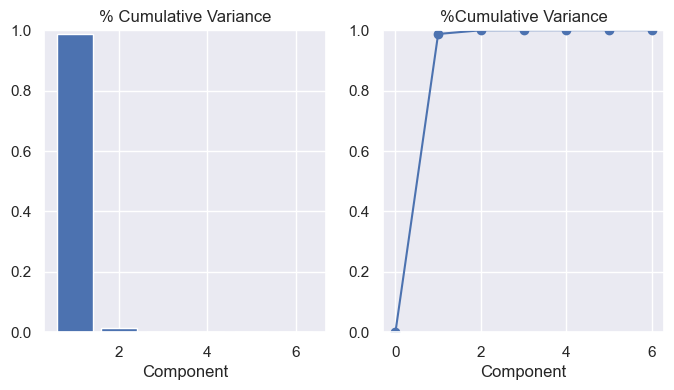

In [24]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0,cv], "o-")
    axs[1].set(
        xlabel="Component", title="%Cumulative Variance", ylim=(0.0,1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

# Look at the explained variance from PCA
plot_variance(pca);

We can see principal component 1 (PC1) is the most informative by far. A disparity is expected usually between PC1 and the remainders. However, this is a very high disparity. If we didn't look at our features through mutual information earlier. This would raise concern. However, we already know that the first three features are highly correlated with our target feature of adjusted close, so these results make sense.

In [25]:
# View MI Scores for the principal components

mi_scores = make_mi_scores(X_pca, y)
mi_scores

PC1    2.185558
PC2    0.509191
PC3    0.113893
PC5    0.095351
PC4    0.034642
PC6    0.011011
Name: MI Scores, dtype: float64

MAE: 0.20111370689259428


[Text(0.5, 1.0, 'Linear Regression with PCA')]

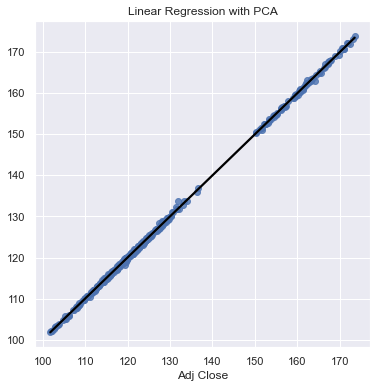

In [26]:
# New Data Pipline with PCA

# Partition the PCA dataframe into training and validation groups

train_X, val_X, train_y, val_y = train_test_split(X_pca, y, random_state = 0)

gold_lr = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('gold_lr', gold_lr)])
# Preprocessing of training data, fit model
pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.set(rc={"figure.figsize":(6,6)})
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"}).set(title="Linear Regression with PCA")



We can already see PCA helped us improve the model's MAE by 0.20. Let's run the new pipeline through cross-validation to get a more accurate score.

In [27]:
# Multiply by -1 since sklearn calculates *negative* MAE

scores = -1 * cross_val_score(my_pipeline, X_pca, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())
rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is", rmse)
r2 = r2_score(val_y,preds)
print("\nr2 score is", r2)

MAE scores:
 [0.29200777 0.27589726 0.24365488 0.15945436 0.17239864 0.17891691
 0.19767476 0.13222747 0.15118348 0.12333965] 

Average MAE score (across all ten folds):
0.19267551793350618

RMSE is 0.2754271255228714

r2 score is 0.9997658611136764


In [28]:
# Three Models Performance Results

results = [['Linear Regression', 0.221, 0.326, 0.999672],
           ['Gradient Boosting (XGBoost)', 0.325, 0.490, 0.999259],
           ['Linear Regression with PCA', 0.193, 0.275, 0.999766]]
results_df = pd.DataFrame(results, columns = ['Model Type', 'MAE', 'RMSE', 'r2'])
results_df

,Model Type,MAE,RMSE,r2
0,Linear Regression,0.221,0.326,0.999672
1,Gradient Boosting (XGBoost),0.325,0.490,0.999259
2,Linear Regression with PCA,0.193,0.275,0.999766


Running the PCA model through ten-fold cross validation gave us our best model performance across all metrics. The simple linear regression model came in second on all metrics as well. XGBoost came in last this time. Although there is slight variation in performance, all three of these models perform well because the top three features are so highly correlated with adjusted time. The dataset has many features, but it would not improve the model significantly by adding ones beyond the top six to a regression model.

In [43]:
# CatBoost in price prediction

train_X, val_X, train_y, val_y = train_test_split(
    train_X, train_y, test_size=0.33, random_state=241)

In [47]:
# CatBoost model

cb_model = CatBoostRegressor(iterations=3500, learning_rate=0.03, od_type='Iter', od_wait=1500,
                             depth=6, random_strength=1,
                             l2_leaf_reg=10,
                              sampling_frequency='PerTree',
                            
                            )
# Fit model

cb_model.fit(train_X, train_y,
          eval_set=(val_X, val_y),
          cat_features=None, use_best_model=True,
          verbose=True)

0:	learn: 17.2881836	test: 18.5818948	best: 18.5818948 (0)	total: 4.15ms	remaining: 14.5s
1:	learn: 17.0288492	test: 18.3053638	best: 18.3053638 (1)	total: 7.76ms	remaining: 13.6s
2:	learn: 16.7944226	test: 18.0779095	best: 18.0779095 (2)	total: 11ms	remaining: 12.8s
3:	learn: 16.6248888	test: 17.9037938	best: 17.9037938 (3)	total: 13.7ms	remaining: 12s
4:	learn: 16.3658182	test: 17.6315664	best: 17.6315664 (4)	total: 16.1ms	remaining: 11.3s
5:	learn: 16.1411181	test: 17.3925449	best: 17.3925449 (5)	total: 18.1ms	remaining: 10.5s
6:	learn: 15.9286891	test: 17.1866851	best: 17.1866851 (6)	total: 20ms	remaining: 9.96s
7:	learn: 15.7340413	test: 16.9861484	best: 16.9861484 (7)	total: 22.6ms	remaining: 9.85s
8:	learn: 15.5081355	test: 16.7830154	best: 16.7830154 (8)	total: 25.2ms	remaining: 9.76s
9:	learn: 15.3416045	test: 16.6297479	best: 16.6297479 (9)	total: 27.4ms	remaining: 9.55s
10:	learn: 15.1527143	test: 16.4451535	best: 16.4451535 (10)	total: 29.3ms	remaining: 9.29s
11:	learn: 14.

137:	learn: 3.3038748	test: 4.3984492	best: 4.3984492 (137)	total: 344ms	remaining: 8.37s
138:	learn: 3.2788295	test: 4.3710053	best: 4.3710053 (138)	total: 347ms	remaining: 8.38s
139:	learn: 3.2454595	test: 4.3354845	best: 4.3354845 (139)	total: 349ms	remaining: 8.37s
140:	learn: 3.2046376	test: 4.2922467	best: 4.2922467 (140)	total: 353ms	remaining: 8.4s
141:	learn: 3.1715280	test: 4.2593307	best: 4.2593307 (141)	total: 356ms	remaining: 8.43s
142:	learn: 3.1376410	test: 4.2227250	best: 4.2227250 (142)	total: 359ms	remaining: 8.42s
143:	learn: 3.1072811	test: 4.1893532	best: 4.1893532 (143)	total: 361ms	remaining: 8.42s
144:	learn: 3.0843367	test: 4.1715643	best: 4.1715643 (144)	total: 364ms	remaining: 8.43s
145:	learn: 3.0557853	test: 4.1387418	best: 4.1387418 (145)	total: 378ms	remaining: 8.69s
146:	learn: 3.0292206	test: 4.1115847	best: 4.1115847 (146)	total: 381ms	remaining: 8.69s
147:	learn: 3.0015650	test: 4.0927227	best: 4.0927227 (147)	total: 383ms	remaining: 8.67s
148:	learn:

303:	learn: 1.1401619	test: 2.4524170	best: 2.4524170 (303)	total: 685ms	remaining: 7.21s
304:	learn: 1.1358082	test: 2.4480772	best: 2.4480772 (304)	total: 688ms	remaining: 7.21s
305:	learn: 1.1320453	test: 2.4455218	best: 2.4455218 (305)	total: 691ms	remaining: 7.21s
306:	learn: 1.1281855	test: 2.4419934	best: 2.4419934 (306)	total: 693ms	remaining: 7.21s
307:	learn: 1.1235930	test: 2.4395744	best: 2.4395744 (307)	total: 695ms	remaining: 7.21s
308:	learn: 1.1191059	test: 2.4364816	best: 2.4364816 (308)	total: 698ms	remaining: 7.21s
309:	learn: 1.1148765	test: 2.4332645	best: 2.4332645 (309)	total: 700ms	remaining: 7.21s
310:	learn: 1.1105675	test: 2.4298931	best: 2.4298931 (310)	total: 702ms	remaining: 7.2s
311:	learn: 1.1072970	test: 2.4286789	best: 2.4286789 (311)	total: 704ms	remaining: 7.2s
312:	learn: 1.1027639	test: 2.4256249	best: 2.4256249 (312)	total: 706ms	remaining: 7.19s
313:	learn: 1.0974631	test: 2.4218111	best: 2.4218111 (313)	total: 710ms	remaining: 7.2s
314:	learn: 1

411:	learn: 0.8491772	test: 2.2580267	best: 2.2580267 (411)	total: 1.06s	remaining: 7.93s
412:	learn: 0.8484683	test: 2.2576686	best: 2.2576686 (412)	total: 1.06s	remaining: 7.94s
413:	learn: 0.8477611	test: 2.2573195	best: 2.2573195 (413)	total: 1.07s	remaining: 7.95s
414:	learn: 0.8436551	test: 2.2533702	best: 2.2533702 (414)	total: 1.07s	remaining: 7.96s
415:	learn: 0.8429819	test: 2.2529357	best: 2.2529357 (415)	total: 1.07s	remaining: 7.96s
416:	learn: 0.8414011	test: 2.2522604	best: 2.2522604 (416)	total: 1.08s	remaining: 7.96s
417:	learn: 0.8388853	test: 2.2509077	best: 2.2509077 (417)	total: 1.08s	remaining: 7.97s
418:	learn: 0.8381953	test: 2.2505675	best: 2.2505675 (418)	total: 1.09s	remaining: 7.99s
419:	learn: 0.8341429	test: 2.2471972	best: 2.2471972 (419)	total: 1.09s	remaining: 8.01s
420:	learn: 0.8334870	test: 2.2467954	best: 2.2467954 (420)	total: 1.1s	remaining: 8.03s
421:	learn: 0.8327984	test: 2.2464804	best: 2.2464804 (421)	total: 1.1s	remaining: 8.03s
422:	learn: 

566:	learn: 0.6542399	test: 2.1359712	best: 2.1359712 (566)	total: 1.38s	remaining: 7.11s
567:	learn: 0.6538711	test: 2.1354098	best: 2.1354098 (567)	total: 1.38s	remaining: 7.11s
568:	learn: 0.6519006	test: 2.1345454	best: 2.1345454 (568)	total: 1.38s	remaining: 7.11s
569:	learn: 0.6509407	test: 2.1341204	best: 2.1341204 (569)	total: 1.38s	remaining: 7.11s
570:	learn: 0.6493561	test: 2.1334376	best: 2.1334376 (570)	total: 1.39s	remaining: 7.12s
571:	learn: 0.6482618	test: 2.1330032	best: 2.1330032 (571)	total: 1.39s	remaining: 7.12s
572:	learn: 0.6468950	test: 2.1324597	best: 2.1324597 (572)	total: 1.39s	remaining: 7.11s
573:	learn: 0.6464577	test: 2.1322269	best: 2.1322269 (573)	total: 1.39s	remaining: 7.11s
574:	learn: 0.6450176	test: 2.1317700	best: 2.1317700 (574)	total: 1.4s	remaining: 7.11s
575:	learn: 0.6445859	test: 2.1315402	best: 2.1315402 (575)	total: 1.4s	remaining: 7.1s
576:	learn: 0.6434570	test: 2.1308108	best: 2.1308108 (576)	total: 1.4s	remaining: 7.1s
577:	learn: 0.6

669:	learn: 0.5379499	test: 2.0765974	best: 2.0764290 (668)	total: 1.71s	remaining: 7.22s
670:	learn: 0.5362572	test: 2.0754961	best: 2.0754961 (670)	total: 1.72s	remaining: 7.23s
671:	learn: 0.5361281	test: 2.0754538	best: 2.0754538 (671)	total: 1.72s	remaining: 7.23s
672:	learn: 0.5355413	test: 2.0753686	best: 2.0753686 (672)	total: 1.72s	remaining: 7.22s
673:	learn: 0.5336285	test: 2.0740286	best: 2.0740286 (673)	total: 1.72s	remaining: 7.22s
674:	learn: 0.5330548	test: 2.0739128	best: 2.0739128 (674)	total: 1.72s	remaining: 7.21s
675:	learn: 0.5319838	test: 2.0732712	best: 2.0732712 (675)	total: 1.73s	remaining: 7.21s
676:	learn: 0.5300750	test: 2.0718410	best: 2.0718410 (676)	total: 1.73s	remaining: 7.2s
677:	learn: 0.5288819	test: 2.0713228	best: 2.0713228 (677)	total: 1.73s	remaining: 7.2s
678:	learn: 0.5277447	test: 2.0703773	best: 2.0703773 (678)	total: 1.73s	remaining: 7.21s
679:	learn: 0.5260826	test: 2.0701921	best: 2.0701921 (679)	total: 1.74s	remaining: 7.21s
680:	learn: 

788:	learn: 0.4454715	test: 2.0280838	best: 2.0280838 (788)	total: 2.04s	remaining: 7.03s
789:	learn: 0.4452110	test: 2.0281073	best: 2.0280838 (788)	total: 2.05s	remaining: 7.02s
790:	learn: 0.4438467	test: 2.0279852	best: 2.0279852 (790)	total: 2.05s	remaining: 7.02s
791:	learn: 0.4424564	test: 2.0270744	best: 2.0270744 (791)	total: 2.05s	remaining: 7.02s
792:	learn: 0.4413685	test: 2.0262604	best: 2.0262604 (792)	total: 2.06s	remaining: 7.02s
793:	learn: 0.4404753	test: 2.0260052	best: 2.0260052 (793)	total: 2.07s	remaining: 7.04s
794:	learn: 0.4401659	test: 2.0257305	best: 2.0257305 (794)	total: 2.07s	remaining: 7.04s
795:	learn: 0.4394317	test: 2.0252747	best: 2.0252747 (795)	total: 2.07s	remaining: 7.04s
796:	learn: 0.4382716	test: 2.0246650	best: 2.0246650 (796)	total: 2.08s	remaining: 7.04s
797:	learn: 0.4373284	test: 2.0249324	best: 2.0246650 (796)	total: 2.08s	remaining: 7.04s
798:	learn: 0.4368553	test: 2.0245456	best: 2.0245456 (798)	total: 2.08s	remaining: 7.04s
799:	learn

934:	learn: 0.3664739	test: 1.9951341	best: 1.9951341 (934)	total: 2.38s	remaining: 6.52s
935:	learn: 0.3657959	test: 1.9949613	best: 1.9949613 (935)	total: 2.38s	remaining: 6.52s
936:	learn: 0.3657417	test: 1.9949379	best: 1.9949379 (936)	total: 2.38s	remaining: 6.52s
937:	learn: 0.3654377	test: 1.9948103	best: 1.9948103 (937)	total: 2.38s	remaining: 6.51s
938:	learn: 0.3651249	test: 1.9946573	best: 1.9946573 (938)	total: 2.39s	remaining: 6.51s
939:	learn: 0.3650285	test: 1.9945887	best: 1.9945887 (939)	total: 2.39s	remaining: 6.51s
940:	learn: 0.3648321	test: 1.9945835	best: 1.9945835 (940)	total: 2.39s	remaining: 6.5s
941:	learn: 0.3637988	test: 1.9942078	best: 1.9942078 (941)	total: 2.39s	remaining: 6.5s
942:	learn: 0.3629492	test: 1.9939118	best: 1.9939118 (942)	total: 2.4s	remaining: 6.5s
943:	learn: 0.3623795	test: 1.9936814	best: 1.9936814 (943)	total: 2.4s	remaining: 6.5s
944:	learn: 0.3616724	test: 1.9935692	best: 1.9935692 (944)	total: 2.4s	remaining: 6.49s
945:	learn: 0.361

1080:	learn: 0.3070897	test: 1.9759739	best: 1.9759739 (1080)	total: 2.72s	remaining: 6.09s
1081:	learn: 0.3063527	test: 1.9756139	best: 1.9756139 (1081)	total: 2.73s	remaining: 6.1s
1082:	learn: 0.3055935	test: 1.9755755	best: 1.9755755 (1082)	total: 2.73s	remaining: 6.1s
1083:	learn: 0.3054237	test: 1.9755960	best: 1.9755755 (1082)	total: 2.74s	remaining: 6.1s
1084:	learn: 0.3050554	test: 1.9755252	best: 1.9755252 (1084)	total: 2.74s	remaining: 6.09s
1085:	learn: 0.3044852	test: 1.9751894	best: 1.9751894 (1085)	total: 2.74s	remaining: 6.09s
1086:	learn: 0.3032676	test: 1.9749606	best: 1.9749606 (1086)	total: 2.74s	remaining: 6.09s
1087:	learn: 0.3029131	test: 1.9748711	best: 1.9748711 (1087)	total: 2.75s	remaining: 6.08s
1088:	learn: 0.3028767	test: 1.9748552	best: 1.9748552 (1088)	total: 2.75s	remaining: 6.09s
1089:	learn: 0.3024778	test: 1.9747366	best: 1.9747366 (1089)	total: 2.75s	remaining: 6.08s
1090:	learn: 0.3023187	test: 1.9745787	best: 1.9745787 (1090)	total: 2.75s	remainin

1210:	learn: 0.2644049	test: 1.9630083	best: 1.9630083 (1210)	total: 3.06s	remaining: 5.78s
1211:	learn: 0.2641811	test: 1.9627355	best: 1.9627355 (1211)	total: 3.06s	remaining: 5.78s
1212:	learn: 0.2638133	test: 1.9627293	best: 1.9627293 (1212)	total: 3.06s	remaining: 5.77s
1213:	learn: 0.2632394	test: 1.9627882	best: 1.9627293 (1212)	total: 3.06s	remaining: 5.77s
1214:	learn: 0.2628691	test: 1.9626853	best: 1.9626853 (1214)	total: 3.07s	remaining: 5.77s
1215:	learn: 0.2627127	test: 1.9626079	best: 1.9626079 (1215)	total: 3.07s	remaining: 5.76s
1216:	learn: 0.2626105	test: 1.9624346	best: 1.9624346 (1216)	total: 3.07s	remaining: 5.76s
1217:	learn: 0.2624645	test: 1.9622950	best: 1.9622950 (1217)	total: 3.08s	remaining: 5.76s
1218:	learn: 0.2621038	test: 1.9622745	best: 1.9622745 (1218)	total: 3.08s	remaining: 5.76s
1219:	learn: 0.2614437	test: 1.9622322	best: 1.9622322 (1219)	total: 3.08s	remaining: 5.76s
1220:	learn: 0.2610922	test: 1.9622715	best: 1.9622322 (1219)	total: 3.08s	remai

1363:	learn: 0.2249442	test: 1.9510456	best: 1.9509450 (1361)	total: 3.4s	remaining: 5.32s
1364:	learn: 0.2248680	test: 1.9509336	best: 1.9509336 (1364)	total: 3.4s	remaining: 5.32s
1365:	learn: 0.2247052	test: 1.9508242	best: 1.9508242 (1365)	total: 3.4s	remaining: 5.32s
1366:	learn: 0.2244102	test: 1.9507747	best: 1.9507747 (1366)	total: 3.4s	remaining: 5.31s
1367:	learn: 0.2239475	test: 1.9507484	best: 1.9507484 (1367)	total: 3.41s	remaining: 5.31s
1368:	learn: 0.2238543	test: 1.9506447	best: 1.9506447 (1368)	total: 3.41s	remaining: 5.31s
1369:	learn: 0.2235552	test: 1.9504474	best: 1.9504474 (1369)	total: 3.41s	remaining: 5.3s
1370:	learn: 0.2232499	test: 1.9503532	best: 1.9503532 (1370)	total: 3.41s	remaining: 5.3s
1371:	learn: 0.2231994	test: 1.9502993	best: 1.9502993 (1371)	total: 3.42s	remaining: 5.3s
1372:	learn: 0.2230772	test: 1.9502168	best: 1.9502168 (1372)	total: 3.42s	remaining: 5.3s
1373:	learn: 0.2230018	test: 1.9501172	best: 1.9501172 (1373)	total: 3.42s	remaining: 5.

1529:	learn: 0.1884752	test: 1.9420093	best: 1.9419994 (1528)	total: 3.75s	remaining: 4.83s
1530:	learn: 0.1881558	test: 1.9419878	best: 1.9419878 (1530)	total: 3.75s	remaining: 4.82s
1531:	learn: 0.1878557	test: 1.9421105	best: 1.9419878 (1530)	total: 3.75s	remaining: 4.82s
1532:	learn: 0.1874887	test: 1.9418884	best: 1.9418884 (1532)	total: 3.75s	remaining: 4.82s
1533:	learn: 0.1873798	test: 1.9418203	best: 1.9418203 (1533)	total: 3.76s	remaining: 4.82s
1534:	learn: 0.1869563	test: 1.9417970	best: 1.9417970 (1534)	total: 3.76s	remaining: 4.82s
1535:	learn: 0.1868680	test: 1.9417577	best: 1.9417577 (1535)	total: 3.76s	remaining: 4.81s
1536:	learn: 0.1867047	test: 1.9416729	best: 1.9416729 (1536)	total: 3.77s	remaining: 4.81s
1537:	learn: 0.1865644	test: 1.9416509	best: 1.9416509 (1537)	total: 3.77s	remaining: 4.81s
1538:	learn: 0.1862075	test: 1.9415106	best: 1.9415106 (1538)	total: 3.77s	remaining: 4.8s
1539:	learn: 0.1860989	test: 1.9414902	best: 1.9414902 (1539)	total: 3.77s	remain

1675:	learn: 0.1617813	test: 1.9355497	best: 1.9355497 (1675)	total: 4.11s	remaining: 4.47s
1676:	learn: 0.1613883	test: 1.9354836	best: 1.9354836 (1676)	total: 4.11s	remaining: 4.47s
1677:	learn: 0.1612261	test: 1.9354004	best: 1.9354004 (1677)	total: 4.11s	remaining: 4.46s
1678:	learn: 0.1612147	test: 1.9353894	best: 1.9353894 (1678)	total: 4.11s	remaining: 4.46s
1679:	learn: 0.1611322	test: 1.9353131	best: 1.9353131 (1679)	total: 4.11s	remaining: 4.46s
1680:	learn: 0.1610995	test: 1.9353186	best: 1.9353131 (1679)	total: 4.12s	remaining: 4.45s
1681:	learn: 0.1610858	test: 1.9353061	best: 1.9353061 (1681)	total: 4.12s	remaining: 4.45s
1682:	learn: 0.1610353	test: 1.9352667	best: 1.9352667 (1682)	total: 4.12s	remaining: 4.45s
1683:	learn: 0.1610005	test: 1.9352838	best: 1.9352667 (1682)	total: 4.12s	remaining: 4.45s
1684:	learn: 0.1609881	test: 1.9352644	best: 1.9352644 (1684)	total: 4.13s	remaining: 4.45s
1685:	learn: 0.1608511	test: 1.9351844	best: 1.9351844 (1685)	total: 4.13s	remai

1849:	learn: 0.1380400	test: 1.9289173	best: 1.9289173 (1849)	total: 4.45s	remaining: 3.97s
1850:	learn: 0.1379963	test: 1.9289466	best: 1.9289173 (1849)	total: 4.45s	remaining: 3.97s
1851:	learn: 0.1377288	test: 1.9289557	best: 1.9289173 (1849)	total: 4.46s	remaining: 3.96s
1852:	learn: 0.1376609	test: 1.9288938	best: 1.9288938 (1852)	total: 4.46s	remaining: 3.96s
1853:	learn: 0.1375814	test: 1.9288656	best: 1.9288656 (1853)	total: 4.46s	remaining: 3.96s
1854:	learn: 0.1374163	test: 1.9287181	best: 1.9287181 (1854)	total: 4.46s	remaining: 3.96s
1855:	learn: 0.1373220	test: 1.9287160	best: 1.9287160 (1855)	total: 4.46s	remaining: 3.96s
1856:	learn: 0.1372834	test: 1.9287308	best: 1.9287160 (1855)	total: 4.47s	remaining: 3.95s
1857:	learn: 0.1370755	test: 1.9287951	best: 1.9287160 (1855)	total: 4.47s	remaining: 3.95s
1858:	learn: 0.1369807	test: 1.9287461	best: 1.9287160 (1855)	total: 4.47s	remaining: 3.95s
1859:	learn: 0.1368503	test: 1.9287862	best: 1.9287160 (1855)	total: 4.47s	remai

1944:	learn: 0.1269964	test: 1.9274134	best: 1.9273316 (1941)	total: 4.63s	remaining: 3.7s
1945:	learn: 0.1269347	test: 1.9273698	best: 1.9273316 (1941)	total: 4.63s	remaining: 3.7s
1946:	learn: 0.1268466	test: 1.9273797	best: 1.9273316 (1941)	total: 4.63s	remaining: 3.69s
1947:	learn: 0.1266698	test: 1.9272561	best: 1.9272561 (1947)	total: 4.63s	remaining: 3.69s
1948:	learn: 0.1264739	test: 1.9270627	best: 1.9270627 (1948)	total: 4.63s	remaining: 3.69s
1949:	learn: 0.1264221	test: 1.9270400	best: 1.9270400 (1949)	total: 4.64s	remaining: 3.69s
1950:	learn: 0.1264134	test: 1.9270332	best: 1.9270332 (1950)	total: 4.64s	remaining: 3.68s
1951:	learn: 0.1264032	test: 1.9270211	best: 1.9270211 (1951)	total: 4.64s	remaining: 3.68s
1952:	learn: 0.1263364	test: 1.9270397	best: 1.9270211 (1951)	total: 4.64s	remaining: 3.68s
1953:	learn: 0.1262927	test: 1.9269629	best: 1.9269629 (1953)	total: 4.65s	remaining: 3.68s
1954:	learn: 0.1261490	test: 1.9269486	best: 1.9269486 (1954)	total: 4.65s	remaini

2037:	learn: 0.1172160	test: 1.9249680	best: 1.9249680 (2037)	total: 4.8s	remaining: 3.44s
2038:	learn: 0.1171318	test: 1.9249490	best: 1.9249490 (2038)	total: 4.8s	remaining: 3.44s
2039:	learn: 0.1169449	test: 1.9250358	best: 1.9249490 (2038)	total: 4.8s	remaining: 3.44s
2040:	learn: 0.1167130	test: 1.9250660	best: 1.9249490 (2038)	total: 4.8s	remaining: 3.44s
2041:	learn: 0.1165659	test: 1.9250501	best: 1.9249490 (2038)	total: 4.81s	remaining: 3.43s
2042:	learn: 0.1164233	test: 1.9250286	best: 1.9249490 (2038)	total: 4.81s	remaining: 3.43s
2043:	learn: 0.1164054	test: 1.9250114	best: 1.9249490 (2038)	total: 4.81s	remaining: 3.43s
2044:	learn: 0.1163827	test: 1.9249977	best: 1.9249490 (2038)	total: 4.81s	remaining: 3.42s
2045:	learn: 0.1160863	test: 1.9249521	best: 1.9249490 (2038)	total: 4.82s	remaining: 3.42s
2046:	learn: 0.1160345	test: 1.9249510	best: 1.9249490 (2038)	total: 4.82s	remaining: 3.42s
2047:	learn: 0.1158849	test: 1.9249461	best: 1.9249461 (2047)	total: 4.82s	remaining

2189:	learn: 0.1035549	test: 1.9228155	best: 1.9228155 (2189)	total: 5.13s	remaining: 3.07s
2190:	learn: 0.1034505	test: 1.9228158	best: 1.9228155 (2189)	total: 5.13s	remaining: 3.06s
2191:	learn: 0.1034171	test: 1.9228092	best: 1.9228092 (2191)	total: 5.13s	remaining: 3.06s
2192:	learn: 0.1032733	test: 1.9227491	best: 1.9227491 (2192)	total: 5.13s	remaining: 3.06s
2193:	learn: 0.1032351	test: 1.9227329	best: 1.9227329 (2193)	total: 5.14s	remaining: 3.06s
2194:	learn: 0.1031390	test: 1.9227062	best: 1.9227062 (2194)	total: 5.14s	remaining: 3.06s
2195:	learn: 0.1030788	test: 1.9227537	best: 1.9227062 (2194)	total: 5.14s	remaining: 3.05s
2196:	learn: 0.1030453	test: 1.9227437	best: 1.9227062 (2194)	total: 5.15s	remaining: 3.05s
2197:	learn: 0.1028705	test: 1.9227274	best: 1.9227062 (2194)	total: 5.15s	remaining: 3.05s
2198:	learn: 0.1027805	test: 1.9226827	best: 1.9226827 (2198)	total: 5.15s	remaining: 3.05s
2199:	learn: 0.1026361	test: 1.9227309	best: 1.9226827 (2198)	total: 5.15s	remai

2336:	learn: 0.0912958	test: 1.9203411	best: 1.9202756 (2334)	total: 5.47s	remaining: 2.72s
2337:	learn: 0.0912314	test: 1.9203441	best: 1.9202756 (2334)	total: 5.48s	remaining: 2.72s
2338:	learn: 0.0912110	test: 1.9203554	best: 1.9202756 (2334)	total: 5.48s	remaining: 2.72s
2339:	learn: 0.0910768	test: 1.9203429	best: 1.9202756 (2334)	total: 5.48s	remaining: 2.72s
2340:	learn: 0.0909397	test: 1.9203146	best: 1.9202756 (2334)	total: 5.49s	remaining: 2.72s
2341:	learn: 0.0909330	test: 1.9203086	best: 1.9202756 (2334)	total: 5.49s	remaining: 2.71s
2342:	learn: 0.0908517	test: 1.9203166	best: 1.9202756 (2334)	total: 5.49s	remaining: 2.71s
2343:	learn: 0.0907543	test: 1.9202368	best: 1.9202368 (2343)	total: 5.49s	remaining: 2.71s
2344:	learn: 0.0907151	test: 1.9202127	best: 1.9202127 (2344)	total: 5.5s	remaining: 2.71s
2345:	learn: 0.0906758	test: 1.9201900	best: 1.9201900 (2345)	total: 5.5s	remaining: 2.7s
2346:	learn: 0.0906373	test: 1.9201839	best: 1.9201839 (2346)	total: 5.5s	remaining

2492:	learn: 0.0809924	test: 1.9187398	best: 1.9186814 (2485)	total: 5.82s	remaining: 2.35s
2493:	learn: 0.0809272	test: 1.9186954	best: 1.9186814 (2485)	total: 5.82s	remaining: 2.35s
2494:	learn: 0.0808113	test: 1.9186879	best: 1.9186814 (2485)	total: 5.82s	remaining: 2.35s
2495:	learn: 0.0807106	test: 1.9186822	best: 1.9186814 (2485)	total: 5.83s	remaining: 2.34s
2496:	learn: 0.0806619	test: 1.9187035	best: 1.9186814 (2485)	total: 5.83s	remaining: 2.34s
2497:	learn: 0.0805674	test: 1.9187531	best: 1.9186814 (2485)	total: 5.83s	remaining: 2.34s
2498:	learn: 0.0805044	test: 1.9187211	best: 1.9186814 (2485)	total: 5.83s	remaining: 2.34s
2499:	learn: 0.0804582	test: 1.9187180	best: 1.9186814 (2485)	total: 5.84s	remaining: 2.33s
2500:	learn: 0.0803589	test: 1.9186884	best: 1.9186814 (2485)	total: 5.84s	remaining: 2.33s
2501:	learn: 0.0802820	test: 1.9186635	best: 1.9186635 (2501)	total: 5.84s	remaining: 2.33s
2502:	learn: 0.0801728	test: 1.9186633	best: 1.9186633 (2502)	total: 5.84s	remai

2659:	learn: 0.0703567	test: 1.9177586	best: 1.9176826 (2650)	total: 6.15s	remaining: 1.94s
2660:	learn: 0.0702615	test: 1.9177323	best: 1.9176826 (2650)	total: 6.16s	remaining: 1.94s
2661:	learn: 0.0702108	test: 1.9177213	best: 1.9176826 (2650)	total: 6.16s	remaining: 1.94s
2662:	learn: 0.0701639	test: 1.9177215	best: 1.9176826 (2650)	total: 6.16s	remaining: 1.94s
2663:	learn: 0.0701106	test: 1.9176887	best: 1.9176826 (2650)	total: 6.17s	remaining: 1.93s
2664:	learn: 0.0700833	test: 1.9176858	best: 1.9176826 (2650)	total: 6.17s	remaining: 1.93s
2665:	learn: 0.0700472	test: 1.9176836	best: 1.9176826 (2650)	total: 6.17s	remaining: 1.93s
2666:	learn: 0.0699553	test: 1.9176468	best: 1.9176468 (2666)	total: 6.17s	remaining: 1.93s
2667:	learn: 0.0698115	test: 1.9176209	best: 1.9176209 (2667)	total: 6.17s	remaining: 1.93s
2668:	learn: 0.0697440	test: 1.9175522	best: 1.9175522 (2668)	total: 6.17s	remaining: 1.92s
2669:	learn: 0.0696372	test: 1.9175028	best: 1.9175028 (2669)	total: 6.18s	remai

2842:	learn: 0.0613441	test: 1.9166171	best: 1.9166171 (2842)	total: 6.5s	remaining: 1.5s
2843:	learn: 0.0612906	test: 1.9166032	best: 1.9166032 (2843)	total: 6.5s	remaining: 1.5s
2844:	learn: 0.0612165	test: 1.9165683	best: 1.9165683 (2844)	total: 6.51s	remaining: 1.5s
2845:	learn: 0.0611935	test: 1.9165577	best: 1.9165577 (2845)	total: 6.51s	remaining: 1.5s
2846:	learn: 0.0611670	test: 1.9165585	best: 1.9165577 (2845)	total: 6.51s	remaining: 1.49s
2847:	learn: 0.0610301	test: 1.9164890	best: 1.9164890 (2847)	total: 6.51s	remaining: 1.49s
2848:	learn: 0.0610173	test: 1.9164876	best: 1.9164876 (2848)	total: 6.51s	remaining: 1.49s
2849:	learn: 0.0610003	test: 1.9164700	best: 1.9164700 (2849)	total: 6.52s	remaining: 1.49s
2850:	learn: 0.0609687	test: 1.9164511	best: 1.9164511 (2850)	total: 6.52s	remaining: 1.48s
2851:	learn: 0.0609294	test: 1.9164261	best: 1.9164261 (2851)	total: 6.52s	remaining: 1.48s
2852:	learn: 0.0608411	test: 1.9164259	best: 1.9164259 (2852)	total: 6.53s	remaining: 

2936:	learn: 0.0573018	test: 1.9161484	best: 1.9160699 (2916)	total: 6.67s	remaining: 1.28s
2937:	learn: 0.0572733	test: 1.9161478	best: 1.9160699 (2916)	total: 6.68s	remaining: 1.28s
2938:	learn: 0.0572470	test: 1.9161370	best: 1.9160699 (2916)	total: 6.68s	remaining: 1.27s
2939:	learn: 0.0572170	test: 1.9161359	best: 1.9160699 (2916)	total: 6.68s	remaining: 1.27s
2940:	learn: 0.0572127	test: 1.9161311	best: 1.9160699 (2916)	total: 6.68s	remaining: 1.27s
2941:	learn: 0.0572002	test: 1.9161222	best: 1.9160699 (2916)	total: 6.69s	remaining: 1.27s
2942:	learn: 0.0571488	test: 1.9161043	best: 1.9160699 (2916)	total: 6.69s	remaining: 1.26s
2943:	learn: 0.0571247	test: 1.9160889	best: 1.9160699 (2916)	total: 6.69s	remaining: 1.26s
2944:	learn: 0.0571208	test: 1.9160904	best: 1.9160699 (2916)	total: 6.69s	remaining: 1.26s
2945:	learn: 0.0570740	test: 1.9160623	best: 1.9160623 (2945)	total: 6.7s	remaining: 1.26s
2946:	learn: 0.0570541	test: 1.9160678	best: 1.9160623 (2945)	total: 6.7s	remaini

3086:	learn: 0.0513964	test: 1.9155751	best: 1.9155751 (3086)	total: 7.02s	remaining: 940ms
3087:	learn: 0.0513743	test: 1.9155702	best: 1.9155702 (3087)	total: 7.03s	remaining: 938ms
3088:	learn: 0.0513572	test: 1.9155823	best: 1.9155702 (3087)	total: 7.03s	remaining: 936ms
3089:	learn: 0.0513539	test: 1.9155816	best: 1.9155702 (3087)	total: 7.04s	remaining: 934ms
3090:	learn: 0.0513322	test: 1.9155741	best: 1.9155702 (3087)	total: 7.04s	remaining: 931ms
3091:	learn: 0.0512951	test: 1.9155502	best: 1.9155502 (3091)	total: 7.04s	remaining: 929ms
3092:	learn: 0.0512833	test: 1.9155473	best: 1.9155473 (3092)	total: 7.04s	remaining: 927ms
3093:	learn: 0.0511987	test: 1.9155352	best: 1.9155352 (3093)	total: 7.05s	remaining: 925ms
3094:	learn: 0.0511757	test: 1.9155269	best: 1.9155269 (3094)	total: 7.05s	remaining: 922ms
3095:	learn: 0.0511301	test: 1.9155565	best: 1.9155269 (3094)	total: 7.05s	remaining: 920ms
3096:	learn: 0.0510806	test: 1.9155730	best: 1.9155269 (3094)	total: 7.05s	remai

3224:	learn: 0.0459366	test: 1.9149565	best: 1.9149565 (3224)	total: 7.37s	remaining: 628ms
3225:	learn: 0.0459077	test: 1.9149455	best: 1.9149455 (3225)	total: 7.37s	remaining: 626ms
3226:	learn: 0.0458728	test: 1.9149420	best: 1.9149420 (3226)	total: 7.37s	remaining: 624ms
3227:	learn: 0.0458623	test: 1.9149371	best: 1.9149371 (3227)	total: 7.37s	remaining: 621ms
3228:	learn: 0.0457480	test: 1.9149574	best: 1.9149371 (3227)	total: 7.38s	remaining: 619ms
3229:	learn: 0.0456580	test: 1.9149438	best: 1.9149371 (3227)	total: 7.38s	remaining: 617ms
3230:	learn: 0.0456486	test: 1.9149413	best: 1.9149371 (3227)	total: 7.38s	remaining: 615ms
3231:	learn: 0.0456353	test: 1.9149241	best: 1.9149241 (3231)	total: 7.38s	remaining: 612ms
3232:	learn: 0.0456044	test: 1.9149146	best: 1.9149146 (3232)	total: 7.38s	remaining: 610ms
3233:	learn: 0.0455807	test: 1.9149040	best: 1.9149040 (3233)	total: 7.39s	remaining: 608ms
3234:	learn: 0.0455777	test: 1.9148999	best: 1.9148999 (3234)	total: 7.39s	remai

3399:	learn: 0.0409733	test: 1.9143632	best: 1.9143632 (3399)	total: 7.71s	remaining: 227ms
3400:	learn: 0.0409597	test: 1.9143581	best: 1.9143581 (3400)	total: 7.72s	remaining: 225ms
3401:	learn: 0.0409379	test: 1.9143782	best: 1.9143581 (3400)	total: 7.72s	remaining: 222ms
3402:	learn: 0.0408991	test: 1.9143637	best: 1.9143581 (3400)	total: 7.72s	remaining: 220ms
3403:	learn: 0.0408428	test: 1.9143825	best: 1.9143581 (3400)	total: 7.72s	remaining: 218ms
3404:	learn: 0.0408404	test: 1.9143796	best: 1.9143581 (3400)	total: 7.73s	remaining: 216ms
3405:	learn: 0.0407770	test: 1.9143670	best: 1.9143581 (3400)	total: 7.73s	remaining: 213ms
3406:	learn: 0.0407737	test: 1.9143629	best: 1.9143581 (3400)	total: 7.73s	remaining: 211ms
3407:	learn: 0.0407399	test: 1.9143660	best: 1.9143581 (3400)	total: 7.74s	remaining: 209ms
3408:	learn: 0.0407264	test: 1.9143615	best: 1.9143581 (3400)	total: 7.74s	remaining: 207ms
3409:	learn: 0.0406770	test: 1.9143752	best: 1.9143581 (3400)	total: 7.74s	remai

In [49]:
# Model stability check with Cross_Validation
from sklearn.model_selection import GridSearchCV, KFold

model = cb_model
grid_par=[{'iterations':list(range(3138,3139))}]
cv=KFold(n_splits=5,shuffle=True,random_state=241)

gs = GridSearchCV(model,scoring='neg_mean_squared_error',cv=cv,param_grid=grid_par)

In [52]:
# fit model for gs

gs.fit(train_X, train_y, cat_features=None, use_best_model=False, verbose=True)

0:	learn: 16.7426842	total: 4.95ms	remaining: 15.5s
1:	learn: 16.5606532	total: 8.18ms	remaining: 12.8s
2:	learn: 16.3487807	total: 12.2ms	remaining: 12.7s
3:	learn: 16.2148542	total: 15.3ms	remaining: 12s
4:	learn: 16.0686226	total: 18ms	remaining: 11.3s
5:	learn: 15.8658358	total: 20.5ms	remaining: 10.7s
6:	learn: 15.6783086	total: 22.4ms	remaining: 10s
7:	learn: 15.4751311	total: 24.1ms	remaining: 9.44s
8:	learn: 15.3318432	total: 25.9ms	remaining: 9.01s
9:	learn: 15.1905210	total: 29.3ms	remaining: 9.16s
10:	learn: 15.0094779	total: 31ms	remaining: 8.8s
11:	learn: 14.8393272	total: 33.1ms	remaining: 8.63s
12:	learn: 14.7049069	total: 34.8ms	remaining: 8.36s
13:	learn: 14.5322317	total: 36.5ms	remaining: 8.15s
14:	learn: 14.3318059	total: 38.3ms	remaining: 7.97s
15:	learn: 14.1988400	total: 40.6ms	remaining: 7.91s
16:	learn: 14.0256797	total: 42.1ms	remaining: 7.73s
17:	learn: 13.8593037	total: 43.9ms	remaining: 7.61s
18:	learn: 13.6812913	total: 47.5ms	remaining: 7.79s
19:	learn: 1

163:	learn: 3.0211323	total: 355ms	remaining: 6.43s
164:	learn: 2.9998142	total: 361ms	remaining: 6.5s
165:	learn: 2.9790237	total: 363ms	remaining: 6.49s
166:	learn: 2.9574208	total: 365ms	remaining: 6.49s
167:	learn: 2.9281024	total: 366ms	remaining: 6.48s
168:	learn: 2.9098157	total: 368ms	remaining: 6.47s
169:	learn: 2.8918064	total: 372ms	remaining: 6.49s
170:	learn: 2.8734963	total: 374ms	remaining: 6.48s
171:	learn: 2.8480717	total: 375ms	remaining: 6.47s
172:	learn: 2.8240869	total: 377ms	remaining: 6.46s
173:	learn: 2.8045096	total: 379ms	remaining: 6.45s
174:	learn: 2.7699835	total: 380ms	remaining: 6.44s
175:	learn: 2.7559764	total: 382ms	remaining: 6.44s
176:	learn: 2.7334130	total: 384ms	remaining: 6.43s
177:	learn: 2.7070003	total: 386ms	remaining: 6.42s
178:	learn: 2.6834189	total: 388ms	remaining: 6.42s
179:	learn: 2.6591933	total: 390ms	remaining: 6.41s
180:	learn: 2.6438119	total: 392ms	remaining: 6.4s
181:	learn: 2.6213306	total: 394ms	remaining: 6.39s
182:	learn: 2.

333:	learn: 1.1483466	total: 686ms	remaining: 5.76s
334:	learn: 1.1440341	total: 689ms	remaining: 5.76s
335:	learn: 1.1408622	total: 690ms	remaining: 5.76s
336:	learn: 1.1371352	total: 692ms	remaining: 5.75s
337:	learn: 1.1328903	total: 694ms	remaining: 5.75s
338:	learn: 1.1298991	total: 697ms	remaining: 5.76s
339:	learn: 1.1265519	total: 699ms	remaining: 5.75s
340:	learn: 1.1225704	total: 701ms	remaining: 5.75s
341:	learn: 1.1186943	total: 702ms	remaining: 5.74s
342:	learn: 1.1152191	total: 704ms	remaining: 5.74s
343:	learn: 1.1122382	total: 706ms	remaining: 5.73s
344:	learn: 1.1082217	total: 707ms	remaining: 5.73s
345:	learn: 1.1032474	total: 709ms	remaining: 5.72s
346:	learn: 1.0999587	total: 711ms	remaining: 5.72s
347:	learn: 1.0961446	total: 714ms	remaining: 5.72s
348:	learn: 1.0910194	total: 716ms	remaining: 5.72s
349:	learn: 1.0869589	total: 718ms	remaining: 5.72s
350:	learn: 1.0835059	total: 723ms	remaining: 5.74s
351:	learn: 1.0797754	total: 725ms	remaining: 5.74s
352:	learn: 

533:	learn: 0.6801463	total: 1.03s	remaining: 5.01s
534:	learn: 0.6775044	total: 1.03s	remaining: 5.02s
535:	learn: 0.6770886	total: 1.03s	remaining: 5.02s
536:	learn: 0.6766052	total: 1.04s	remaining: 5.02s
537:	learn: 0.6755642	total: 1.04s	remaining: 5.02s
538:	learn: 0.6750998	total: 1.04s	remaining: 5.02s
539:	learn: 0.6725392	total: 1.04s	remaining: 5.02s
540:	learn: 0.6716117	total: 1.04s	remaining: 5.01s
541:	learn: 0.6704569	total: 1.05s	remaining: 5.01s
542:	learn: 0.6700534	total: 1.05s	remaining: 5.01s
543:	learn: 0.6677219	total: 1.05s	remaining: 5.02s
544:	learn: 0.6672311	total: 1.05s	remaining: 5.02s
545:	learn: 0.6668392	total: 1.06s	remaining: 5.02s
546:	learn: 0.6663605	total: 1.06s	remaining: 5.02s
547:	learn: 0.6658439	total: 1.06s	remaining: 5.02s
548:	learn: 0.6653300	total: 1.06s	remaining: 5.03s
549:	learn: 0.6648752	total: 1.07s	remaining: 5.05s
550:	learn: 0.6644909	total: 1.07s	remaining: 5.05s
551:	learn: 0.6636530	total: 1.08s	remaining: 5.04s
552:	learn: 

702:	learn: 0.5258093	total: 1.36s	remaining: 4.71s
703:	learn: 0.5253250	total: 1.36s	remaining: 4.72s
704:	learn: 0.5250757	total: 1.37s	remaining: 4.71s
705:	learn: 0.5233212	total: 1.37s	remaining: 4.71s
706:	learn: 0.5226688	total: 1.37s	remaining: 4.71s
707:	learn: 0.5220163	total: 1.37s	remaining: 4.71s
708:	learn: 0.5205881	total: 1.37s	remaining: 4.7s
709:	learn: 0.5201508	total: 1.37s	remaining: 4.7s
710:	learn: 0.5199362	total: 1.38s	remaining: 4.7s
711:	learn: 0.5190484	total: 1.38s	remaining: 4.7s
712:	learn: 0.5175184	total: 1.38s	remaining: 4.7s
713:	learn: 0.5158439	total: 1.38s	remaining: 4.7s
714:	learn: 0.5148378	total: 1.39s	remaining: 4.69s
715:	learn: 0.5144074	total: 1.39s	remaining: 4.69s
716:	learn: 0.5134149	total: 1.39s	remaining: 4.69s
717:	learn: 0.5127063	total: 1.39s	remaining: 4.69s
718:	learn: 0.5124624	total: 1.39s	remaining: 4.69s
719:	learn: 0.5115166	total: 1.4s	remaining: 4.68s
720:	learn: 0.5109211	total: 1.4s	remaining: 4.68s
721:	learn: 0.509802

937:	learn: 0.3814278	total: 1.85s	remaining: 4.35s
938:	learn: 0.3812378	total: 1.85s	remaining: 4.35s
939:	learn: 0.3811499	total: 1.86s	remaining: 4.35s
940:	learn: 0.3802393	total: 1.86s	remaining: 4.35s
941:	learn: 0.3792874	total: 1.86s	remaining: 4.35s
942:	learn: 0.3784511	total: 1.87s	remaining: 4.35s
943:	learn: 0.3782800	total: 1.87s	remaining: 4.34s
944:	learn: 0.3773696	total: 1.87s	remaining: 4.34s
945:	learn: 0.3765593	total: 1.87s	remaining: 4.34s
946:	learn: 0.3756729	total: 1.88s	remaining: 4.34s
947:	learn: 0.3750249	total: 1.88s	remaining: 4.34s
948:	learn: 0.3748500	total: 1.88s	remaining: 4.34s
949:	learn: 0.3747621	total: 1.88s	remaining: 4.34s
950:	learn: 0.3745264	total: 1.89s	remaining: 4.34s
951:	learn: 0.3744397	total: 1.89s	remaining: 4.34s
952:	learn: 0.3743525	total: 1.89s	remaining: 4.33s
953:	learn: 0.3738827	total: 1.89s	remaining: 4.33s
954:	learn: 0.3733131	total: 1.9s	remaining: 4.34s
955:	learn: 0.3727793	total: 1.9s	remaining: 4.33s
956:	learn: 0.

1160:	learn: 0.2752707	total: 2.35s	remaining: 4.01s
1161:	learn: 0.2742333	total: 2.36s	remaining: 4.01s
1162:	learn: 0.2739982	total: 2.36s	remaining: 4.01s
1163:	learn: 0.2738839	total: 2.36s	remaining: 4.01s
1164:	learn: 0.2738457	total: 2.37s	remaining: 4.01s
1165:	learn: 0.2734102	total: 2.37s	remaining: 4.01s
1166:	learn: 0.2731147	total: 2.37s	remaining: 4.01s
1167:	learn: 0.2725277	total: 2.38s	remaining: 4.01s
1168:	learn: 0.2723159	total: 2.38s	remaining: 4.01s
1169:	learn: 0.2719235	total: 2.38s	remaining: 4s
1170:	learn: 0.2715355	total: 2.39s	remaining: 4.01s
1171:	learn: 0.2713578	total: 2.39s	remaining: 4.01s
1172:	learn: 0.2706741	total: 2.39s	remaining: 4.01s
1173:	learn: 0.2704649	total: 2.4s	remaining: 4.01s
1174:	learn: 0.2701366	total: 2.4s	remaining: 4s
1175:	learn: 0.2697422	total: 2.4s	remaining: 4s
1176:	learn: 0.2694517	total: 2.4s	remaining: 4s
1177:	learn: 0.2690286	total: 2.4s	remaining: 4s
1178:	learn: 0.2688120	total: 2.41s	remaining: 4s
1179:	learn: 0.2

1355:	learn: 0.2095343	total: 2.85s	remaining: 3.74s
1356:	learn: 0.2092254	total: 2.85s	remaining: 3.74s
1357:	learn: 0.2089702	total: 2.85s	remaining: 3.74s
1358:	learn: 0.2088701	total: 2.85s	remaining: 3.73s
1359:	learn: 0.2088129	total: 2.85s	remaining: 3.73s
1360:	learn: 0.2084741	total: 2.86s	remaining: 3.73s
1361:	learn: 0.2082258	total: 2.86s	remaining: 3.73s
1362:	learn: 0.2079050	total: 2.87s	remaining: 3.74s
1363:	learn: 0.2074891	total: 2.88s	remaining: 3.74s
1364:	learn: 0.2069953	total: 2.88s	remaining: 3.74s
1365:	learn: 0.2067752	total: 2.88s	remaining: 3.73s
1366:	learn: 0.2066254	total: 2.88s	remaining: 3.73s
1367:	learn: 0.2062024	total: 2.88s	remaining: 3.73s
1368:	learn: 0.2061379	total: 2.89s	remaining: 3.73s
1369:	learn: 0.2058227	total: 2.89s	remaining: 3.73s
1370:	learn: 0.2056152	total: 2.89s	remaining: 3.72s
1371:	learn: 0.2055457	total: 2.89s	remaining: 3.72s
1372:	learn: 0.2054216	total: 2.89s	remaining: 3.72s
1373:	learn: 0.2049348	total: 2.89s	remaining:

1569:	learn: 0.1578103	total: 3.33s	remaining: 3.33s
1570:	learn: 0.1574081	total: 3.33s	remaining: 3.33s
1571:	learn: 0.1570138	total: 3.34s	remaining: 3.33s
1572:	learn: 0.1567563	total: 3.34s	remaining: 3.32s
1573:	learn: 0.1564806	total: 3.34s	remaining: 3.32s
1574:	learn: 0.1564320	total: 3.34s	remaining: 3.32s
1575:	learn: 0.1561179	total: 3.35s	remaining: 3.31s
1576:	learn: 0.1560533	total: 3.35s	remaining: 3.32s
1577:	learn: 0.1559313	total: 3.35s	remaining: 3.31s
1578:	learn: 0.1557292	total: 3.35s	remaining: 3.31s
1579:	learn: 0.1556553	total: 3.36s	remaining: 3.31s
1580:	learn: 0.1555982	total: 3.36s	remaining: 3.31s
1581:	learn: 0.1554784	total: 3.36s	remaining: 3.31s
1582:	learn: 0.1552156	total: 3.36s	remaining: 3.3s
1583:	learn: 0.1549740	total: 3.37s	remaining: 3.3s
1584:	learn: 0.1547536	total: 3.37s	remaining: 3.3s
1585:	learn: 0.1547102	total: 3.37s	remaining: 3.3s
1586:	learn: 0.1544943	total: 3.37s	remaining: 3.3s
1587:	learn: 0.1544373	total: 3.38s	remaining: 3.3s

1762:	learn: 0.1273220	total: 3.81s	remaining: 2.98s
1763:	learn: 0.1272846	total: 3.82s	remaining: 2.97s
1764:	learn: 0.1270796	total: 3.82s	remaining: 2.97s
1765:	learn: 0.1270342	total: 3.82s	remaining: 2.97s
1766:	learn: 0.1269128	total: 3.82s	remaining: 2.96s
1767:	learn: 0.1268308	total: 3.82s	remaining: 2.96s
1768:	learn: 0.1266713	total: 3.83s	remaining: 2.96s
1769:	learn: 0.1264311	total: 3.83s	remaining: 2.96s
1770:	learn: 0.1262946	total: 3.83s	remaining: 2.96s
1771:	learn: 0.1261308	total: 3.83s	remaining: 2.95s
1772:	learn: 0.1260524	total: 3.83s	remaining: 2.95s
1773:	learn: 0.1258733	total: 3.84s	remaining: 2.95s
1774:	learn: 0.1257174	total: 3.84s	remaining: 2.95s
1775:	learn: 0.1256788	total: 3.84s	remaining: 2.94s
1776:	learn: 0.1256380	total: 3.84s	remaining: 2.94s
1777:	learn: 0.1256156	total: 3.85s	remaining: 2.94s
1778:	learn: 0.1255458	total: 3.85s	remaining: 2.94s
1779:	learn: 0.1255222	total: 3.85s	remaining: 2.94s
1780:	learn: 0.1254983	total: 3.85s	remaining:

1941:	learn: 0.1077768	total: 4.15s	remaining: 2.56s
1942:	learn: 0.1075659	total: 4.16s	remaining: 2.56s
1943:	learn: 0.1075375	total: 4.16s	remaining: 2.55s
1944:	learn: 0.1073745	total: 4.16s	remaining: 2.55s
1945:	learn: 0.1072046	total: 4.17s	remaining: 2.55s
1946:	learn: 0.1070911	total: 4.17s	remaining: 2.55s
1947:	learn: 0.1070626	total: 4.17s	remaining: 2.55s
1948:	learn: 0.1069500	total: 4.17s	remaining: 2.55s
1949:	learn: 0.1067031	total: 4.17s	remaining: 2.54s
1950:	learn: 0.1066096	total: 4.18s	remaining: 2.54s
1951:	learn: 0.1064533	total: 4.18s	remaining: 2.54s
1952:	learn: 0.1064368	total: 4.18s	remaining: 2.54s
1953:	learn: 0.1061816	total: 4.18s	remaining: 2.54s
1954:	learn: 0.1061512	total: 4.19s	remaining: 2.54s
1955:	learn: 0.1060405	total: 4.19s	remaining: 2.53s
1956:	learn: 0.1058085	total: 4.19s	remaining: 2.53s
1957:	learn: 0.1056982	total: 4.21s	remaining: 2.54s
1958:	learn: 0.1055044	total: 4.21s	remaining: 2.53s
1959:	learn: 0.1054536	total: 4.21s	remaining:

2149:	learn: 0.0879773	total: 4.81s	remaining: 2.21s
2150:	learn: 0.0878579	total: 4.81s	remaining: 2.21s
2151:	learn: 0.0877829	total: 4.82s	remaining: 2.21s
2152:	learn: 0.0876410	total: 4.82s	remaining: 2.21s
2153:	learn: 0.0875700	total: 4.83s	remaining: 2.2s
2154:	learn: 0.0874345	total: 4.83s	remaining: 2.2s
2155:	learn: 0.0873475	total: 4.83s	remaining: 2.2s
2156:	learn: 0.0872804	total: 4.83s	remaining: 2.2s
2157:	learn: 0.0872648	total: 4.84s	remaining: 2.2s
2158:	learn: 0.0870818	total: 4.84s	remaining: 2.19s
2159:	learn: 0.0869012	total: 4.84s	remaining: 2.19s
2160:	learn: 0.0868664	total: 4.85s	remaining: 2.19s
2161:	learn: 0.0867164	total: 4.85s	remaining: 2.19s
2162:	learn: 0.0866993	total: 4.85s	remaining: 2.19s
2163:	learn: 0.0865642	total: 4.86s	remaining: 2.19s
2164:	learn: 0.0865163	total: 4.86s	remaining: 2.18s
2165:	learn: 0.0864129	total: 4.86s	remaining: 2.18s
2166:	learn: 0.0863451	total: 4.86s	remaining: 2.18s
2167:	learn: 0.0862665	total: 4.87s	remaining: 2.18

2340:	learn: 0.0723219	total: 5.33s	remaining: 1.81s
2341:	learn: 0.0723008	total: 5.33s	remaining: 1.81s
2342:	learn: 0.0722035	total: 5.33s	remaining: 1.81s
2343:	learn: 0.0721556	total: 5.34s	remaining: 1.81s
2344:	learn: 0.0721294	total: 5.34s	remaining: 1.8s
2345:	learn: 0.0720321	total: 5.34s	remaining: 1.8s
2346:	learn: 0.0720027	total: 5.34s	remaining: 1.8s
2347:	learn: 0.0719367	total: 5.34s	remaining: 1.8s
2348:	learn: 0.0718315	total: 5.35s	remaining: 1.8s
2349:	learn: 0.0717208	total: 5.35s	remaining: 1.79s
2350:	learn: 0.0716203	total: 5.35s	remaining: 1.79s
2351:	learn: 0.0716049	total: 5.35s	remaining: 1.79s
2352:	learn: 0.0715773	total: 5.36s	remaining: 1.79s
2353:	learn: 0.0715336	total: 5.36s	remaining: 1.78s
2354:	learn: 0.0714699	total: 5.36s	remaining: 1.78s
2355:	learn: 0.0714485	total: 5.36s	remaining: 1.78s
2356:	learn: 0.0713954	total: 5.37s	remaining: 1.78s
2357:	learn: 0.0713349	total: 5.37s	remaining: 1.77s
2358:	learn: 0.0713200	total: 5.37s	remaining: 1.77

2534:	learn: 0.0591196	total: 5.83s	remaining: 1.39s
2535:	learn: 0.0590342	total: 5.83s	remaining: 1.39s
2536:	learn: 0.0589832	total: 5.84s	remaining: 1.38s
2537:	learn: 0.0589086	total: 5.84s	remaining: 1.38s
2538:	learn: 0.0588186	total: 5.84s	remaining: 1.38s
2539:	learn: 0.0587646	total: 5.84s	remaining: 1.38s
2540:	learn: 0.0587218	total: 5.85s	remaining: 1.37s
2541:	learn: 0.0586998	total: 5.86s	remaining: 1.37s
2542:	learn: 0.0586009	total: 5.87s	remaining: 1.37s
2543:	learn: 0.0585558	total: 5.87s	remaining: 1.37s
2544:	learn: 0.0585093	total: 5.88s	remaining: 1.37s
2545:	learn: 0.0584623	total: 5.88s	remaining: 1.37s
2546:	learn: 0.0584026	total: 5.88s	remaining: 1.36s
2547:	learn: 0.0583775	total: 5.89s	remaining: 1.36s
2548:	learn: 0.0583682	total: 5.89s	remaining: 1.36s
2549:	learn: 0.0583199	total: 5.89s	remaining: 1.36s
2550:	learn: 0.0582190	total: 5.89s	remaining: 1.35s
2551:	learn: 0.0581957	total: 5.89s	remaining: 1.35s
2552:	learn: 0.0581792	total: 5.9s	remaining: 

2734:	learn: 0.0488732	total: 6.34s	remaining: 934ms
2735:	learn: 0.0488179	total: 6.34s	remaining: 932ms
2736:	learn: 0.0487690	total: 6.34s	remaining: 930ms
2737:	learn: 0.0487623	total: 6.35s	remaining: 927ms
2738:	learn: 0.0487574	total: 6.35s	remaining: 925ms
2739:	learn: 0.0487118	total: 6.35s	remaining: 923ms
2740:	learn: 0.0486605	total: 6.36s	remaining: 921ms
2741:	learn: 0.0485731	total: 6.36s	remaining: 918ms
2742:	learn: 0.0485627	total: 6.36s	remaining: 916ms
2743:	learn: 0.0485216	total: 6.37s	remaining: 914ms
2744:	learn: 0.0485091	total: 6.37s	remaining: 912ms
2745:	learn: 0.0484263	total: 6.37s	remaining: 909ms
2746:	learn: 0.0484205	total: 6.37s	remaining: 907ms
2747:	learn: 0.0484050	total: 6.37s	remaining: 905ms
2748:	learn: 0.0483334	total: 6.38s	remaining: 902ms
2749:	learn: 0.0483002	total: 6.38s	remaining: 900ms
2750:	learn: 0.0482412	total: 6.38s	remaining: 898ms
2751:	learn: 0.0482351	total: 6.39s	remaining: 896ms
2752:	learn: 0.0481913	total: 6.39s	remaining:

2908:	learn: 0.0422080	total: 6.86s	remaining: 540ms
2909:	learn: 0.0421305	total: 6.86s	remaining: 537ms
2910:	learn: 0.0421044	total: 6.86s	remaining: 535ms
2911:	learn: 0.0420603	total: 6.86s	remaining: 533ms
2912:	learn: 0.0419952	total: 6.86s	remaining: 530ms
2913:	learn: 0.0419763	total: 6.87s	remaining: 528ms
2914:	learn: 0.0419712	total: 6.87s	remaining: 526ms
2915:	learn: 0.0419056	total: 6.88s	remaining: 523ms
2916:	learn: 0.0418935	total: 6.88s	remaining: 521ms
2917:	learn: 0.0418719	total: 6.88s	remaining: 519ms
2918:	learn: 0.0418256	total: 6.89s	remaining: 517ms
2919:	learn: 0.0417554	total: 6.89s	remaining: 514ms
2920:	learn: 0.0417370	total: 6.89s	remaining: 512ms
2921:	learn: 0.0417267	total: 6.89s	remaining: 510ms
2922:	learn: 0.0417214	total: 6.9s	remaining: 507ms
2923:	learn: 0.0417117	total: 6.91s	remaining: 505ms
2924:	learn: 0.0416658	total: 6.91s	remaining: 503ms
2925:	learn: 0.0416016	total: 6.91s	remaining: 501ms
2926:	learn: 0.0415973	total: 6.91s	remaining: 

3064:	learn: 0.0373391	total: 7.19s	remaining: 171ms
3065:	learn: 0.0372988	total: 7.2s	remaining: 169ms
3066:	learn: 0.0372911	total: 7.2s	remaining: 167ms
3067:	learn: 0.0372797	total: 7.21s	remaining: 164ms
3068:	learn: 0.0372543	total: 7.21s	remaining: 162ms
3069:	learn: 0.0372227	total: 7.21s	remaining: 160ms
3070:	learn: 0.0371619	total: 7.21s	remaining: 157ms
3071:	learn: 0.0371576	total: 7.21s	remaining: 155ms
3072:	learn: 0.0371540	total: 7.21s	remaining: 153ms
3073:	learn: 0.0371214	total: 7.22s	remaining: 150ms
3074:	learn: 0.0370835	total: 7.22s	remaining: 148ms
3075:	learn: 0.0370740	total: 7.22s	remaining: 146ms
3076:	learn: 0.0370562	total: 7.22s	remaining: 143ms
3077:	learn: 0.0370295	total: 7.23s	remaining: 141ms
3078:	learn: 0.0369787	total: 7.23s	remaining: 139ms
3079:	learn: 0.0369653	total: 7.23s	remaining: 136ms
3080:	learn: 0.0369305	total: 7.23s	remaining: 134ms
3081:	learn: 0.0369100	total: 7.24s	remaining: 132ms
3082:	learn: 0.0368805	total: 7.24s	remaining: 1

83:	learn: 6.4942498	total: 170ms	remaining: 6.17s
84:	learn: 6.4224900	total: 174ms	remaining: 6.24s
85:	learn: 6.3841499	total: 177ms	remaining: 6.28s
86:	learn: 6.3179749	total: 179ms	remaining: 6.28s
87:	learn: 6.2544580	total: 181ms	remaining: 6.28s
88:	learn: 6.1808747	total: 184ms	remaining: 6.29s
89:	learn: 6.1062520	total: 185ms	remaining: 6.27s
90:	learn: 6.0178198	total: 187ms	remaining: 6.26s
91:	learn: 5.9364847	total: 188ms	remaining: 6.24s
92:	learn: 5.8682534	total: 192ms	remaining: 6.3s
93:	learn: 5.8075298	total: 195ms	remaining: 6.31s
94:	learn: 5.7358784	total: 198ms	remaining: 6.33s
95:	learn: 5.6750632	total: 199ms	remaining: 6.32s
96:	learn: 5.6070416	total: 202ms	remaining: 6.32s
97:	learn: 5.5610240	total: 204ms	remaining: 6.34s
98:	learn: 5.5086280	total: 208ms	remaining: 6.38s
99:	learn: 5.4550486	total: 214ms	remaining: 6.51s
100:	learn: 5.3835754	total: 216ms	remaining: 6.5s
101:	learn: 5.3257304	total: 218ms	remaining: 6.5s
102:	learn: 5.2719765	total: 220

269:	learn: 1.4309755	total: 504ms	remaining: 5.36s
270:	learn: 1.4246965	total: 513ms	remaining: 5.43s
271:	learn: 1.4166188	total: 516ms	remaining: 5.44s
272:	learn: 1.4100718	total: 518ms	remaining: 5.44s
273:	learn: 1.4019032	total: 520ms	remaining: 5.43s
274:	learn: 1.3935864	total: 523ms	remaining: 5.45s
275:	learn: 1.3853519	total: 525ms	remaining: 5.44s
276:	learn: 1.3776473	total: 527ms	remaining: 5.45s
277:	learn: 1.3695720	total: 529ms	remaining: 5.44s
278:	learn: 1.3632940	total: 531ms	remaining: 5.44s
279:	learn: 1.3550889	total: 532ms	remaining: 5.43s
280:	learn: 1.3502048	total: 535ms	remaining: 5.44s
281:	learn: 1.3421164	total: 537ms	remaining: 5.43s
282:	learn: 1.3346349	total: 539ms	remaining: 5.44s
283:	learn: 1.3283325	total: 541ms	remaining: 5.44s
284:	learn: 1.3223338	total: 545ms	remaining: 5.46s
285:	learn: 1.3171562	total: 547ms	remaining: 5.46s
286:	learn: 1.3116721	total: 550ms	remaining: 5.47s
287:	learn: 1.3078742	total: 553ms	remaining: 5.47s
288:	learn: 

450:	learn: 0.7824972	total: 838ms	remaining: 4.99s
451:	learn: 0.7816895	total: 841ms	remaining: 5s
452:	learn: 0.7782677	total: 843ms	remaining: 5s
453:	learn: 0.7761891	total: 845ms	remaining: 4.99s
454:	learn: 0.7737523	total: 848ms	remaining: 5s
455:	learn: 0.7720240	total: 850ms	remaining: 5s
456:	learn: 0.7707717	total: 852ms	remaining: 5s
457:	learn: 0.7693527	total: 854ms	remaining: 5s
458:	learn: 0.7661723	total: 856ms	remaining: 5s
459:	learn: 0.7656370	total: 858ms	remaining: 4.99s
460:	learn: 0.7638761	total: 860ms	remaining: 5s
461:	learn: 0.7625634	total: 862ms	remaining: 4.99s
462:	learn: 0.7620518	total: 865ms	remaining: 5s
463:	learn: 0.7602929	total: 870ms	remaining: 5.01s
464:	learn: 0.7576582	total: 872ms	remaining: 5.01s
465:	learn: 0.7569361	total: 875ms	remaining: 5.02s
466:	learn: 0.7535716	total: 877ms	remaining: 5.01s
467:	learn: 0.7527256	total: 883ms	remaining: 5.04s
468:	learn: 0.7504739	total: 885ms	remaining: 5.04s
469:	learn: 0.7497015	total: 886ms	rema

709:	learn: 0.4721533	total: 1.35s	remaining: 4.62s
710:	learn: 0.4713353	total: 1.35s	remaining: 4.63s
711:	learn: 0.4700365	total: 1.36s	remaining: 4.62s
712:	learn: 0.4696886	total: 1.36s	remaining: 4.62s
713:	learn: 0.4683000	total: 1.36s	remaining: 4.62s
714:	learn: 0.4669469	total: 1.36s	remaining: 4.62s
715:	learn: 0.4658614	total: 1.36s	remaining: 4.61s
716:	learn: 0.4651051	total: 1.36s	remaining: 4.61s
717:	learn: 0.4647114	total: 1.37s	remaining: 4.61s
718:	learn: 0.4635227	total: 1.37s	remaining: 4.61s
719:	learn: 0.4631965	total: 1.37s	remaining: 4.61s
720:	learn: 0.4620385	total: 1.37s	remaining: 4.61s
721:	learn: 0.4613212	total: 1.38s	remaining: 4.61s
722:	learn: 0.4607742	total: 1.38s	remaining: 4.6s
723:	learn: 0.4596585	total: 1.38s	remaining: 4.6s
724:	learn: 0.4585203	total: 1.38s	remaining: 4.6s
725:	learn: 0.4570421	total: 1.39s	remaining: 4.61s
726:	learn: 0.4566673	total: 1.39s	remaining: 4.61s
727:	learn: 0.4562431	total: 1.39s	remaining: 4.61s
728:	learn: 0.4

953:	learn: 0.3027584	total: 1.84s	remaining: 4.21s
954:	learn: 0.3019509	total: 1.84s	remaining: 4.21s
955:	learn: 0.3016801	total: 1.84s	remaining: 4.21s
956:	learn: 0.3009182	total: 1.85s	remaining: 4.21s
957:	learn: 0.3004634	total: 1.85s	remaining: 4.21s
958:	learn: 0.2997270	total: 1.85s	remaining: 4.2s
959:	learn: 0.2988344	total: 1.85s	remaining: 4.2s
960:	learn: 0.2980727	total: 1.85s	remaining: 4.2s
961:	learn: 0.2975843	total: 1.85s	remaining: 4.2s
962:	learn: 0.2970361	total: 1.86s	remaining: 4.19s
963:	learn: 0.2966331	total: 1.86s	remaining: 4.19s
964:	learn: 0.2965729	total: 1.86s	remaining: 4.19s
965:	learn: 0.2963839	total: 1.86s	remaining: 4.18s
966:	learn: 0.2961979	total: 1.86s	remaining: 4.19s
967:	learn: 0.2954975	total: 1.87s	remaining: 4.18s
968:	learn: 0.2946343	total: 1.87s	remaining: 4.18s
969:	learn: 0.2938154	total: 1.87s	remaining: 4.18s
970:	learn: 0.2933195	total: 1.87s	remaining: 4.18s
971:	learn: 0.2926394	total: 1.87s	remaining: 4.18s
972:	learn: 0.29

1149:	learn: 0.2241054	total: 2.17s	remaining: 3.75s
1150:	learn: 0.2237291	total: 2.17s	remaining: 3.75s
1151:	learn: 0.2236760	total: 2.18s	remaining: 3.75s
1152:	learn: 0.2234342	total: 2.18s	remaining: 3.75s
1153:	learn: 0.2233977	total: 2.18s	remaining: 3.75s
1154:	learn: 0.2231824	total: 2.18s	remaining: 3.75s
1155:	learn: 0.2229209	total: 2.19s	remaining: 3.75s
1156:	learn: 0.2228117	total: 2.19s	remaining: 3.75s
1157:	learn: 0.2225082	total: 2.19s	remaining: 3.74s
1158:	learn: 0.2224564	total: 2.19s	remaining: 3.74s
1159:	learn: 0.2220264	total: 2.19s	remaining: 3.74s
1160:	learn: 0.2216760	total: 2.2s	remaining: 3.74s
1161:	learn: 0.2213586	total: 2.2s	remaining: 3.74s
1162:	learn: 0.2209261	total: 2.2s	remaining: 3.74s
1163:	learn: 0.2207399	total: 2.2s	remaining: 3.73s
1164:	learn: 0.2205815	total: 2.2s	remaining: 3.73s
1165:	learn: 0.2201537	total: 2.21s	remaining: 3.73s
1166:	learn: 0.2200205	total: 2.21s	remaining: 3.73s
1167:	learn: 0.2199302	total: 2.21s	remaining: 3.73

1321:	learn: 0.1814066	total: 2.5s	remaining: 3.44s
1322:	learn: 0.1813789	total: 2.51s	remaining: 3.44s
1323:	learn: 0.1813507	total: 2.51s	remaining: 3.44s
1324:	learn: 0.1813216	total: 2.51s	remaining: 3.44s
1325:	learn: 0.1811069	total: 2.51s	remaining: 3.44s
1326:	learn: 0.1810808	total: 2.52s	remaining: 3.43s
1327:	learn: 0.1806385	total: 2.52s	remaining: 3.43s
1328:	learn: 0.1804740	total: 2.52s	remaining: 3.43s
1329:	learn: 0.1804452	total: 2.52s	remaining: 3.43s
1330:	learn: 0.1803367	total: 2.52s	remaining: 3.43s
1331:	learn: 0.1801864	total: 2.53s	remaining: 3.42s
1332:	learn: 0.1801609	total: 2.53s	remaining: 3.42s
1333:	learn: 0.1799064	total: 2.53s	remaining: 3.42s
1334:	learn: 0.1797527	total: 2.53s	remaining: 3.42s
1335:	learn: 0.1793860	total: 2.53s	remaining: 3.42s
1336:	learn: 0.1790825	total: 2.54s	remaining: 3.42s
1337:	learn: 0.1788591	total: 2.54s	remaining: 3.41s
1338:	learn: 0.1787868	total: 2.54s	remaining: 3.42s
1339:	learn: 0.1784064	total: 2.54s	remaining: 

1504:	learn: 0.1468944	total: 3s	remaining: 3.25s
1505:	learn: 0.1467378	total: 3s	remaining: 3.25s
1506:	learn: 0.1464886	total: 3s	remaining: 3.25s
1507:	learn: 0.1464685	total: 3.01s	remaining: 3.25s
1508:	learn: 0.1464150	total: 3.01s	remaining: 3.25s
1509:	learn: 0.1463884	total: 3.01s	remaining: 3.25s
1510:	learn: 0.1460863	total: 3.01s	remaining: 3.24s
1511:	learn: 0.1460177	total: 3.01s	remaining: 3.24s
1512:	learn: 0.1458614	total: 3.02s	remaining: 3.24s
1513:	learn: 0.1458416	total: 3.03s	remaining: 3.25s
1514:	learn: 0.1454559	total: 3.04s	remaining: 3.25s
1515:	learn: 0.1451042	total: 3.04s	remaining: 3.25s
1516:	learn: 0.1450253	total: 3.04s	remaining: 3.25s
1517:	learn: 0.1447564	total: 3.04s	remaining: 3.25s
1518:	learn: 0.1447380	total: 3.04s	remaining: 3.24s
1519:	learn: 0.1444658	total: 3.04s	remaining: 3.24s
1520:	learn: 0.1441260	total: 3.05s	remaining: 3.24s
1521:	learn: 0.1440416	total: 3.05s	remaining: 3.24s
1522:	learn: 0.1439082	total: 3.05s	remaining: 3.24s
15

1687:	learn: 0.1224965	total: 3.49s	remaining: 2.99s
1688:	learn: 0.1223968	total: 3.49s	remaining: 2.99s
1689:	learn: 0.1220798	total: 3.49s	remaining: 2.99s
1690:	learn: 0.1219537	total: 3.49s	remaining: 2.99s
1691:	learn: 0.1216620	total: 3.5s	remaining: 2.99s
1692:	learn: 0.1214825	total: 3.5s	remaining: 2.99s
1693:	learn: 0.1213520	total: 3.5s	remaining: 2.98s
1694:	learn: 0.1211948	total: 3.5s	remaining: 2.98s
1695:	learn: 0.1210906	total: 3.51s	remaining: 2.98s
1696:	learn: 0.1208266	total: 3.51s	remaining: 2.98s
1697:	learn: 0.1206283	total: 3.51s	remaining: 2.98s
1698:	learn: 0.1206154	total: 3.51s	remaining: 2.98s
1699:	learn: 0.1205560	total: 3.52s	remaining: 2.97s
1700:	learn: 0.1205003	total: 3.52s	remaining: 2.97s
1701:	learn: 0.1203602	total: 3.52s	remaining: 2.97s
1702:	learn: 0.1201356	total: 3.52s	remaining: 2.97s
1703:	learn: 0.1199106	total: 3.53s	remaining: 2.97s
1704:	learn: 0.1198156	total: 3.53s	remaining: 2.96s
1705:	learn: 0.1196806	total: 3.53s	remaining: 2.9

1880:	learn: 0.0992391	total: 3.83s	remaining: 2.56s
1881:	learn: 0.0991030	total: 3.83s	remaining: 2.56s
1882:	learn: 0.0990922	total: 3.83s	remaining: 2.55s
1883:	learn: 0.0990822	total: 3.83s	remaining: 2.55s
1884:	learn: 0.0989572	total: 3.83s	remaining: 2.55s
1885:	learn: 0.0988462	total: 3.84s	remaining: 2.55s
1886:	learn: 0.0988338	total: 3.84s	remaining: 2.54s
1887:	learn: 0.0986639	total: 3.84s	remaining: 2.54s
1888:	learn: 0.0985246	total: 3.84s	remaining: 2.54s
1889:	learn: 0.0985149	total: 3.85s	remaining: 2.54s
1890:	learn: 0.0984945	total: 3.85s	remaining: 2.54s
1891:	learn: 0.0984848	total: 3.85s	remaining: 2.53s
1892:	learn: 0.0983389	total: 3.85s	remaining: 2.53s
1893:	learn: 0.0983016	total: 3.85s	remaining: 2.53s
1894:	learn: 0.0982885	total: 3.86s	remaining: 2.53s
1895:	learn: 0.0981764	total: 3.86s	remaining: 2.53s
1896:	learn: 0.0980044	total: 3.86s	remaining: 2.53s
1897:	learn: 0.0979510	total: 3.87s	remaining: 2.53s
1898:	learn: 0.0978807	total: 3.87s	remaining:

2045:	learn: 0.0861035	total: 4.16s	remaining: 2.22s
2046:	learn: 0.0859826	total: 4.16s	remaining: 2.22s
2047:	learn: 0.0859131	total: 4.17s	remaining: 2.22s
2048:	learn: 0.0858110	total: 4.17s	remaining: 2.22s
2049:	learn: 0.0856801	total: 4.18s	remaining: 2.22s
2050:	learn: 0.0856149	total: 4.18s	remaining: 2.22s
2051:	learn: 0.0854076	total: 4.19s	remaining: 2.22s
2052:	learn: 0.0853570	total: 4.2s	remaining: 2.22s
2053:	learn: 0.0852223	total: 4.2s	remaining: 2.22s
2054:	learn: 0.0851670	total: 4.2s	remaining: 2.22s
2055:	learn: 0.0850129	total: 4.21s	remaining: 2.21s
2056:	learn: 0.0850061	total: 4.21s	remaining: 2.21s
2057:	learn: 0.0849970	total: 4.21s	remaining: 2.21s
2058:	learn: 0.0848932	total: 4.21s	remaining: 2.21s
2059:	learn: 0.0848201	total: 4.22s	remaining: 2.21s
2060:	learn: 0.0847377	total: 4.22s	remaining: 2.21s
2061:	learn: 0.0846788	total: 4.22s	remaining: 2.2s
2062:	learn: 0.0845411	total: 4.22s	remaining: 2.2s
2063:	learn: 0.0845320	total: 4.23s	remaining: 2.2s

2281:	learn: 0.0684678	total: 4.68s	remaining: 1.76s
2282:	learn: 0.0684635	total: 4.69s	remaining: 1.76s
2283:	learn: 0.0683817	total: 4.69s	remaining: 1.75s
2284:	learn: 0.0682172	total: 4.7s	remaining: 1.75s
2285:	learn: 0.0681950	total: 4.7s	remaining: 1.75s
2286:	learn: 0.0681322	total: 4.7s	remaining: 1.75s
2287:	learn: 0.0680975	total: 4.71s	remaining: 1.75s
2288:	learn: 0.0680181	total: 4.71s	remaining: 1.75s
2289:	learn: 0.0678560	total: 4.71s	remaining: 1.75s
2290:	learn: 0.0678218	total: 4.72s	remaining: 1.74s
2291:	learn: 0.0677998	total: 4.72s	remaining: 1.74s
2292:	learn: 0.0677924	total: 4.73s	remaining: 1.74s
2293:	learn: 0.0677694	total: 4.73s	remaining: 1.74s
2294:	learn: 0.0677436	total: 4.73s	remaining: 1.74s
2295:	learn: 0.0676714	total: 4.73s	remaining: 1.74s
2296:	learn: 0.0675785	total: 4.73s	remaining: 1.73s
2297:	learn: 0.0675715	total: 4.74s	remaining: 1.73s
2298:	learn: 0.0675675	total: 4.74s	remaining: 1.73s
2299:	learn: 0.0674409	total: 4.74s	remaining: 1.

2503:	learn: 0.0578655	total: 5.22s	remaining: 1.32s
2504:	learn: 0.0577699	total: 5.22s	remaining: 1.32s
2505:	learn: 0.0576587	total: 5.22s	remaining: 1.32s
2506:	learn: 0.0576111	total: 5.23s	remaining: 1.32s
2507:	learn: 0.0576079	total: 5.23s	remaining: 1.31s
2508:	learn: 0.0575737	total: 5.24s	remaining: 1.31s
2509:	learn: 0.0575703	total: 5.24s	remaining: 1.31s
2510:	learn: 0.0575551	total: 5.24s	remaining: 1.31s
2511:	learn: 0.0575509	total: 5.25s	remaining: 1.31s
2512:	learn: 0.0575468	total: 5.25s	remaining: 1.3s
2513:	learn: 0.0575218	total: 5.25s	remaining: 1.3s
2514:	learn: 0.0574634	total: 5.26s	remaining: 1.3s
2515:	learn: 0.0573967	total: 5.26s	remaining: 1.3s
2516:	learn: 0.0573151	total: 5.26s	remaining: 1.3s
2517:	learn: 0.0572224	total: 5.26s	remaining: 1.3s
2518:	learn: 0.0571398	total: 5.27s	remaining: 1.29s
2519:	learn: 0.0570853	total: 5.27s	remaining: 1.29s
2520:	learn: 0.0569652	total: 5.27s	remaining: 1.29s
2521:	learn: 0.0569535	total: 5.27s	remaining: 1.29s

2695:	learn: 0.0489441	total: 5.74s	remaining: 941ms
2696:	learn: 0.0489012	total: 5.74s	remaining: 939ms
2697:	learn: 0.0488626	total: 5.75s	remaining: 937ms
2698:	learn: 0.0488109	total: 5.75s	remaining: 935ms
2699:	learn: 0.0487771	total: 5.75s	remaining: 933ms
2700:	learn: 0.0487100	total: 5.76s	remaining: 931ms
2701:	learn: 0.0486874	total: 5.76s	remaining: 930ms
2702:	learn: 0.0486842	total: 5.76s	remaining: 928ms
2703:	learn: 0.0486498	total: 5.77s	remaining: 926ms
2704:	learn: 0.0486469	total: 5.77s	remaining: 924ms
2705:	learn: 0.0486310	total: 5.78s	remaining: 922ms
2706:	learn: 0.0486243	total: 5.78s	remaining: 920ms
2707:	learn: 0.0485943	total: 5.78s	remaining: 918ms
2708:	learn: 0.0485424	total: 5.78s	remaining: 916ms
2709:	learn: 0.0484813	total: 5.78s	remaining: 913ms
2710:	learn: 0.0484397	total: 5.78s	remaining: 911ms
2711:	learn: 0.0484369	total: 5.79s	remaining: 909ms
2712:	learn: 0.0484337	total: 5.79s	remaining: 907ms
2713:	learn: 0.0484018	total: 5.79s	remaining:

2893:	learn: 0.0419037	total: 6.07s	remaining: 512ms
2894:	learn: 0.0418722	total: 6.07s	remaining: 510ms
2895:	learn: 0.0418687	total: 6.07s	remaining: 508ms
2896:	learn: 0.0418253	total: 6.08s	remaining: 505ms
2897:	learn: 0.0417795	total: 6.08s	remaining: 503ms
2898:	learn: 0.0417769	total: 6.08s	remaining: 501ms
2899:	learn: 0.0417743	total: 6.08s	remaining: 499ms
2900:	learn: 0.0417344	total: 6.08s	remaining: 497ms
2901:	learn: 0.0416918	total: 6.08s	remaining: 495ms
2902:	learn: 0.0416862	total: 6.09s	remaining: 493ms
2903:	learn: 0.0415923	total: 6.09s	remaining: 491ms
2904:	learn: 0.0415736	total: 6.1s	remaining: 489ms
2905:	learn: 0.0415492	total: 6.1s	remaining: 487ms
2906:	learn: 0.0414961	total: 6.1s	remaining: 485ms
2907:	learn: 0.0414890	total: 6.1s	remaining: 483ms
2908:	learn: 0.0414503	total: 6.1s	remaining: 481ms
2909:	learn: 0.0413896	total: 6.11s	remaining: 478ms
2910:	learn: 0.0413849	total: 6.11s	remaining: 477ms
2911:	learn: 0.0413499	total: 6.11s	remaining: 475m

3062:	learn: 0.0374072	total: 6.41s	remaining: 157ms
3063:	learn: 0.0373812	total: 6.42s	remaining: 155ms
3064:	learn: 0.0373373	total: 6.42s	remaining: 153ms
3065:	learn: 0.0372739	total: 6.42s	remaining: 151ms
3066:	learn: 0.0372286	total: 6.42s	remaining: 149ms
3067:	learn: 0.0371767	total: 6.42s	remaining: 147ms
3068:	learn: 0.0371183	total: 6.42s	remaining: 144ms
3069:	learn: 0.0370656	total: 6.43s	remaining: 142ms
3070:	learn: 0.0369937	total: 6.43s	remaining: 140ms
3071:	learn: 0.0369546	total: 6.43s	remaining: 138ms
3072:	learn: 0.0369420	total: 6.43s	remaining: 136ms
3073:	learn: 0.0369065	total: 6.44s	remaining: 134ms
3074:	learn: 0.0369046	total: 6.44s	remaining: 132ms
3075:	learn: 0.0368306	total: 6.44s	remaining: 130ms
3076:	learn: 0.0368264	total: 6.45s	remaining: 128ms
3077:	learn: 0.0368068	total: 6.45s	remaining: 126ms
3078:	learn: 0.0367845	total: 6.45s	remaining: 124ms
3079:	learn: 0.0367496	total: 6.45s	remaining: 122ms
3080:	learn: 0.0367292	total: 6.45s	remaining:

142:	learn: 3.5830478	total: 335ms	remaining: 7.01s
143:	learn: 3.5447510	total: 337ms	remaining: 7s
144:	learn: 3.5156009	total: 340ms	remaining: 7.01s
145:	learn: 3.4903495	total: 341ms	remaining: 7s
146:	learn: 3.4599127	total: 344ms	remaining: 7s
147:	learn: 3.4254308	total: 346ms	remaining: 6.98s
148:	learn: 3.4029201	total: 347ms	remaining: 6.96s
149:	learn: 3.3806079	total: 349ms	remaining: 6.95s
150:	learn: 3.3569501	total: 351ms	remaining: 6.93s
151:	learn: 3.3322659	total: 352ms	remaining: 6.92s
152:	learn: 3.3084029	total: 354ms	remaining: 6.9s
153:	learn: 3.2775465	total: 358ms	remaining: 6.93s
154:	learn: 3.2557760	total: 360ms	remaining: 6.92s
155:	learn: 3.2197647	total: 361ms	remaining: 6.91s
156:	learn: 3.1997391	total: 363ms	remaining: 6.9s
157:	learn: 3.1806788	total: 365ms	remaining: 6.89s
158:	learn: 3.1456692	total: 367ms	remaining: 6.88s
159:	learn: 3.1146544	total: 370ms	remaining: 6.88s
160:	learn: 3.0915627	total: 374ms	remaining: 6.92s
161:	learn: 3.0710337	t

321:	learn: 1.1574871	total: 843ms	remaining: 7.37s
322:	learn: 1.1536029	total: 845ms	remaining: 7.37s
323:	learn: 1.1500412	total: 847ms	remaining: 7.36s
324:	learn: 1.1460808	total: 850ms	remaining: 7.36s
325:	learn: 1.1420428	total: 856ms	remaining: 7.38s
326:	learn: 1.1371920	total: 858ms	remaining: 7.38s
327:	learn: 1.1337213	total: 860ms	remaining: 7.37s
328:	learn: 1.1297841	total: 862ms	remaining: 7.36s
329:	learn: 1.1247565	total: 863ms	remaining: 7.34s
330:	learn: 1.1210278	total: 870ms	remaining: 7.37s
331:	learn: 1.1156775	total: 873ms	remaining: 7.38s
332:	learn: 1.1105825	total: 876ms	remaining: 7.38s
333:	learn: 1.1054899	total: 879ms	remaining: 7.38s
334:	learn: 1.1012854	total: 881ms	remaining: 7.37s
335:	learn: 1.0987971	total: 886ms	remaining: 7.39s
336:	learn: 1.0945131	total: 892ms	remaining: 7.41s
337:	learn: 1.0910523	total: 894ms	remaining: 7.4s
338:	learn: 1.0865725	total: 896ms	remaining: 7.39s
339:	learn: 1.0828400	total: 897ms	remaining: 7.38s
340:	learn: 1

484:	learn: 0.7247690	total: 1.16s	remaining: 6.35s
485:	learn: 0.7242961	total: 1.16s	remaining: 6.36s
486:	learn: 0.7212619	total: 1.17s	remaining: 6.35s
487:	learn: 0.7195306	total: 1.17s	remaining: 6.35s
488:	learn: 0.7180136	total: 1.17s	remaining: 6.34s
489:	learn: 0.7151890	total: 1.17s	remaining: 6.33s
490:	learn: 0.7139999	total: 1.17s	remaining: 6.33s
491:	learn: 0.7114337	total: 1.18s	remaining: 6.32s
492:	learn: 0.7089006	total: 1.18s	remaining: 6.32s
493:	learn: 0.7057705	total: 1.18s	remaining: 6.33s
494:	learn: 0.7043718	total: 1.18s	remaining: 6.32s
495:	learn: 0.7038296	total: 1.19s	remaining: 6.32s
496:	learn: 0.7011284	total: 1.19s	remaining: 6.31s
497:	learn: 0.6990173	total: 1.19s	remaining: 6.31s
498:	learn: 0.6982599	total: 1.19s	remaining: 6.3s
499:	learn: 0.6967836	total: 1.19s	remaining: 6.3s
500:	learn: 0.6941205	total: 1.2s	remaining: 6.29s
501:	learn: 0.6935758	total: 1.2s	remaining: 6.3s
502:	learn: 0.6912078	total: 1.2s	remaining: 6.29s
503:	learn: 0.6885

665:	learn: 0.5158495	total: 1.65s	remaining: 6.13s
666:	learn: 0.5140295	total: 1.66s	remaining: 6.15s
667:	learn: 0.5138163	total: 1.66s	remaining: 6.14s
668:	learn: 0.5119946	total: 1.66s	remaining: 6.14s
669:	learn: 0.5100317	total: 1.66s	remaining: 6.13s
670:	learn: 0.5091721	total: 1.67s	remaining: 6.13s
671:	learn: 0.5072862	total: 1.67s	remaining: 6.12s
672:	learn: 0.5065562	total: 1.67s	remaining: 6.12s
673:	learn: 0.5058252	total: 1.67s	remaining: 6.12s
674:	learn: 0.5054971	total: 1.68s	remaining: 6.11s
675:	learn: 0.5051413	total: 1.68s	remaining: 6.11s
676:	learn: 0.5048705	total: 1.68s	remaining: 6.11s
677:	learn: 0.5041781	total: 1.68s	remaining: 6.1s
678:	learn: 0.5032249	total: 1.68s	remaining: 6.1s
679:	learn: 0.5013157	total: 1.69s	remaining: 6.1s
680:	learn: 0.5010954	total: 1.69s	remaining: 6.1s
681:	learn: 0.4994165	total: 1.69s	remaining: 6.1s
682:	learn: 0.4986873	total: 1.7s	remaining: 6.1s
683:	learn: 0.4979349	total: 1.7s	remaining: 6.1s
684:	learn: 0.4958299

856:	learn: 0.3786474	total: 1.99s	remaining: 5.3s
857:	learn: 0.3779991	total: 1.99s	remaining: 5.3s
858:	learn: 0.3775783	total: 2s	remaining: 5.29s
859:	learn: 0.3766480	total: 2s	remaining: 5.29s
860:	learn: 0.3759350	total: 2s	remaining: 5.29s
861:	learn: 0.3748981	total: 2s	remaining: 5.29s
862:	learn: 0.3745971	total: 2.01s	remaining: 5.3s
863:	learn: 0.3732021	total: 2.01s	remaining: 5.29s
864:	learn: 0.3731035	total: 2.01s	remaining: 5.29s
865:	learn: 0.3729192	total: 2.01s	remaining: 5.29s
866:	learn: 0.3724306	total: 2.02s	remaining: 5.28s
867:	learn: 0.3719903	total: 2.02s	remaining: 5.29s
868:	learn: 0.3711658	total: 2.02s	remaining: 5.29s
869:	learn: 0.3709077	total: 2.03s	remaining: 5.29s
870:	learn: 0.3697131	total: 2.03s	remaining: 5.28s
871:	learn: 0.3684915	total: 2.04s	remaining: 5.29s
872:	learn: 0.3683945	total: 2.04s	remaining: 5.29s
873:	learn: 0.3682958	total: 2.04s	remaining: 5.29s
874:	learn: 0.3674869	total: 2.04s	remaining: 5.28s
875:	learn: 0.3665847	total

1032:	learn: 0.2807782	total: 2.51s	remaining: 5.12s
1033:	learn: 0.2799251	total: 2.51s	remaining: 5.12s
1034:	learn: 0.2793847	total: 2.52s	remaining: 5.11s
1035:	learn: 0.2791647	total: 2.52s	remaining: 5.12s
1036:	learn: 0.2784675	total: 2.53s	remaining: 5.12s
1037:	learn: 0.2778524	total: 2.53s	remaining: 5.12s
1038:	learn: 0.2771147	total: 2.53s	remaining: 5.12s
1039:	learn: 0.2764064	total: 2.54s	remaining: 5.12s
1040:	learn: 0.2763450	total: 2.54s	remaining: 5.12s
1041:	learn: 0.2755773	total: 2.54s	remaining: 5.12s
1042:	learn: 0.2754965	total: 2.54s	remaining: 5.11s
1043:	learn: 0.2750386	total: 2.55s	remaining: 5.11s
1044:	learn: 0.2741640	total: 2.55s	remaining: 5.1s
1045:	learn: 0.2736308	total: 2.55s	remaining: 5.1s
1046:	learn: 0.2730304	total: 2.55s	remaining: 5.1s
1047:	learn: 0.2728375	total: 2.56s	remaining: 5.1s
1048:	learn: 0.2727561	total: 2.57s	remaining: 5.11s
1049:	learn: 0.2727014	total: 2.57s	remaining: 5.11s
1050:	learn: 0.2719664	total: 2.57s	remaining: 5.1

1201:	learn: 0.2176424	total: 3s	remaining: 4.84s
1202:	learn: 0.2176137	total: 3.01s	remaining: 4.84s
1203:	learn: 0.2172517	total: 3.01s	remaining: 4.83s
1204:	learn: 0.2168359	total: 3.01s	remaining: 4.83s
1205:	learn: 0.2165232	total: 3.02s	remaining: 4.83s
1206:	learn: 0.2158911	total: 3.02s	remaining: 4.83s
1207:	learn: 0.2157013	total: 3.02s	remaining: 4.82s
1208:	learn: 0.2155458	total: 3.02s	remaining: 4.82s
1209:	learn: 0.2149470	total: 3.03s	remaining: 4.83s
1210:	learn: 0.2147776	total: 3.03s	remaining: 4.83s
1211:	learn: 0.2145643	total: 3.04s	remaining: 4.82s
1212:	learn: 0.2145334	total: 3.04s	remaining: 4.82s
1213:	learn: 0.2144851	total: 3.04s	remaining: 4.82s
1214:	learn: 0.2144582	total: 3.04s	remaining: 4.81s
1215:	learn: 0.2138773	total: 3.04s	remaining: 4.81s
1216:	learn: 0.2136445	total: 3.06s	remaining: 4.82s
1217:	learn: 0.2135213	total: 3.06s	remaining: 4.82s
1218:	learn: 0.2133663	total: 3.06s	remaining: 4.82s
1219:	learn: 0.2128409	total: 3.06s	remaining: 4.

1388:	learn: 0.1727846	total: 3.51s	remaining: 4.42s
1389:	learn: 0.1722382	total: 3.51s	remaining: 4.42s
1390:	learn: 0.1722226	total: 3.51s	remaining: 4.41s
1391:	learn: 0.1717773	total: 3.52s	remaining: 4.41s
1392:	learn: 0.1714749	total: 3.52s	remaining: 4.41s
1393:	learn: 0.1714078	total: 3.52s	remaining: 4.4s
1394:	learn: 0.1711373	total: 3.52s	remaining: 4.4s
1395:	learn: 0.1711205	total: 3.52s	remaining: 4.39s
1396:	learn: 0.1711012	total: 3.52s	remaining: 4.39s
1397:	learn: 0.1708128	total: 3.53s	remaining: 4.39s
1398:	learn: 0.1705902	total: 3.53s	remaining: 4.38s
1399:	learn: 0.1704731	total: 3.53s	remaining: 4.38s
1400:	learn: 0.1704586	total: 3.53s	remaining: 4.38s
1401:	learn: 0.1700542	total: 3.54s	remaining: 4.38s
1402:	learn: 0.1697941	total: 3.54s	remaining: 4.38s
1403:	learn: 0.1695110	total: 3.54s	remaining: 4.37s
1404:	learn: 0.1694965	total: 3.54s	remaining: 4.37s
1405:	learn: 0.1694735	total: 3.54s	remaining: 4.37s
1406:	learn: 0.1691550	total: 3.55s	remaining: 4

1562:	learn: 0.1382905	total: 3.85s	remaining: 3.88s
1563:	learn: 0.1381801	total: 3.88s	remaining: 3.9s
1564:	learn: 0.1379362	total: 3.91s	remaining: 3.93s
1565:	learn: 0.1377963	total: 3.91s	remaining: 3.92s
1566:	learn: 0.1376415	total: 3.91s	remaining: 3.92s
1567:	learn: 0.1372300	total: 3.92s	remaining: 3.92s
1568:	learn: 0.1369725	total: 3.92s	remaining: 3.92s
1569:	learn: 0.1367807	total: 3.92s	remaining: 3.92s
1570:	learn: 0.1365334	total: 3.92s	remaining: 3.91s
1571:	learn: 0.1363821	total: 3.93s	remaining: 3.92s
1572:	learn: 0.1359708	total: 3.93s	remaining: 3.91s
1573:	learn: 0.1356702	total: 3.93s	remaining: 3.91s
1574:	learn: 0.1354734	total: 3.94s	remaining: 3.91s
1575:	learn: 0.1351579	total: 3.95s	remaining: 3.91s
1576:	learn: 0.1351385	total: 3.95s	remaining: 3.91s
1577:	learn: 0.1349245	total: 3.95s	remaining: 3.9s
1578:	learn: 0.1347375	total: 3.95s	remaining: 3.9s
1579:	learn: 0.1343894	total: 3.95s	remaining: 3.9s
1580:	learn: 0.1343703	total: 3.95s	remaining: 3.8

1790:	learn: 0.1055393	total: 4.35s	remaining: 3.27s
1791:	learn: 0.1052991	total: 4.36s	remaining: 3.27s
1792:	learn: 0.1052877	total: 4.36s	remaining: 3.27s
1793:	learn: 0.1052628	total: 4.37s	remaining: 3.27s
1794:	learn: 0.1052473	total: 4.37s	remaining: 3.27s
1795:	learn: 0.1049717	total: 4.4s	remaining: 3.29s
1796:	learn: 0.1049638	total: 4.41s	remaining: 3.29s
1797:	learn: 0.1047585	total: 4.41s	remaining: 3.29s
1798:	learn: 0.1045436	total: 4.41s	remaining: 3.28s
1799:	learn: 0.1044142	total: 4.42s	remaining: 3.28s
1800:	learn: 0.1043405	total: 4.42s	remaining: 3.28s
1801:	learn: 0.1041452	total: 4.42s	remaining: 3.28s
1802:	learn: 0.1041329	total: 4.42s	remaining: 3.27s
1803:	learn: 0.1040472	total: 4.42s	remaining: 3.27s
1804:	learn: 0.1040189	total: 4.42s	remaining: 3.27s
1805:	learn: 0.1040057	total: 4.43s	remaining: 3.27s
1806:	learn: 0.1038442	total: 4.43s	remaining: 3.26s
1807:	learn: 0.1038292	total: 4.43s	remaining: 3.26s
1808:	learn: 0.1037380	total: 4.43s	remaining: 

1966:	learn: 0.0905246	total: 4.84s	remaining: 2.88s
1967:	learn: 0.0905056	total: 4.84s	remaining: 2.88s
1968:	learn: 0.0903239	total: 4.85s	remaining: 2.88s
1969:	learn: 0.0903003	total: 4.85s	remaining: 2.87s
1970:	learn: 0.0901499	total: 4.86s	remaining: 2.88s
1971:	learn: 0.0900544	total: 4.86s	remaining: 2.88s
1972:	learn: 0.0898491	total: 4.87s	remaining: 2.87s
1973:	learn: 0.0897891	total: 4.9s	remaining: 2.89s
1974:	learn: 0.0896743	total: 4.9s	remaining: 2.89s
1975:	learn: 0.0895912	total: 4.9s	remaining: 2.88s
1976:	learn: 0.0895347	total: 4.91s	remaining: 2.88s
1977:	learn: 0.0895215	total: 4.91s	remaining: 2.88s
1978:	learn: 0.0893765	total: 4.92s	remaining: 2.88s
1979:	learn: 0.0892467	total: 4.92s	remaining: 2.88s
1980:	learn: 0.0890852	total: 4.93s	remaining: 2.88s
1981:	learn: 0.0890725	total: 4.94s	remaining: 2.88s
1982:	learn: 0.0890423	total: 4.95s	remaining: 2.88s
1983:	learn: 0.0889672	total: 4.95s	remaining: 2.88s
1984:	learn: 0.0889553	total: 4.95s	remaining: 2.

2190:	learn: 0.0713064	total: 5.36s	remaining: 2.31s
2191:	learn: 0.0711703	total: 5.36s	remaining: 2.31s
2192:	learn: 0.0711165	total: 5.36s	remaining: 2.31s
2193:	learn: 0.0710703	total: 5.36s	remaining: 2.31s
2194:	learn: 0.0709916	total: 5.37s	remaining: 2.31s
2195:	learn: 0.0708991	total: 5.37s	remaining: 2.3s
2196:	learn: 0.0708899	total: 5.37s	remaining: 2.3s
2197:	learn: 0.0707852	total: 5.37s	remaining: 2.3s
2198:	learn: 0.0707263	total: 5.37s	remaining: 2.29s
2199:	learn: 0.0706014	total: 5.38s	remaining: 2.29s
2200:	learn: 0.0705100	total: 5.38s	remaining: 2.29s
2201:	learn: 0.0704909	total: 5.38s	remaining: 2.29s
2202:	learn: 0.0703508	total: 5.38s	remaining: 2.29s
2203:	learn: 0.0702872	total: 5.38s	remaining: 2.28s
2204:	learn: 0.0702733	total: 5.39s	remaining: 2.28s
2205:	learn: 0.0702168	total: 5.39s	remaining: 2.28s
2206:	learn: 0.0702037	total: 5.39s	remaining: 2.27s
2207:	learn: 0.0701155	total: 5.39s	remaining: 2.27s
2208:	learn: 0.0699854	total: 5.4s	remaining: 2.2

2349:	learn: 0.0615161	total: 5.69s	remaining: 1.91s
2350:	learn: 0.0615112	total: 5.7s	remaining: 1.91s
2351:	learn: 0.0614642	total: 5.7s	remaining: 1.91s
2352:	learn: 0.0614090	total: 5.71s	remaining: 1.9s
2353:	learn: 0.0613756	total: 5.72s	remaining: 1.91s
2354:	learn: 0.0613222	total: 5.73s	remaining: 1.91s
2355:	learn: 0.0611852	total: 5.74s	remaining: 1.9s
2356:	learn: 0.0611151	total: 5.75s	remaining: 1.9s
2357:	learn: 0.0611092	total: 5.75s	remaining: 1.9s
2358:	learn: 0.0610036	total: 5.75s	remaining: 1.9s
2359:	learn: 0.0609969	total: 5.76s	remaining: 1.9s
2360:	learn: 0.0609900	total: 5.76s	remaining: 1.9s
2361:	learn: 0.0608784	total: 5.76s	remaining: 1.89s
2362:	learn: 0.0608337	total: 5.78s	remaining: 1.89s
2363:	learn: 0.0607237	total: 5.78s	remaining: 1.89s
2364:	learn: 0.0606489	total: 5.78s	remaining: 1.89s
2365:	learn: 0.0605276	total: 5.79s	remaining: 1.89s
2366:	learn: 0.0604241	total: 5.79s	remaining: 1.89s
2367:	learn: 0.0603289	total: 5.79s	remaining: 1.88s
23

2578:	learn: 0.0487350	total: 6.21s	remaining: 1.34s
2579:	learn: 0.0487295	total: 6.21s	remaining: 1.34s
2580:	learn: 0.0486268	total: 6.21s	remaining: 1.34s
2581:	learn: 0.0486210	total: 6.22s	remaining: 1.34s
2582:	learn: 0.0485382	total: 6.22s	remaining: 1.34s
2583:	learn: 0.0485303	total: 6.22s	remaining: 1.33s
2584:	learn: 0.0484339	total: 6.22s	remaining: 1.33s
2585:	learn: 0.0484285	total: 6.22s	remaining: 1.33s
2586:	learn: 0.0484227	total: 6.23s	remaining: 1.33s
2587:	learn: 0.0484183	total: 6.23s	remaining: 1.32s
2588:	learn: 0.0483780	total: 6.23s	remaining: 1.32s
2589:	learn: 0.0483070	total: 6.24s	remaining: 1.32s
2590:	learn: 0.0482276	total: 6.24s	remaining: 1.32s
2591:	learn: 0.0481304	total: 6.24s	remaining: 1.31s
2592:	learn: 0.0480480	total: 6.24s	remaining: 1.31s
2593:	learn: 0.0480089	total: 6.25s	remaining: 1.31s
2594:	learn: 0.0479530	total: 6.25s	remaining: 1.31s
2595:	learn: 0.0479503	total: 6.25s	remaining: 1.3s
2596:	learn: 0.0478938	total: 6.25s	remaining: 

2780:	learn: 0.0401061	total: 6.67s	remaining: 857ms
2781:	learn: 0.0400440	total: 6.69s	remaining: 856ms
2782:	learn: 0.0400333	total: 6.69s	remaining: 854ms
2783:	learn: 0.0400125	total: 6.7s	remaining: 852ms
2784:	learn: 0.0399650	total: 6.71s	remaining: 850ms
2785:	learn: 0.0399619	total: 6.71s	remaining: 848ms
2786:	learn: 0.0399589	total: 6.71s	remaining: 846ms
2787:	learn: 0.0399456	total: 6.72s	remaining: 844ms
2788:	learn: 0.0399391	total: 6.72s	remaining: 841ms
2789:	learn: 0.0398609	total: 6.73s	remaining: 839ms
2790:	learn: 0.0398104	total: 6.73s	remaining: 837ms
2791:	learn: 0.0397943	total: 6.73s	remaining: 834ms
2792:	learn: 0.0397169	total: 6.74s	remaining: 832ms
2793:	learn: 0.0396702	total: 6.74s	remaining: 830ms
2794:	learn: 0.0396678	total: 6.74s	remaining: 827ms
2795:	learn: 0.0396009	total: 6.75s	remaining: 825ms
2796:	learn: 0.0395422	total: 6.75s	remaining: 823ms
2797:	learn: 0.0395323	total: 6.75s	remaining: 821ms
2798:	learn: 0.0394853	total: 6.76s	remaining: 

2975:	learn: 0.0334262	total: 7.17s	remaining: 390ms
2976:	learn: 0.0333761	total: 7.17s	remaining: 388ms
2977:	learn: 0.0332954	total: 7.18s	remaining: 386ms
2978:	learn: 0.0332928	total: 7.19s	remaining: 384ms
2979:	learn: 0.0332502	total: 7.19s	remaining: 381ms
2980:	learn: 0.0332430	total: 7.2s	remaining: 379ms
2981:	learn: 0.0332043	total: 7.2s	remaining: 377ms
2982:	learn: 0.0331906	total: 7.21s	remaining: 375ms
2983:	learn: 0.0331874	total: 7.21s	remaining: 372ms
2984:	learn: 0.0331277	total: 7.22s	remaining: 370ms
2985:	learn: 0.0330884	total: 7.23s	remaining: 368ms
2986:	learn: 0.0330621	total: 7.23s	remaining: 366ms
2987:	learn: 0.0330274	total: 7.24s	remaining: 363ms
2988:	learn: 0.0329576	total: 7.24s	remaining: 361ms
2989:	learn: 0.0329481	total: 7.25s	remaining: 359ms
2990:	learn: 0.0329451	total: 7.25s	remaining: 356ms
2991:	learn: 0.0329190	total: 7.25s	remaining: 354ms
2992:	learn: 0.0329162	total: 7.25s	remaining: 351ms
2993:	learn: 0.0329078	total: 7.25s	remaining: 3

0:	learn: 17.1248277	total: 3.28ms	remaining: 10.3s
1:	learn: 16.9465111	total: 12ms	remaining: 18.8s
2:	learn: 16.7663832	total: 13.7ms	remaining: 14.3s
3:	learn: 16.5710804	total: 15.7ms	remaining: 12.3s
4:	learn: 16.3822555	total: 17.5ms	remaining: 11s
5:	learn: 16.1841434	total: 19.1ms	remaining: 9.96s
6:	learn: 16.0135126	total: 20.7ms	remaining: 9.24s
7:	learn: 15.7559428	total: 21.9ms	remaining: 8.57s
8:	learn: 15.5577329	total: 23.1ms	remaining: 8.04s
9:	learn: 15.4329516	total: 24.4ms	remaining: 7.62s
10:	learn: 15.2651169	total: 25.7ms	remaining: 7.31s
11:	learn: 15.0728456	total: 27.1ms	remaining: 7.05s
12:	learn: 14.9275297	total: 31.6ms	remaining: 7.59s
13:	learn: 14.7396387	total: 37.2ms	remaining: 8.3s
14:	learn: 14.5270586	total: 41.4ms	remaining: 8.62s
15:	learn: 14.3848383	total: 46.6ms	remaining: 9.09s
16:	learn: 14.2210686	total: 52.3ms	remaining: 9.59s
17:	learn: 14.0681050	total: 55.8ms	remaining: 9.67s
18:	learn: 13.9122933	total: 58.7ms	remaining: 9.63s
19:	lear

178:	learn: 2.6205757	total: 340ms	remaining: 5.62s
179:	learn: 2.5997195	total: 342ms	remaining: 5.61s
180:	learn: 2.5822256	total: 343ms	remaining: 5.61s
181:	learn: 2.5661824	total: 345ms	remaining: 5.6s
182:	learn: 2.5447813	total: 349ms	remaining: 5.63s
183:	learn: 2.5230796	total: 351ms	remaining: 5.63s
184:	learn: 2.5082434	total: 352ms	remaining: 5.62s
185:	learn: 2.4870374	total: 354ms	remaining: 5.62s
186:	learn: 2.4595958	total: 356ms	remaining: 5.61s
187:	learn: 2.4415012	total: 357ms	remaining: 5.61s
188:	learn: 2.4213378	total: 359ms	remaining: 5.61s
189:	learn: 2.4033018	total: 361ms	remaining: 5.6s
190:	learn: 2.3838708	total: 365ms	remaining: 5.63s
191:	learn: 2.3638280	total: 367ms	remaining: 5.63s
192:	learn: 2.3421836	total: 369ms	remaining: 5.62s
193:	learn: 2.3286991	total: 370ms	remaining: 5.62s
194:	learn: 2.3078060	total: 373ms	remaining: 5.62s
195:	learn: 2.2940284	total: 378ms	remaining: 5.67s
196:	learn: 2.2784121	total: 380ms	remaining: 5.67s
197:	learn: 2.

359:	learn: 0.9684532	total: 1.06s	remaining: 8.15s
360:	learn: 0.9658634	total: 1.06s	remaining: 8.16s
361:	learn: 0.9633375	total: 1.07s	remaining: 8.21s
362:	learn: 0.9617557	total: 1.08s	remaining: 8.23s
363:	learn: 0.9595267	total: 1.08s	remaining: 8.25s
364:	learn: 0.9576303	total: 1.09s	remaining: 8.31s
365:	learn: 0.9541118	total: 1.1s	remaining: 8.32s
366:	learn: 0.9522536	total: 1.1s	remaining: 8.33s
367:	learn: 0.9504659	total: 1.1s	remaining: 8.31s
368:	learn: 0.9486287	total: 1.11s	remaining: 8.3s
369:	learn: 0.9469888	total: 1.11s	remaining: 8.29s
370:	learn: 0.9427198	total: 1.11s	remaining: 8.28s
371:	learn: 0.9403973	total: 1.11s	remaining: 8.27s
372:	learn: 0.9386524	total: 1.12s	remaining: 8.27s
373:	learn: 0.9336435	total: 1.12s	remaining: 8.27s
374:	learn: 0.9308116	total: 1.12s	remaining: 8.25s
375:	learn: 0.9281904	total: 1.12s	remaining: 8.24s
376:	learn: 0.9265099	total: 1.13s	remaining: 8.24s
377:	learn: 0.9239680	total: 1.13s	remaining: 8.24s
378:	learn: 0.92

593:	learn: 0.6075362	total: 1.57s	remaining: 6.75s
594:	learn: 0.6066691	total: 1.58s	remaining: 6.74s
595:	learn: 0.6057797	total: 1.58s	remaining: 6.74s
596:	learn: 0.6053013	total: 1.58s	remaining: 6.74s
597:	learn: 0.6048905	total: 1.59s	remaining: 6.75s
598:	learn: 0.6045588	total: 1.59s	remaining: 6.75s
599:	learn: 0.6040992	total: 1.6s	remaining: 6.75s
600:	learn: 0.6015930	total: 1.6s	remaining: 6.75s
601:	learn: 0.6012676	total: 1.6s	remaining: 6.75s
602:	learn: 0.6008810	total: 1.61s	remaining: 6.76s
603:	learn: 0.6005168	total: 1.61s	remaining: 6.77s
604:	learn: 0.6000646	total: 1.62s	remaining: 6.77s
605:	learn: 0.5993010	total: 1.62s	remaining: 6.77s
606:	learn: 0.5989365	total: 1.62s	remaining: 6.77s
607:	learn: 0.5985752	total: 1.63s	remaining: 6.76s
608:	learn: 0.5971040	total: 1.63s	remaining: 6.76s
609:	learn: 0.5967104	total: 1.63s	remaining: 6.76s
610:	learn: 0.5963559	total: 1.63s	remaining: 6.75s
611:	learn: 0.5960480	total: 1.64s	remaining: 6.75s
612:	learn: 0.5

752:	learn: 0.4803061	total: 1.93s	remaining: 6.1s
753:	learn: 0.4800865	total: 1.93s	remaining: 6.1s
754:	learn: 0.4783893	total: 1.93s	remaining: 6.11s
755:	learn: 0.4772255	total: 1.94s	remaining: 6.11s
756:	learn: 0.4770364	total: 1.94s	remaining: 6.11s
757:	learn: 0.4768938	total: 1.94s	remaining: 6.11s
758:	learn: 0.4766050	total: 1.95s	remaining: 6.11s
759:	learn: 0.4749457	total: 1.95s	remaining: 6.11s
760:	learn: 0.4744088	total: 1.96s	remaining: 6.11s
761:	learn: 0.4732496	total: 1.96s	remaining: 6.11s
762:	learn: 0.4729512	total: 1.96s	remaining: 6.11s
763:	learn: 0.4726514	total: 1.97s	remaining: 6.12s
764:	learn: 0.4724622	total: 1.97s	remaining: 6.12s
765:	learn: 0.4722104	total: 1.97s	remaining: 6.11s
766:	learn: 0.4716857	total: 1.98s	remaining: 6.11s
767:	learn: 0.4703262	total: 1.98s	remaining: 6.12s
768:	learn: 0.4690652	total: 1.98s	remaining: 6.11s
769:	learn: 0.4676210	total: 1.99s	remaining: 6.12s
770:	learn: 0.4658209	total: 1.99s	remaining: 6.11s
771:	learn: 0.

915:	learn: 0.3701808	total: 2.27s	remaining: 5.52s
916:	learn: 0.3698178	total: 2.28s	remaining: 5.52s
917:	learn: 0.3687730	total: 2.28s	remaining: 5.52s
918:	learn: 0.3682155	total: 2.29s	remaining: 5.52s
919:	learn: 0.3668058	total: 2.29s	remaining: 5.52s
920:	learn: 0.3666485	total: 2.29s	remaining: 5.52s
921:	learn: 0.3664644	total: 2.3s	remaining: 5.52s
922:	learn: 0.3662869	total: 2.3s	remaining: 5.52s
923:	learn: 0.3652732	total: 2.3s	remaining: 5.52s
924:	learn: 0.3639370	total: 2.31s	remaining: 5.52s
925:	learn: 0.3627281	total: 2.31s	remaining: 5.52s
926:	learn: 0.3625484	total: 2.32s	remaining: 5.53s
927:	learn: 0.3623808	total: 2.32s	remaining: 5.53s
928:	learn: 0.3622041	total: 2.32s	remaining: 5.52s
929:	learn: 0.3619380	total: 2.32s	remaining: 5.52s
930:	learn: 0.3608280	total: 2.33s	remaining: 5.51s
931:	learn: 0.3595182	total: 2.33s	remaining: 5.51s
932:	learn: 0.3588805	total: 2.33s	remaining: 5.5s
933:	learn: 0.3582614	total: 2.33s	remaining: 5.5s
934:	learn: 0.358

1135:	learn: 0.2510388	total: 2.95s	remaining: 5.2s
1136:	learn: 0.2505345	total: 2.95s	remaining: 5.19s
1137:	learn: 0.2504583	total: 2.95s	remaining: 5.19s
1138:	learn: 0.2503641	total: 2.96s	remaining: 5.19s
1139:	learn: 0.2499308	total: 2.96s	remaining: 5.18s
1140:	learn: 0.2498255	total: 2.96s	remaining: 5.18s
1141:	learn: 0.2497058	total: 2.96s	remaining: 5.18s
1142:	learn: 0.2491341	total: 2.96s	remaining: 5.17s
1143:	learn: 0.2486150	total: 2.97s	remaining: 5.17s
1144:	learn: 0.2485570	total: 2.97s	remaining: 5.17s
1145:	learn: 0.2478934	total: 2.97s	remaining: 5.16s
1146:	learn: 0.2476505	total: 2.97s	remaining: 5.16s
1147:	learn: 0.2469703	total: 2.97s	remaining: 5.16s
1148:	learn: 0.2463995	total: 2.98s	remaining: 5.15s
1149:	learn: 0.2461671	total: 2.98s	remaining: 5.15s
1150:	learn: 0.2454434	total: 2.98s	remaining: 5.14s
1151:	learn: 0.2452881	total: 2.98s	remaining: 5.14s
1152:	learn: 0.2444433	total: 2.98s	remaining: 5.14s
1153:	learn: 0.2443509	total: 2.99s	remaining: 

1352:	learn: 0.1723227	total: 3.46s	remaining: 4.56s
1353:	learn: 0.1721601	total: 3.46s	remaining: 4.56s
1354:	learn: 0.1720877	total: 3.46s	remaining: 4.56s
1355:	learn: 0.1720258	total: 3.47s	remaining: 4.56s
1356:	learn: 0.1715462	total: 3.47s	remaining: 4.55s
1357:	learn: 0.1714534	total: 3.47s	remaining: 4.55s
1358:	learn: 0.1714175	total: 3.47s	remaining: 4.55s
1359:	learn: 0.1710101	total: 3.47s	remaining: 4.54s
1360:	learn: 0.1706240	total: 3.48s	remaining: 4.54s
1361:	learn: 0.1702980	total: 3.48s	remaining: 4.54s
1362:	learn: 0.1700853	total: 3.48s	remaining: 4.53s
1363:	learn: 0.1700026	total: 3.48s	remaining: 4.53s
1364:	learn: 0.1699497	total: 3.49s	remaining: 4.53s
1365:	learn: 0.1697843	total: 3.49s	remaining: 4.53s
1366:	learn: 0.1696293	total: 3.49s	remaining: 4.52s
1367:	learn: 0.1695290	total: 3.49s	remaining: 4.52s
1368:	learn: 0.1693530	total: 3.49s	remaining: 4.52s
1369:	learn: 0.1691010	total: 3.5s	remaining: 4.52s
1370:	learn: 0.1690699	total: 3.5s	remaining: 4

1517:	learn: 0.1356172	total: 3.78s	remaining: 4.04s
1518:	learn: 0.1354583	total: 3.79s	remaining: 4.04s
1519:	learn: 0.1350307	total: 3.79s	remaining: 4.03s
1520:	learn: 0.1347008	total: 3.79s	remaining: 4.03s
1521:	learn: 0.1346460	total: 3.79s	remaining: 4.03s
1522:	learn: 0.1346201	total: 3.79s	remaining: 4.02s
1523:	learn: 0.1343437	total: 3.8s	remaining: 4.02s
1524:	learn: 0.1342400	total: 3.8s	remaining: 4.02s
1525:	learn: 0.1340011	total: 3.8s	remaining: 4.02s
1526:	learn: 0.1339573	total: 3.81s	remaining: 4.01s
1527:	learn: 0.1336247	total: 3.81s	remaining: 4.01s
1528:	learn: 0.1332786	total: 3.81s	remaining: 4.01s
1529:	learn: 0.1329245	total: 3.81s	remaining: 4.01s
1530:	learn: 0.1326173	total: 3.81s	remaining: 4s
1531:	learn: 0.1322995	total: 3.81s	remaining: 4s
1532:	learn: 0.1320886	total: 3.82s	remaining: 4s
1533:	learn: 0.1320507	total: 3.82s	remaining: 4s
1534:	learn: 0.1317986	total: 3.83s	remaining: 4s
1535:	learn: 0.1317696	total: 3.83s	remaining: 3.99s
1536:	learn

1674:	learn: 0.1109785	total: 4.14s	remaining: 3.62s
1675:	learn: 0.1108253	total: 4.19s	remaining: 3.65s
1676:	learn: 0.1107074	total: 4.2s	remaining: 3.66s
1677:	learn: 0.1106271	total: 4.22s	remaining: 3.67s
1678:	learn: 0.1105990	total: 4.23s	remaining: 3.67s
1679:	learn: 0.1105808	total: 4.23s	remaining: 3.67s
1680:	learn: 0.1104200	total: 4.23s	remaining: 3.67s
1681:	learn: 0.1101988	total: 4.24s	remaining: 3.67s
1682:	learn: 0.1100283	total: 4.24s	remaining: 3.67s
1683:	learn: 0.1098322	total: 4.25s	remaining: 3.67s
1684:	learn: 0.1096306	total: 4.25s	remaining: 3.66s
1685:	learn: 0.1095848	total: 4.25s	remaining: 3.66s
1686:	learn: 0.1095650	total: 4.26s	remaining: 3.66s
1687:	learn: 0.1094797	total: 4.26s	remaining: 3.66s
1688:	learn: 0.1094170	total: 4.26s	remaining: 3.65s
1689:	learn: 0.1092609	total: 4.26s	remaining: 3.65s
1690:	learn: 0.1090665	total: 4.26s	remaining: 3.65s
1691:	learn: 0.1090469	total: 4.27s	remaining: 3.65s
1692:	learn: 0.1089708	total: 4.27s	remaining: 

1899:	learn: 0.0836725	total: 4.66s	remaining: 3.04s
1900:	learn: 0.0836526	total: 4.67s	remaining: 3.04s
1901:	learn: 0.0836299	total: 4.67s	remaining: 3.03s
1902:	learn: 0.0834921	total: 4.67s	remaining: 3.03s
1903:	learn: 0.0834781	total: 4.67s	remaining: 3.03s
1904:	learn: 0.0833241	total: 4.67s	remaining: 3.02s
1905:	learn: 0.0832758	total: 4.68s	remaining: 3.02s
1906:	learn: 0.0831033	total: 4.68s	remaining: 3.02s
1907:	learn: 0.0829873	total: 4.68s	remaining: 3.02s
1908:	learn: 0.0829331	total: 4.68s	remaining: 3.02s
1909:	learn: 0.0829141	total: 4.68s	remaining: 3.01s
1910:	learn: 0.0828889	total: 4.69s	remaining: 3.01s
1911:	learn: 0.0828072	total: 4.69s	remaining: 3.01s
1912:	learn: 0.0827872	total: 4.69s	remaining: 3.01s
1913:	learn: 0.0827663	total: 4.7s	remaining: 3s
1914:	learn: 0.0827054	total: 4.7s	remaining: 3s
1915:	learn: 0.0826876	total: 4.7s	remaining: 3s
1916:	learn: 0.0826728	total: 4.7s	remaining: 2.99s
1917:	learn: 0.0824527	total: 4.7s	remaining: 2.99s
1918:	l

2078:	learn: 0.0687903	total: 5.01s	remaining: 2.55s
2079:	learn: 0.0687038	total: 5.01s	remaining: 2.55s
2080:	learn: 0.0686828	total: 5.01s	remaining: 2.55s
2081:	learn: 0.0686516	total: 5.01s	remaining: 2.54s
2082:	learn: 0.0686001	total: 5.02s	remaining: 2.54s
2083:	learn: 0.0685881	total: 5.02s	remaining: 2.54s
2084:	learn: 0.0685506	total: 5.02s	remaining: 2.54s
2085:	learn: 0.0683876	total: 5.02s	remaining: 2.53s
2086:	learn: 0.0682390	total: 5.02s	remaining: 2.53s
2087:	learn: 0.0681477	total: 5.03s	remaining: 2.53s
2088:	learn: 0.0680677	total: 5.03s	remaining: 2.52s
2089:	learn: 0.0680558	total: 5.03s	remaining: 2.52s
2090:	learn: 0.0679163	total: 5.03s	remaining: 2.52s
2091:	learn: 0.0679069	total: 5.04s	remaining: 2.52s
2092:	learn: 0.0678696	total: 5.04s	remaining: 2.52s
2093:	learn: 0.0678579	total: 5.04s	remaining: 2.51s
2094:	learn: 0.0678501	total: 5.05s	remaining: 2.51s
2095:	learn: 0.0677550	total: 5.05s	remaining: 2.51s
2096:	learn: 0.0676806	total: 5.05s	remaining:

2283:	learn: 0.0551521	total: 5.5s	remaining: 2.06s
2284:	learn: 0.0550337	total: 5.51s	remaining: 2.06s
2285:	learn: 0.0549698	total: 5.51s	remaining: 2.05s
2286:	learn: 0.0549623	total: 5.52s	remaining: 2.05s
2287:	learn: 0.0548794	total: 5.52s	remaining: 2.05s
2288:	learn: 0.0547864	total: 5.52s	remaining: 2.05s
2289:	learn: 0.0547701	total: 5.53s	remaining: 2.05s
2290:	learn: 0.0547445	total: 5.53s	remaining: 2.04s
2291:	learn: 0.0546996	total: 5.53s	remaining: 2.04s
2292:	learn: 0.0546738	total: 5.53s	remaining: 2.04s
2293:	learn: 0.0546525	total: 5.54s	remaining: 2.04s
2294:	learn: 0.0546078	total: 5.54s	remaining: 2.04s
2295:	learn: 0.0546008	total: 5.54s	remaining: 2.03s
2296:	learn: 0.0545705	total: 5.55s	remaining: 2.03s
2297:	learn: 0.0545419	total: 5.55s	remaining: 2.03s
2298:	learn: 0.0545302	total: 5.56s	remaining: 2.03s
2299:	learn: 0.0545011	total: 5.56s	remaining: 2.03s
2300:	learn: 0.0544793	total: 5.56s	remaining: 2.02s
2301:	learn: 0.0544712	total: 5.56s	remaining: 

2444:	learn: 0.0471086	total: 5.84s	remaining: 1.66s
2445:	learn: 0.0470606	total: 5.85s	remaining: 1.65s
2446:	learn: 0.0470080	total: 5.85s	remaining: 1.65s
2447:	learn: 0.0469283	total: 5.85s	remaining: 1.65s
2448:	learn: 0.0469203	total: 5.85s	remaining: 1.65s
2449:	learn: 0.0468574	total: 5.86s	remaining: 1.64s
2450:	learn: 0.0467575	total: 5.86s	remaining: 1.64s
2451:	learn: 0.0467522	total: 5.87s	remaining: 1.64s
2452:	learn: 0.0466502	total: 5.87s	remaining: 1.64s
2453:	learn: 0.0465642	total: 5.87s	remaining: 1.64s
2454:	learn: 0.0465341	total: 5.87s	remaining: 1.63s
2455:	learn: 0.0464996	total: 5.88s	remaining: 1.63s
2456:	learn: 0.0464528	total: 5.88s	remaining: 1.63s
2457:	learn: 0.0463622	total: 5.88s	remaining: 1.63s
2458:	learn: 0.0463066	total: 5.88s	remaining: 1.62s
2459:	learn: 0.0462383	total: 5.88s	remaining: 1.62s
2460:	learn: 0.0462173	total: 5.89s	remaining: 1.62s
2461:	learn: 0.0462100	total: 5.89s	remaining: 1.62s
2462:	learn: 0.0462030	total: 5.9s	remaining: 

2629:	learn: 0.0387775	total: 6.35s	remaining: 1.23s
2630:	learn: 0.0387353	total: 6.35s	remaining: 1.22s
2631:	learn: 0.0387132	total: 6.36s	remaining: 1.22s
2632:	learn: 0.0387087	total: 6.36s	remaining: 1.22s
2633:	learn: 0.0387027	total: 6.36s	remaining: 1.22s
2634:	learn: 0.0386932	total: 6.36s	remaining: 1.21s
2635:	learn: 0.0386790	total: 6.37s	remaining: 1.21s
2636:	learn: 0.0386641	total: 6.37s	remaining: 1.21s
2637:	learn: 0.0386365	total: 6.37s	remaining: 1.21s
2638:	learn: 0.0386301	total: 6.38s	remaining: 1.21s
2639:	learn: 0.0385969	total: 6.38s	remaining: 1.2s
2640:	learn: 0.0385537	total: 6.38s	remaining: 1.2s
2641:	learn: 0.0384664	total: 6.39s	remaining: 1.2s
2642:	learn: 0.0383854	total: 6.39s	remaining: 1.2s
2643:	learn: 0.0383346	total: 6.39s	remaining: 1.19s
2644:	learn: 0.0382960	total: 6.4s	remaining: 1.19s
2645:	learn: 0.0382326	total: 6.4s	remaining: 1.19s
2646:	learn: 0.0381583	total: 6.4s	remaining: 1.19s
2647:	learn: 0.0381268	total: 6.41s	remaining: 1.19s


2797:	learn: 0.0330978	total: 6.67s	remaining: 811ms
2798:	learn: 0.0330237	total: 6.68s	remaining: 809ms
2799:	learn: 0.0330018	total: 6.68s	remaining: 807ms
2800:	learn: 0.0329903	total: 6.68s	remaining: 804ms
2801:	learn: 0.0329727	total: 6.68s	remaining: 802ms
2802:	learn: 0.0329511	total: 6.69s	remaining: 799ms
2803:	learn: 0.0329430	total: 6.69s	remaining: 797ms
2804:	learn: 0.0328912	total: 6.69s	remaining: 794ms
2805:	learn: 0.0328879	total: 6.69s	remaining: 792ms
2806:	learn: 0.0328182	total: 6.7s	remaining: 789ms
2807:	learn: 0.0327947	total: 6.7s	remaining: 787ms
2808:	learn: 0.0327655	total: 6.7s	remaining: 785ms
2809:	learn: 0.0327606	total: 6.7s	remaining: 783ms
2810:	learn: 0.0327191	total: 6.71s	remaining: 780ms
2811:	learn: 0.0327156	total: 6.71s	remaining: 778ms
2812:	learn: 0.0327038	total: 6.71s	remaining: 776ms
2813:	learn: 0.0326749	total: 6.72s	remaining: 774ms
2814:	learn: 0.0326714	total: 6.72s	remaining: 771ms
2815:	learn: 0.0326271	total: 6.72s	remaining: 769

2981:	learn: 0.0279233	total: 7.03s	remaining: 368ms
2982:	learn: 0.0279102	total: 7.03s	remaining: 365ms
2983:	learn: 0.0278955	total: 7.03s	remaining: 363ms
2984:	learn: 0.0278803	total: 7.03s	remaining: 361ms
2985:	learn: 0.0278410	total: 7.04s	remaining: 358ms
2986:	learn: 0.0277853	total: 7.04s	remaining: 356ms
2987:	learn: 0.0277665	total: 7.04s	remaining: 353ms
2988:	learn: 0.0277162	total: 7.04s	remaining: 351ms
2989:	learn: 0.0277065	total: 7.04s	remaining: 349ms
2990:	learn: 0.0276631	total: 7.04s	remaining: 346ms
2991:	learn: 0.0276095	total: 7.05s	remaining: 344ms
2992:	learn: 0.0275999	total: 7.05s	remaining: 342ms
2993:	learn: 0.0275960	total: 7.05s	remaining: 339ms
2994:	learn: 0.0275552	total: 7.05s	remaining: 337ms
2995:	learn: 0.0275081	total: 7.05s	remaining: 334ms
2996:	learn: 0.0275057	total: 7.06s	remaining: 332ms
2997:	learn: 0.0274640	total: 7.06s	remaining: 330ms
2998:	learn: 0.0274522	total: 7.06s	remaining: 327ms
2999:	learn: 0.0274337	total: 7.07s	remaining:

0:	learn: 17.1855352	total: 1.78ms	remaining: 5.58s
1:	learn: 16.9964072	total: 5.99ms	remaining: 9.38s
2:	learn: 16.7565631	total: 7.83ms	remaining: 8.18s
3:	learn: 16.6187247	total: 9.29ms	remaining: 7.28s
4:	learn: 16.4720881	total: 11ms	remaining: 6.89s
5:	learn: 16.2626366	total: 12.7ms	remaining: 6.62s
6:	learn: 16.0780822	total: 14ms	remaining: 6.28s
7:	learn: 15.8423652	total: 15.5ms	remaining: 6.05s
8:	learn: 15.6261490	total: 19.5ms	remaining: 6.76s
9:	learn: 15.4406743	total: 21.1ms	remaining: 6.61s
10:	learn: 15.2514600	total: 23.2ms	remaining: 6.59s
11:	learn: 15.0463646	total: 24.4ms	remaining: 6.36s
12:	learn: 14.9025221	total: 25.7ms	remaining: 6.17s
13:	learn: 14.7397868	total: 27.2ms	remaining: 6.06s
14:	learn: 14.5130175	total: 28.4ms	remaining: 5.91s
15:	learn: 14.3571298	total: 29.9ms	remaining: 5.83s
16:	learn: 14.1901529	total: 31.8ms	remaining: 5.83s
17:	learn: 14.0172924	total: 34.8ms	remaining: 6.03s
18:	learn: 13.8678086	total: 36.3ms	remaining: 5.96s
19:	lea

235:	learn: 1.7236820	total: 578ms	remaining: 7.11s
236:	learn: 1.7116951	total: 584ms	remaining: 7.15s
237:	learn: 1.6990221	total: 592ms	remaining: 7.21s
238:	learn: 1.6866089	total: 596ms	remaining: 7.23s
239:	learn: 1.6781447	total: 609ms	remaining: 7.35s
240:	learn: 1.6682436	total: 615ms	remaining: 7.39s
241:	learn: 1.6563224	total: 621ms	remaining: 7.43s
242:	learn: 1.6450600	total: 633ms	remaining: 7.54s
243:	learn: 1.6316611	total: 634ms	remaining: 7.52s
244:	learn: 1.6230584	total: 639ms	remaining: 7.54s
245:	learn: 1.6152444	total: 644ms	remaining: 7.57s
246:	learn: 1.6075919	total: 647ms	remaining: 7.57s
247:	learn: 1.5993713	total: 651ms	remaining: 7.59s
248:	learn: 1.5905522	total: 656ms	remaining: 7.61s
249:	learn: 1.5824389	total: 658ms	remaining: 7.6s
250:	learn: 1.5748981	total: 661ms	remaining: 7.61s
251:	learn: 1.5655837	total: 663ms	remaining: 7.59s
252:	learn: 1.5520646	total: 665ms	remaining: 7.58s
253:	learn: 1.5421556	total: 668ms	remaining: 7.58s
254:	learn: 1

416:	learn: 0.8514673	total: 1.11s	remaining: 7.22s
417:	learn: 0.8492574	total: 1.11s	remaining: 7.23s
418:	learn: 0.8484288	total: 1.11s	remaining: 7.22s
419:	learn: 0.8472930	total: 1.12s	remaining: 7.24s
420:	learn: 0.8437161	total: 1.12s	remaining: 7.24s
421:	learn: 0.8425955	total: 1.13s	remaining: 7.25s
422:	learn: 0.8414904	total: 1.13s	remaining: 7.25s
423:	learn: 0.8379664	total: 1.13s	remaining: 7.24s
424:	learn: 0.8362752	total: 1.14s	remaining: 7.25s
425:	learn: 0.8352205	total: 1.14s	remaining: 7.24s
426:	learn: 0.8333679	total: 1.14s	remaining: 7.25s
427:	learn: 0.8301353	total: 1.14s	remaining: 7.24s
428:	learn: 0.8267422	total: 1.15s	remaining: 7.26s
429:	learn: 0.8259770	total: 1.15s	remaining: 7.25s
430:	learn: 0.8235279	total: 1.15s	remaining: 7.24s
431:	learn: 0.8216149	total: 1.16s	remaining: 7.24s
432:	learn: 0.8199006	total: 1.16s	remaining: 7.22s
433:	learn: 0.8167326	total: 1.16s	remaining: 7.21s
434:	learn: 0.8157403	total: 1.16s	remaining: 7.21s
435:	learn: 

580:	learn: 0.6188195	total: 1.46s	remaining: 6.41s
581:	learn: 0.6170708	total: 1.46s	remaining: 6.4s
582:	learn: 0.6169260	total: 1.46s	remaining: 6.4s
583:	learn: 0.6155674	total: 1.46s	remaining: 6.39s
584:	learn: 0.6136172	total: 1.46s	remaining: 6.38s
585:	learn: 0.6121615	total: 1.46s	remaining: 6.38s
586:	learn: 0.6114215	total: 1.47s	remaining: 6.37s
587:	learn: 0.6110305	total: 1.47s	remaining: 6.37s
588:	learn: 0.6100412	total: 1.47s	remaining: 6.37s
589:	learn: 0.6098792	total: 1.47s	remaining: 6.36s
590:	learn: 0.6083235	total: 1.48s	remaining: 6.36s
591:	learn: 0.6079694	total: 1.48s	remaining: 6.35s
592:	learn: 0.6075683	total: 1.48s	remaining: 6.35s
593:	learn: 0.6070193	total: 1.48s	remaining: 6.34s
594:	learn: 0.6055544	total: 1.48s	remaining: 6.34s
595:	learn: 0.6036317	total: 1.49s	remaining: 6.33s
596:	learn: 0.6022130	total: 1.49s	remaining: 6.34s
597:	learn: 0.6016673	total: 1.49s	remaining: 6.34s
598:	learn: 0.6009097	total: 1.49s	remaining: 6.33s
599:	learn: 0.

809:	learn: 0.4265904	total: 1.97s	remaining: 5.67s
810:	learn: 0.4256811	total: 1.97s	remaining: 5.66s
811:	learn: 0.4253385	total: 1.98s	remaining: 5.67s
812:	learn: 0.4249546	total: 1.99s	remaining: 5.68s
813:	learn: 0.4237383	total: 1.99s	remaining: 5.68s
814:	learn: 0.4229619	total: 1.99s	remaining: 5.68s
815:	learn: 0.4217704	total: 2s	remaining: 5.68s
816:	learn: 0.4205438	total: 2s	remaining: 5.68s
817:	learn: 0.4190960	total: 2s	remaining: 5.68s
818:	learn: 0.4184534	total: 2.02s	remaining: 5.71s
819:	learn: 0.4173939	total: 2.02s	remaining: 5.7s
820:	learn: 0.4166475	total: 2.02s	remaining: 5.7s
821:	learn: 0.4163275	total: 2.02s	remaining: 5.7s
822:	learn: 0.4158949	total: 2.04s	remaining: 5.74s
823:	learn: 0.4144919	total: 2.04s	remaining: 5.73s
824:	learn: 0.4136986	total: 2.04s	remaining: 5.73s
825:	learn: 0.4135309	total: 2.05s	remaining: 5.73s
826:	learn: 0.4133123	total: 2.05s	remaining: 5.72s
827:	learn: 0.4122536	total: 2.05s	remaining: 5.72s
828:	learn: 0.4121031	to

972:	learn: 0.3350132	total: 2.49s	remaining: 5.54s
973:	learn: 0.3341196	total: 2.49s	remaining: 5.53s
974:	learn: 0.3339412	total: 2.49s	remaining: 5.53s
975:	learn: 0.3333410	total: 2.49s	remaining: 5.53s
976:	learn: 0.3320357	total: 2.5s	remaining: 5.52s
977:	learn: 0.3313514	total: 2.5s	remaining: 5.52s
978:	learn: 0.3312087	total: 2.5s	remaining: 5.51s
979:	learn: 0.3304746	total: 2.5s	remaining: 5.51s
980:	learn: 0.3303218	total: 2.5s	remaining: 5.51s
981:	learn: 0.3301149	total: 2.51s	remaining: 5.5s
982:	learn: 0.3291499	total: 2.51s	remaining: 5.5s
983:	learn: 0.3290356	total: 2.51s	remaining: 5.49s
984:	learn: 0.3289240	total: 2.51s	remaining: 5.49s
985:	learn: 0.3284296	total: 2.51s	remaining: 5.49s
986:	learn: 0.3283789	total: 2.52s	remaining: 5.48s
987:	learn: 0.3275879	total: 2.52s	remaining: 5.48s
988:	learn: 0.3265404	total: 2.52s	remaining: 5.47s
989:	learn: 0.3259556	total: 2.52s	remaining: 5.47s
990:	learn: 0.3252331	total: 2.52s	remaining: 5.46s
991:	learn: 0.32480

1156:	learn: 0.2665549	total: 3.14s	remaining: 5.38s
1157:	learn: 0.2664880	total: 3.14s	remaining: 5.37s
1158:	learn: 0.2663596	total: 3.15s	remaining: 5.38s
1159:	learn: 0.2663335	total: 3.15s	remaining: 5.37s
1160:	learn: 0.2662214	total: 3.15s	remaining: 5.37s
1161:	learn: 0.2654786	total: 3.15s	remaining: 5.37s
1162:	learn: 0.2654413	total: 3.16s	remaining: 5.36s
1163:	learn: 0.2653714	total: 3.16s	remaining: 5.36s
1164:	learn: 0.2653007	total: 3.16s	remaining: 5.35s
1165:	learn: 0.2652132	total: 3.17s	remaining: 5.35s
1166:	learn: 0.2651490	total: 3.18s	remaining: 5.37s
1167:	learn: 0.2645609	total: 3.18s	remaining: 5.37s
1168:	learn: 0.2641835	total: 3.19s	remaining: 5.37s
1169:	learn: 0.2640054	total: 3.19s	remaining: 5.37s
1170:	learn: 0.2633980	total: 3.19s	remaining: 5.37s
1171:	learn: 0.2628401	total: 3.2s	remaining: 5.37s
1172:	learn: 0.2624616	total: 3.2s	remaining: 5.36s
1173:	learn: 0.2620539	total: 3.21s	remaining: 5.37s
1174:	learn: 0.2619500	total: 3.22s	remaining: 5

1334:	learn: 0.2208566	total: 3.82s	remaining: 5.17s
1335:	learn: 0.2208233	total: 3.83s	remaining: 5.17s
1336:	learn: 0.2207534	total: 3.83s	remaining: 5.17s
1337:	learn: 0.2207032	total: 3.84s	remaining: 5.17s
1338:	learn: 0.2206717	total: 3.85s	remaining: 5.17s
1339:	learn: 0.2205498	total: 3.87s	remaining: 5.19s
1340:	learn: 0.2202659	total: 3.87s	remaining: 5.19s
1341:	learn: 0.2200549	total: 3.88s	remaining: 5.19s
1342:	learn: 0.2196399	total: 3.88s	remaining: 5.19s
1343:	learn: 0.2196069	total: 3.89s	remaining: 5.2s
1344:	learn: 0.2190956	total: 3.9s	remaining: 5.2s
1345:	learn: 0.2189461	total: 3.9s	remaining: 5.19s
1346:	learn: 0.2189070	total: 3.91s	remaining: 5.19s
1347:	learn: 0.2186780	total: 3.91s	remaining: 5.19s
1348:	learn: 0.2186010	total: 3.91s	remaining: 5.19s
1349:	learn: 0.2183351	total: 3.91s	remaining: 5.18s
1350:	learn: 0.2183047	total: 3.92s	remaining: 5.18s
1351:	learn: 0.2179751	total: 3.92s	remaining: 5.17s
1352:	learn: 0.2176064	total: 3.92s	remaining: 5.1

1546:	learn: 0.1779151	total: 4.5s	remaining: 4.63s
1547:	learn: 0.1775755	total: 4.5s	remaining: 4.63s
1548:	learn: 0.1771137	total: 4.5s	remaining: 4.62s
1549:	learn: 0.1770783	total: 4.51s	remaining: 4.62s
1550:	learn: 0.1769839	total: 4.51s	remaining: 4.61s
1551:	learn: 0.1766174	total: 4.51s	remaining: 4.61s
1552:	learn: 0.1765202	total: 4.51s	remaining: 4.61s
1553:	learn: 0.1762609	total: 4.52s	remaining: 4.6s
1554:	learn: 0.1760062	total: 4.52s	remaining: 4.6s
1555:	learn: 0.1757059	total: 4.53s	remaining: 4.6s
1556:	learn: 0.1755035	total: 4.53s	remaining: 4.6s
1557:	learn: 0.1752251	total: 4.54s	remaining: 4.6s
1558:	learn: 0.1751350	total: 4.54s	remaining: 4.6s
1559:	learn: 0.1749337	total: 4.55s	remaining: 4.6s
1560:	learn: 0.1746278	total: 4.55s	remaining: 4.59s
1561:	learn: 0.1745952	total: 4.55s	remaining: 4.59s
1562:	learn: 0.1743603	total: 4.55s	remaining: 4.59s
1563:	learn: 0.1743372	total: 4.56s	remaining: 4.59s
1564:	learn: 0.1743151	total: 4.57s	remaining: 4.59s
156

1767:	learn: 0.1413849	total: 5.35s	remaining: 4.14s
1768:	learn: 0.1411197	total: 5.35s	remaining: 4.14s
1769:	learn: 0.1411060	total: 5.35s	remaining: 4.14s
1770:	learn: 0.1408020	total: 5.36s	remaining: 4.13s
1771:	learn: 0.1407749	total: 5.36s	remaining: 4.13s
1772:	learn: 0.1406085	total: 5.36s	remaining: 4.13s
1773:	learn: 0.1405946	total: 5.36s	remaining: 4.12s
1774:	learn: 0.1405792	total: 5.37s	remaining: 4.12s
1775:	learn: 0.1403603	total: 5.37s	remaining: 4.12s
1776:	learn: 0.1402262	total: 5.38s	remaining: 4.12s
1777:	learn: 0.1401540	total: 5.38s	remaining: 4.11s
1778:	learn: 0.1401072	total: 5.38s	remaining: 4.11s
1779:	learn: 0.1400295	total: 5.38s	remaining: 4.11s
1780:	learn: 0.1397239	total: 5.39s	remaining: 4.11s
1781:	learn: 0.1393883	total: 5.4s	remaining: 4.11s
1782:	learn: 0.1393735	total: 5.4s	remaining: 4.11s
1783:	learn: 0.1392967	total: 5.42s	remaining: 4.11s
1784:	learn: 0.1390255	total: 5.51s	remaining: 4.18s
1785:	learn: 0.1389879	total: 5.52s	remaining: 4

1973:	learn: 0.1135058	total: 6.02s	remaining: 3.55s
1974:	learn: 0.1133325	total: 6.03s	remaining: 3.55s
1975:	learn: 0.1132098	total: 6.03s	remaining: 3.54s
1976:	learn: 0.1131476	total: 6.03s	remaining: 3.54s
1977:	learn: 0.1130153	total: 6.03s	remaining: 3.54s
1978:	learn: 0.1129203	total: 6.03s	remaining: 3.53s
1979:	learn: 0.1128580	total: 6.04s	remaining: 3.53s
1980:	learn: 0.1127744	total: 6.04s	remaining: 3.53s
1981:	learn: 0.1126863	total: 6.04s	remaining: 3.52s
1982:	learn: 0.1126123	total: 6.05s	remaining: 3.52s
1983:	learn: 0.1124895	total: 6.05s	remaining: 3.52s
1984:	learn: 0.1123427	total: 6.05s	remaining: 3.51s
1985:	learn: 0.1122477	total: 6.05s	remaining: 3.51s
1986:	learn: 0.1121687	total: 6.06s	remaining: 3.51s
1987:	learn: 0.1119383	total: 6.06s	remaining: 3.5s
1988:	learn: 0.1119287	total: 6.06s	remaining: 3.5s
1989:	learn: 0.1117506	total: 6.06s	remaining: 3.5s
1990:	learn: 0.1116443	total: 6.07s	remaining: 3.5s
1991:	learn: 0.1114070	total: 6.07s	remaining: 3.4

2146:	learn: 0.0962982	total: 6.37s	remaining: 2.94s
2147:	learn: 0.0961570	total: 6.37s	remaining: 2.94s
2148:	learn: 0.0960202	total: 6.38s	remaining: 2.94s
2149:	learn: 0.0959182	total: 6.39s	remaining: 2.94s
2150:	learn: 0.0956952	total: 6.39s	remaining: 2.93s
2151:	learn: 0.0956863	total: 6.4s	remaining: 2.93s
2152:	learn: 0.0956770	total: 6.4s	remaining: 2.93s
2153:	learn: 0.0956431	total: 6.41s	remaining: 2.93s
2154:	learn: 0.0955069	total: 6.41s	remaining: 2.92s
2155:	learn: 0.0954983	total: 6.42s	remaining: 2.92s
2156:	learn: 0.0953975	total: 6.42s	remaining: 2.92s
2157:	learn: 0.0952980	total: 6.42s	remaining: 2.92s
2158:	learn: 0.0952794	total: 6.43s	remaining: 2.91s
2159:	learn: 0.0952709	total: 6.43s	remaining: 2.91s
2160:	learn: 0.0951577	total: 6.44s	remaining: 2.91s
2161:	learn: 0.0950118	total: 6.44s	remaining: 2.91s
2162:	learn: 0.0949985	total: 6.45s	remaining: 2.9s
2163:	learn: 0.0947746	total: 6.45s	remaining: 2.9s
2164:	learn: 0.0947673	total: 6.45s	remaining: 2.9

2312:	learn: 0.0824541	total: 6.7s	remaining: 2.39s
2313:	learn: 0.0824208	total: 6.71s	remaining: 2.39s
2314:	learn: 0.0822829	total: 6.71s	remaining: 2.38s
2315:	learn: 0.0822221	total: 6.71s	remaining: 2.38s
2316:	learn: 0.0821017	total: 6.71s	remaining: 2.38s
2317:	learn: 0.0820317	total: 6.71s	remaining: 2.38s
2318:	learn: 0.0819620	total: 6.72s	remaining: 2.37s
2319:	learn: 0.0818429	total: 6.72s	remaining: 2.37s
2320:	learn: 0.0816792	total: 6.72s	remaining: 2.37s
2321:	learn: 0.0816730	total: 6.72s	remaining: 2.36s
2322:	learn: 0.0815522	total: 6.72s	remaining: 2.36s
2323:	learn: 0.0815452	total: 6.73s	remaining: 2.35s
2324:	learn: 0.0815076	total: 6.73s	remaining: 2.35s
2325:	learn: 0.0813900	total: 6.73s	remaining: 2.35s
2326:	learn: 0.0812637	total: 6.73s	remaining: 2.35s
2327:	learn: 0.0811216	total: 6.74s	remaining: 2.34s
2328:	learn: 0.0811086	total: 6.74s	remaining: 2.34s
2329:	learn: 0.0809606	total: 6.74s	remaining: 2.34s
2330:	learn: 0.0809431	total: 6.75s	remaining: 

2489:	learn: 0.0698261	total: 7.05s	remaining: 1.83s
2490:	learn: 0.0697870	total: 7.05s	remaining: 1.83s
2491:	learn: 0.0697641	total: 7.06s	remaining: 1.83s
2492:	learn: 0.0696649	total: 7.06s	remaining: 1.83s
2493:	learn: 0.0696555	total: 7.06s	remaining: 1.82s
2494:	learn: 0.0695227	total: 7.06s	remaining: 1.82s
2495:	learn: 0.0694740	total: 7.07s	remaining: 1.82s
2496:	learn: 0.0694553	total: 7.07s	remaining: 1.81s
2497:	learn: 0.0694499	total: 7.07s	remaining: 1.81s
2498:	learn: 0.0694447	total: 7.07s	remaining: 1.81s
2499:	learn: 0.0693715	total: 7.07s	remaining: 1.8s
2500:	learn: 0.0692334	total: 7.08s	remaining: 1.8s
2501:	learn: 0.0691961	total: 7.08s	remaining: 1.8s
2502:	learn: 0.0690792	total: 7.08s	remaining: 1.8s
2503:	learn: 0.0689905	total: 7.08s	remaining: 1.79s
2504:	learn: 0.0688742	total: 7.08s	remaining: 1.79s
2505:	learn: 0.0688689	total: 7.09s	remaining: 1.79s
2506:	learn: 0.0688556	total: 7.09s	remaining: 1.78s
2507:	learn: 0.0687564	total: 7.09s	remaining: 1.7

2707:	learn: 0.0575675	total: 7.4s	remaining: 1.17s
2708:	learn: 0.0575567	total: 7.4s	remaining: 1.17s
2709:	learn: 0.0574831	total: 7.4s	remaining: 1.17s
2710:	learn: 0.0574189	total: 7.41s	remaining: 1.17s
2711:	learn: 0.0574144	total: 7.41s	remaining: 1.16s
2712:	learn: 0.0574089	total: 7.41s	remaining: 1.16s
2713:	learn: 0.0573327	total: 7.41s	remaining: 1.16s
2714:	learn: 0.0572321	total: 7.41s	remaining: 1.15s
2715:	learn: 0.0571887	total: 7.42s	remaining: 1.15s
2716:	learn: 0.0571545	total: 7.42s	remaining: 1.15s
2717:	learn: 0.0571359	total: 7.42s	remaining: 1.15s
2718:	learn: 0.0570726	total: 7.42s	remaining: 1.14s
2719:	learn: 0.0569380	total: 7.42s	remaining: 1.14s
2720:	learn: 0.0569326	total: 7.42s	remaining: 1.14s
2721:	learn: 0.0569293	total: 7.43s	remaining: 1.14s
2722:	learn: 0.0568519	total: 7.43s	remaining: 1.13s
2723:	learn: 0.0567715	total: 7.43s	remaining: 1.13s
2724:	learn: 0.0567304	total: 7.44s	remaining: 1.13s
2725:	learn: 0.0567259	total: 7.44s	remaining: 1.

2888:	learn: 0.0496575	total: 7.75s	remaining: 668ms
2889:	learn: 0.0496541	total: 7.75s	remaining: 665ms
2890:	learn: 0.0495598	total: 7.75s	remaining: 662ms
2891:	learn: 0.0494785	total: 7.75s	remaining: 660ms
2892:	learn: 0.0494089	total: 7.75s	remaining: 657ms
2893:	learn: 0.0493426	total: 7.76s	remaining: 654ms
2894:	learn: 0.0492647	total: 7.76s	remaining: 651ms
2895:	learn: 0.0492528	total: 7.76s	remaining: 649ms
2896:	learn: 0.0492500	total: 7.76s	remaining: 646ms
2897:	learn: 0.0492035	total: 7.76s	remaining: 643ms
2898:	learn: 0.0491834	total: 7.77s	remaining: 640ms
2899:	learn: 0.0491534	total: 7.77s	remaining: 638ms
2900:	learn: 0.0490732	total: 7.77s	remaining: 635ms
2901:	learn: 0.0490406	total: 7.77s	remaining: 632ms
2902:	learn: 0.0490312	total: 7.78s	remaining: 630ms
2903:	learn: 0.0490285	total: 7.78s	remaining: 627ms
2904:	learn: 0.0490098	total: 7.78s	remaining: 624ms
2905:	learn: 0.0489783	total: 7.78s	remaining: 621ms
2906:	learn: 0.0489170	total: 7.79s	remaining:

3059:	learn: 0.0429803	total: 8.06s	remaining: 206ms
3060:	learn: 0.0429593	total: 8.07s	remaining: 203ms
3061:	learn: 0.0429466	total: 8.07s	remaining: 200ms
3062:	learn: 0.0428396	total: 8.07s	remaining: 198ms
3063:	learn: 0.0428313	total: 8.08s	remaining: 195ms
3064:	learn: 0.0428122	total: 8.1s	remaining: 193ms
3065:	learn: 0.0428086	total: 8.11s	remaining: 190ms
3066:	learn: 0.0427804	total: 8.12s	remaining: 188ms
3067:	learn: 0.0427168	total: 8.12s	remaining: 185ms
3068:	learn: 0.0426779	total: 8.12s	remaining: 183ms
3069:	learn: 0.0426752	total: 8.12s	remaining: 180ms
3070:	learn: 0.0426542	total: 8.12s	remaining: 177ms
3071:	learn: 0.0426279	total: 8.13s	remaining: 175ms
3072:	learn: 0.0425271	total: 8.13s	remaining: 172ms
3073:	learn: 0.0425034	total: 8.13s	remaining: 169ms
3074:	learn: 0.0424730	total: 8.13s	remaining: 167ms
3075:	learn: 0.0424589	total: 8.13s	remaining: 164ms
3076:	learn: 0.0424481	total: 8.14s	remaining: 161ms
3077:	learn: 0.0424074	total: 8.14s	remaining: 

131:	learn: 3.5015538	total: 346ms	remaining: 7.88s
132:	learn: 3.4733473	total: 349ms	remaining: 7.88s
133:	learn: 3.4241270	total: 350ms	remaining: 7.85s
134:	learn: 3.3943877	total: 352ms	remaining: 7.83s
135:	learn: 3.3711536	total: 354ms	remaining: 7.82s
136:	learn: 3.3365184	total: 371ms	remaining: 8.12s
137:	learn: 3.3038748	total: 383ms	remaining: 8.33s
138:	learn: 3.2788295	total: 386ms	remaining: 8.32s
139:	learn: 3.2454595	total: 389ms	remaining: 8.34s
140:	learn: 3.2046376	total: 393ms	remaining: 8.36s
141:	learn: 3.1715280	total: 396ms	remaining: 8.35s
142:	learn: 3.1376410	total: 403ms	remaining: 8.43s
143:	learn: 3.1072811	total: 407ms	remaining: 8.46s
144:	learn: 3.0843367	total: 412ms	remaining: 8.51s
145:	learn: 3.0557853	total: 418ms	remaining: 8.56s
146:	learn: 3.0292206	total: 422ms	remaining: 8.59s
147:	learn: 3.0015650	total: 428ms	remaining: 8.64s
148:	learn: 2.9734958	total: 434ms	remaining: 8.7s
149:	learn: 2.9417047	total: 436ms	remaining: 8.68s
150:	learn: 2

325:	learn: 1.0548340	total: 1.15s	remaining: 9.9s
326:	learn: 1.0511597	total: 1.15s	remaining: 9.91s
327:	learn: 1.0476073	total: 1.16s	remaining: 9.9s
328:	learn: 1.0446764	total: 1.16s	remaining: 9.9s
329:	learn: 1.0409860	total: 1.17s	remaining: 9.92s
330:	learn: 1.0375103	total: 1.18s	remaining: 9.99s
331:	learn: 1.0340535	total: 1.18s	remaining: 9.99s
332:	learn: 1.0326344	total: 1.19s	remaining: 10s
333:	learn: 1.0293021	total: 1.19s	remaining: 10s
334:	learn: 1.0279056	total: 1.2s	remaining: 10s
335:	learn: 1.0244842	total: 1.2s	remaining: 10s
336:	learn: 1.0211256	total: 1.2s	remaining: 9.99s
337:	learn: 1.0179368	total: 1.2s	remaining: 9.97s
338:	learn: 1.0156236	total: 1.21s	remaining: 9.97s
339:	learn: 1.0144155	total: 1.21s	remaining: 9.96s
340:	learn: 1.0130776	total: 1.21s	remaining: 9.94s
341:	learn: 1.0117532	total: 1.21s	remaining: 9.92s
342:	learn: 1.0086002	total: 1.22s	remaining: 9.91s
343:	learn: 1.0052099	total: 1.22s	remaining: 9.89s
344:	learn: 1.0026739	total

500:	learn: 0.7185687	total: 1.66s	remaining: 8.71s
501:	learn: 0.7179716	total: 1.66s	remaining: 8.72s
502:	learn: 0.7173291	total: 1.66s	remaining: 8.72s
503:	learn: 0.7169763	total: 1.73s	remaining: 9.03s
504:	learn: 0.7163458	total: 1.73s	remaining: 9.03s
505:	learn: 0.7160033	total: 1.74s	remaining: 9.04s
506:	learn: 0.7155306	total: 1.74s	remaining: 9.04s
507:	learn: 0.7150629	total: 1.75s	remaining: 9.07s
508:	learn: 0.7144511	total: 1.77s	remaining: 9.13s
509:	learn: 0.7136747	total: 1.77s	remaining: 9.13s
510:	learn: 0.7131866	total: 1.77s	remaining: 9.13s
511:	learn: 0.7127954	total: 1.78s	remaining: 9.13s
512:	learn: 0.7122030	total: 1.78s	remaining: 9.14s
513:	learn: 0.7103677	total: 1.79s	remaining: 9.13s
514:	learn: 0.7098694	total: 1.79s	remaining: 9.13s
515:	learn: 0.7095332	total: 1.8s	remaining: 9.13s
516:	learn: 0.7092154	total: 1.8s	remaining: 9.14s
517:	learn: 0.7087210	total: 1.83s	remaining: 9.24s
518:	learn: 0.7079344	total: 1.83s	remaining: 9.25s
519:	learn: 0.

672:	learn: 0.5355413	total: 2.61s	remaining: 9.56s
673:	learn: 0.5336285	total: 2.62s	remaining: 9.58s
674:	learn: 0.5330548	total: 2.62s	remaining: 9.57s
675:	learn: 0.5319838	total: 2.62s	remaining: 9.56s
676:	learn: 0.5300750	total: 2.63s	remaining: 9.54s
677:	learn: 0.5288819	total: 2.63s	remaining: 9.53s
678:	learn: 0.5277447	total: 2.63s	remaining: 9.52s
679:	learn: 0.5260826	total: 2.63s	remaining: 9.52s
680:	learn: 0.5242329	total: 2.63s	remaining: 9.51s
681:	learn: 0.5238959	total: 2.64s	remaining: 9.5s
682:	learn: 0.5227974	total: 2.64s	remaining: 9.49s
683:	learn: 0.5213723	total: 2.64s	remaining: 9.49s
684:	learn: 0.5196540	total: 2.65s	remaining: 9.48s
685:	learn: 0.5192341	total: 2.65s	remaining: 9.47s
686:	learn: 0.5189513	total: 2.65s	remaining: 9.46s
687:	learn: 0.5178668	total: 2.65s	remaining: 9.46s
688:	learn: 0.5174574	total: 2.66s	remaining: 9.45s
689:	learn: 0.5166295	total: 2.66s	remaining: 9.43s
690:	learn: 0.5156495	total: 2.66s	remaining: 9.42s
691:	learn: 0

903:	learn: 0.3800975	total: 3.14s	remaining: 7.76s
904:	learn: 0.3800405	total: 3.14s	remaining: 7.76s
905:	learn: 0.3798727	total: 3.15s	remaining: 7.75s
906:	learn: 0.3795263	total: 3.15s	remaining: 7.74s
907:	learn: 0.3791774	total: 3.15s	remaining: 7.74s
908:	learn: 0.3783886	total: 3.15s	remaining: 7.73s
909:	learn: 0.3781746	total: 3.16s	remaining: 7.73s
910:	learn: 0.3771802	total: 3.16s	remaining: 7.72s
911:	learn: 0.3771037	total: 3.17s	remaining: 7.75s
912:	learn: 0.3768409	total: 3.19s	remaining: 7.76s
913:	learn: 0.3761953	total: 3.2s	remaining: 7.79s
914:	learn: 0.3761372	total: 3.2s	remaining: 7.78s
915:	learn: 0.3753033	total: 3.2s	remaining: 7.77s
916:	learn: 0.3752478	total: 3.2s	remaining: 7.76s
917:	learn: 0.3751902	total: 3.21s	remaining: 7.75s
918:	learn: 0.3747842	total: 3.21s	remaining: 7.75s
919:	learn: 0.3745273	total: 3.21s	remaining: 7.74s
920:	learn: 0.3744629	total: 3.21s	remaining: 7.73s
921:	learn: 0.3742705	total: 3.21s	remaining: 7.72s
922:	learn: 0.37

1122:	learn: 0.2917242	total: 3.65s	remaining: 6.55s
1123:	learn: 0.2916905	total: 3.65s	remaining: 6.55s
1124:	learn: 0.2911637	total: 3.66s	remaining: 6.54s
1125:	learn: 0.2902956	total: 3.66s	remaining: 6.54s
1126:	learn: 0.2899916	total: 3.66s	remaining: 6.54s
1127:	learn: 0.2899591	total: 3.67s	remaining: 6.53s
1128:	learn: 0.2899266	total: 3.67s	remaining: 6.53s
1129:	learn: 0.2891439	total: 3.67s	remaining: 6.52s
1130:	learn: 0.2889197	total: 3.67s	remaining: 6.52s
1131:	learn: 0.2888846	total: 3.68s	remaining: 6.51s
1132:	learn: 0.2886685	total: 3.68s	remaining: 6.51s
1133:	learn: 0.2884919	total: 3.68s	remaining: 6.5s
1134:	learn: 0.2882190	total: 3.68s	remaining: 6.5s
1135:	learn: 0.2878368	total: 3.69s	remaining: 6.5s
1136:	learn: 0.2876138	total: 3.69s	remaining: 6.49s
1137:	learn: 0.2874695	total: 3.69s	remaining: 6.49s
1138:	learn: 0.2871729	total: 3.69s	remaining: 6.48s
1139:	learn: 0.2868137	total: 3.7s	remaining: 6.48s
1140:	learn: 0.2866804	total: 3.7s	remaining: 6.47

1306:	learn: 0.2386930	total: 4s	remaining: 5.6s
1307:	learn: 0.2384012	total: 4s	remaining: 5.59s
1308:	learn: 0.2383784	total: 4s	remaining: 5.59s
1309:	learn: 0.2380752	total: 4s	remaining: 5.59s
1310:	learn: 0.2377839	total: 4.01s	remaining: 5.58s
1311:	learn: 0.2376324	total: 4.01s	remaining: 5.58s
1312:	learn: 0.2374716	total: 4.01s	remaining: 5.58s
1313:	learn: 0.2373313	total: 4.01s	remaining: 5.57s
1314:	learn: 0.2368468	total: 4.02s	remaining: 5.57s
1315:	learn: 0.2367881	total: 4.02s	remaining: 5.57s
1316:	learn: 0.2367112	total: 4.02s	remaining: 5.56s
1317:	learn: 0.2360962	total: 4.02s	remaining: 5.56s
1318:	learn: 0.2359691	total: 4.03s	remaining: 5.55s
1319:	learn: 0.2355861	total: 4.03s	remaining: 5.55s
1320:	learn: 0.2354811	total: 4.03s	remaining: 5.54s
1321:	learn: 0.2351857	total: 4.04s	remaining: 5.54s
1322:	learn: 0.2350990	total: 4.04s	remaining: 5.54s
1323:	learn: 0.2346367	total: 4.04s	remaining: 5.54s
1324:	learn: 0.2345484	total: 4.04s	remaining: 5.53s
1325:	

1495:	learn: 0.1943411	total: 4.34s	remaining: 4.76s
1496:	learn: 0.1942803	total: 4.34s	remaining: 4.76s
1497:	learn: 0.1939788	total: 4.34s	remaining: 4.75s
1498:	learn: 0.1938077	total: 4.34s	remaining: 4.75s
1499:	learn: 0.1934853	total: 4.35s	remaining: 4.75s
1500:	learn: 0.1933736	total: 4.35s	remaining: 4.74s
1501:	learn: 0.1930031	total: 4.35s	remaining: 4.74s
1502:	learn: 0.1928158	total: 4.36s	remaining: 4.74s
1503:	learn: 0.1927581	total: 4.36s	remaining: 4.73s
1504:	learn: 0.1927427	total: 4.36s	remaining: 4.73s
1505:	learn: 0.1926786	total: 4.36s	remaining: 4.73s
1506:	learn: 0.1925346	total: 4.36s	remaining: 4.72s
1507:	learn: 0.1923641	total: 4.37s	remaining: 4.72s
1508:	learn: 0.1922659	total: 4.37s	remaining: 4.72s
1509:	learn: 0.1921581	total: 4.37s	remaining: 4.71s
1510:	learn: 0.1919028	total: 4.38s	remaining: 4.71s
1511:	learn: 0.1918146	total: 4.38s	remaining: 4.71s
1512:	learn: 0.1915304	total: 4.38s	remaining: 4.71s
1513:	learn: 0.1914922	total: 4.38s	remaining:

1677:	learn: 0.1612261	total: 4.68s	remaining: 4.08s
1678:	learn: 0.1612147	total: 4.69s	remaining: 4.07s
1679:	learn: 0.1611322	total: 4.69s	remaining: 4.07s
1680:	learn: 0.1610995	total: 4.69s	remaining: 4.07s
1681:	learn: 0.1610858	total: 4.7s	remaining: 4.06s
1682:	learn: 0.1610353	total: 4.7s	remaining: 4.06s
1683:	learn: 0.1610005	total: 4.7s	remaining: 4.06s
1684:	learn: 0.1609881	total: 4.7s	remaining: 4.06s
1685:	learn: 0.1608511	total: 4.71s	remaining: 4.05s
1686:	learn: 0.1608389	total: 4.71s	remaining: 4.05s
1687:	learn: 0.1604487	total: 4.71s	remaining: 4.05s
1688:	learn: 0.1602997	total: 4.71s	remaining: 4.04s
1689:	learn: 0.1602750	total: 4.72s	remaining: 4.04s
1690:	learn: 0.1601094	total: 4.72s	remaining: 4.04s
1691:	learn: 0.1600495	total: 4.72s	remaining: 4.04s
1692:	learn: 0.1597936	total: 4.72s	remaining: 4.03s
1693:	learn: 0.1595549	total: 4.73s	remaining: 4.03s
1694:	learn: 0.1592285	total: 4.73s	remaining: 4.03s
1695:	learn: 0.1591216	total: 4.73s	remaining: 4.0

1860:	learn: 0.1367857	total: 5.03s	remaining: 3.45s
1861:	learn: 0.1367047	total: 5.04s	remaining: 3.45s
1862:	learn: 0.1364849	total: 5.04s	remaining: 3.45s
1863:	learn: 0.1364143	total: 5.04s	remaining: 3.45s
1864:	learn: 0.1363925	total: 5.04s	remaining: 3.44s
1865:	learn: 0.1363839	total: 5.05s	remaining: 3.44s
1866:	learn: 0.1363738	total: 5.05s	remaining: 3.44s
1867:	learn: 0.1360878	total: 5.05s	remaining: 3.44s
1868:	learn: 0.1360283	total: 5.05s	remaining: 3.43s
1869:	learn: 0.1358246	total: 5.06s	remaining: 3.43s
1870:	learn: 0.1357102	total: 5.06s	remaining: 3.43s
1871:	learn: 0.1355991	total: 5.06s	remaining: 3.42s
1872:	learn: 0.1354149	total: 5.07s	remaining: 3.42s
1873:	learn: 0.1352270	total: 5.07s	remaining: 3.42s
1874:	learn: 0.1352193	total: 5.07s	remaining: 3.42s
1875:	learn: 0.1351681	total: 5.07s	remaining: 3.41s
1876:	learn: 0.1351574	total: 5.08s	remaining: 3.41s
1877:	learn: 0.1349625	total: 5.08s	remaining: 3.41s
1878:	learn: 0.1348444	total: 5.08s	remaining:

2039:	learn: 0.1169449	total: 5.38s	remaining: 2.9s
2040:	learn: 0.1167130	total: 5.38s	remaining: 2.89s
2041:	learn: 0.1165659	total: 5.39s	remaining: 2.89s
2042:	learn: 0.1164233	total: 5.39s	remaining: 2.89s
2043:	learn: 0.1164054	total: 5.39s	remaining: 2.88s
2044:	learn: 0.1163827	total: 5.39s	remaining: 2.88s
2045:	learn: 0.1160863	total: 5.4s	remaining: 2.88s
2046:	learn: 0.1160345	total: 5.4s	remaining: 2.88s
2047:	learn: 0.1158849	total: 5.4s	remaining: 2.87s
2048:	learn: 0.1157430	total: 5.4s	remaining: 2.87s
2049:	learn: 0.1156649	total: 5.41s	remaining: 2.87s
2050:	learn: 0.1156471	total: 5.41s	remaining: 2.87s
2051:	learn: 0.1156381	total: 5.41s	remaining: 2.86s
2052:	learn: 0.1156278	total: 5.41s	remaining: 2.86s
2053:	learn: 0.1155821	total: 5.42s	remaining: 2.86s
2054:	learn: 0.1155747	total: 5.42s	remaining: 2.86s
2055:	learn: 0.1155583	total: 5.43s	remaining: 2.85s
2056:	learn: 0.1153338	total: 5.43s	remaining: 2.85s
2057:	learn: 0.1153236	total: 5.43s	remaining: 2.85

2203:	learn: 0.1023809	total: 5.72s	remaining: 2.42s
2204:	learn: 0.1023232	total: 5.73s	remaining: 2.42s
2205:	learn: 0.1023158	total: 5.73s	remaining: 2.42s
2206:	learn: 0.1023090	total: 5.73s	remaining: 2.42s
2207:	learn: 0.1021566	total: 5.73s	remaining: 2.41s
2208:	learn: 0.1020733	total: 5.74s	remaining: 2.41s
2209:	learn: 0.1019475	total: 5.74s	remaining: 2.41s
2210:	learn: 0.1017858	total: 5.74s	remaining: 2.41s
2211:	learn: 0.1017385	total: 5.74s	remaining: 2.4s
2212:	learn: 0.1015782	total: 5.75s	remaining: 2.4s
2213:	learn: 0.1015694	total: 5.75s	remaining: 2.4s
2214:	learn: 0.1014198	total: 5.75s	remaining: 2.4s
2215:	learn: 0.1012680	total: 5.75s	remaining: 2.39s
2216:	learn: 0.1010682	total: 5.76s	remaining: 2.39s
2217:	learn: 0.1008904	total: 5.76s	remaining: 2.39s
2218:	learn: 0.1008797	total: 5.76s	remaining: 2.39s
2219:	learn: 0.1007896	total: 5.77s	remaining: 2.38s
2220:	learn: 0.1007425	total: 5.77s	remaining: 2.38s
2221:	learn: 0.1006992	total: 5.77s	remaining: 2.3

2381:	learn: 0.0885510	total: 6.07s	remaining: 1.93s
2382:	learn: 0.0883493	total: 6.07s	remaining: 1.92s
2383:	learn: 0.0883142	total: 6.08s	remaining: 1.92s
2384:	learn: 0.0883092	total: 6.08s	remaining: 1.92s
2385:	learn: 0.0883035	total: 6.08s	remaining: 1.92s
2386:	learn: 0.0882696	total: 6.09s	remaining: 1.91s
2387:	learn: 0.0882402	total: 6.09s	remaining: 1.91s
2388:	learn: 0.0882234	total: 6.09s	remaining: 1.91s
2389:	learn: 0.0881704	total: 6.09s	remaining: 1.91s
2390:	learn: 0.0881660	total: 6.09s	remaining: 1.9s
2391:	learn: 0.0880101	total: 6.1s	remaining: 1.9s
2392:	learn: 0.0879479	total: 6.1s	remaining: 1.9s
2393:	learn: 0.0879433	total: 6.1s	remaining: 1.9s
2394:	learn: 0.0878925	total: 6.11s	remaining: 1.89s
2395:	learn: 0.0878184	total: 6.11s	remaining: 1.89s
2396:	learn: 0.0877708	total: 6.11s	remaining: 1.89s
2397:	learn: 0.0876732	total: 6.11s	remaining: 1.89s
2398:	learn: 0.0874772	total: 6.12s	remaining: 1.89s
2399:	learn: 0.0874141	total: 6.12s	remaining: 1.88s


2565:	learn: 0.0759531	total: 6.42s	remaining: 1.43s
2566:	learn: 0.0758152	total: 6.42s	remaining: 1.43s
2567:	learn: 0.0757481	total: 6.42s	remaining: 1.43s
2568:	learn: 0.0757151	total: 6.43s	remaining: 1.42s
2569:	learn: 0.0756952	total: 6.43s	remaining: 1.42s
2570:	learn: 0.0756460	total: 6.43s	remaining: 1.42s
2571:	learn: 0.0756359	total: 6.43s	remaining: 1.42s
2572:	learn: 0.0755954	total: 6.43s	remaining: 1.41s
2573:	learn: 0.0755672	total: 6.44s	remaining: 1.41s
2574:	learn: 0.0755369	total: 6.44s	remaining: 1.41s
2575:	learn: 0.0754351	total: 6.44s	remaining: 1.41s
2576:	learn: 0.0753844	total: 6.45s	remaining: 1.4s
2577:	learn: 0.0753014	total: 6.45s	remaining: 1.4s
2578:	learn: 0.0752039	total: 6.45s	remaining: 1.4s
2579:	learn: 0.0751992	total: 6.45s	remaining: 1.4s
2580:	learn: 0.0751511	total: 6.46s	remaining: 1.39s
2581:	learn: 0.0751376	total: 6.46s	remaining: 1.39s
2582:	learn: 0.0751005	total: 6.46s	remaining: 1.39s
2583:	learn: 0.0750591	total: 6.47s	remaining: 1.3

2737:	learn: 0.0663622	total: 6.76s	remaining: 988ms
2738:	learn: 0.0662932	total: 6.76s	remaining: 986ms
2739:	learn: 0.0662320	total: 6.77s	remaining: 983ms
2740:	learn: 0.0661889	total: 6.77s	remaining: 981ms
2741:	learn: 0.0661281	total: 6.77s	remaining: 978ms
2742:	learn: 0.0661247	total: 6.78s	remaining: 976ms
2743:	learn: 0.0660624	total: 6.78s	remaining: 974ms
2744:	learn: 0.0660219	total: 6.78s	remaining: 971ms
2745:	learn: 0.0660178	total: 6.79s	remaining: 969ms
2746:	learn: 0.0659911	total: 6.79s	remaining: 966ms
2747:	learn: 0.0659719	total: 6.79s	remaining: 964ms
2748:	learn: 0.0659677	total: 6.79s	remaining: 961ms
2749:	learn: 0.0659557	total: 6.8s	remaining: 959ms
2750:	learn: 0.0659250	total: 6.8s	remaining: 957ms
2751:	learn: 0.0659075	total: 6.8s	remaining: 955ms
2752:	learn: 0.0658765	total: 6.81s	remaining: 952ms
2753:	learn: 0.0658404	total: 6.81s	remaining: 950ms
2754:	learn: 0.0657567	total: 6.82s	remaining: 948ms
2755:	learn: 0.0656966	total: 6.82s	remaining: 94

2963:	learn: 0.0562991	total: 7.28s	remaining: 427ms
2964:	learn: 0.0562953	total: 7.29s	remaining: 426ms
2965:	learn: 0.0562740	total: 7.3s	remaining: 424ms
2966:	learn: 0.0562312	total: 7.31s	remaining: 421ms
2967:	learn: 0.0561954	total: 7.31s	remaining: 419ms
2968:	learn: 0.0561605	total: 7.32s	remaining: 417ms
2969:	learn: 0.0561583	total: 7.32s	remaining: 414ms
2970:	learn: 0.0560904	total: 7.32s	remaining: 412ms
2971:	learn: 0.0560369	total: 7.33s	remaining: 409ms
2972:	learn: 0.0560254	total: 7.33s	remaining: 407ms
2973:	learn: 0.0559941	total: 7.34s	remaining: 405ms
2974:	learn: 0.0559570	total: 7.34s	remaining: 402ms
2975:	learn: 0.0559426	total: 7.34s	remaining: 400ms
2976:	learn: 0.0558589	total: 7.35s	remaining: 397ms
2977:	learn: 0.0558427	total: 7.35s	remaining: 395ms
2978:	learn: 0.0558392	total: 7.35s	remaining: 392ms
2979:	learn: 0.0558219	total: 7.35s	remaining: 390ms
2980:	learn: 0.0557380	total: 7.36s	remaining: 387ms
2981:	learn: 0.0556682	total: 7.36s	remaining: 

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fe15e212b90>,
             param_grid=[{'iterations': [3138]}],
             scoring='neg_mean_squared_error')

In [53]:
gs.cv_results_

{'mean_fit_time': array([9.21210537]),
 'std_fit_time': array([0.73047088]),
 'mean_score_time': array([0.00344343]),
 'std_score_time': array([0.00056455]),
 'param_iterations': masked_array(data=[3138],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'iterations': 3138}],
 'split0_test_score': array([-7.6300435]),
 'split1_test_score': array([-1.59728116]),
 'split2_test_score': array([-3.29368002]),
 'split3_test_score': array([-6.12227964]),
 'split4_test_score': array([-7.42796181]),
 'mean_test_score': array([-5.21424923]),
 'std_test_score': array([2.38042638]),
 'rank_test_score': array([1], dtype=int32)}

In [61]:
# Output

model_out= CatBoostRegressor(iterations=3138, learning_rate=0.03,
                             depth=6, random_strength=1, 
                            l2_leaf_reg=10,
                             sampling_frequency='PerTree')
# Fit model
model_out.fit(train_X, train_y)
             


0:	learn: 17.2881836	total: 4.2ms	remaining: 13.2s
1:	learn: 17.0288492	total: 7.67ms	remaining: 12s
2:	learn: 16.7944226	total: 12.4ms	remaining: 12.9s
3:	learn: 16.6248888	total: 15.7ms	remaining: 12.3s
4:	learn: 16.3658182	total: 18.8ms	remaining: 11.8s
5:	learn: 16.1411181	total: 21.2ms	remaining: 11.1s
6:	learn: 15.9286891	total: 23.1ms	remaining: 10.3s
7:	learn: 15.7340413	total: 25.2ms	remaining: 9.85s
8:	learn: 15.5081355	total: 27.3ms	remaining: 9.48s
9:	learn: 15.3416045	total: 31.3ms	remaining: 9.79s
10:	learn: 15.1527143	total: 33.7ms	remaining: 9.59s
11:	learn: 14.9823052	total: 35.8ms	remaining: 9.31s
12:	learn: 14.8293393	total: 37.7ms	remaining: 9.06s
13:	learn: 14.6413229	total: 39.8ms	remaining: 8.88s
14:	learn: 14.4366251	total: 42ms	remaining: 8.73s
15:	learn: 14.2388903	total: 44ms	remaining: 8.58s
16:	learn: 14.0781118	total: 47.7ms	remaining: 8.76s
17:	learn: 13.9063810	total: 49.7ms	remaining: 8.62s
18:	learn: 13.7232536	total: 52.1ms	remaining: 8.55s
19:	learn:

223:	learn: 1.6778652	total: 514ms	remaining: 6.69s
224:	learn: 1.6666181	total: 516ms	remaining: 6.68s
225:	learn: 1.6554321	total: 519ms	remaining: 6.68s
226:	learn: 1.6482932	total: 521ms	remaining: 6.68s
227:	learn: 1.6409766	total: 522ms	remaining: 6.67s
228:	learn: 1.6319333	total: 524ms	remaining: 6.66s
229:	learn: 1.6244219	total: 526ms	remaining: 6.65s
230:	learn: 1.6151139	total: 528ms	remaining: 6.64s
231:	learn: 1.6049337	total: 532ms	remaining: 6.66s
232:	learn: 1.5968373	total: 533ms	remaining: 6.65s
233:	learn: 1.5890677	total: 536ms	remaining: 6.65s
234:	learn: 1.5806632	total: 538ms	remaining: 6.64s
235:	learn: 1.5718467	total: 540ms	remaining: 6.64s
236:	learn: 1.5616444	total: 542ms	remaining: 6.63s
237:	learn: 1.5533734	total: 544ms	remaining: 6.63s
238:	learn: 1.5445989	total: 546ms	remaining: 6.62s
239:	learn: 1.5356796	total: 549ms	remaining: 6.62s
240:	learn: 1.5275599	total: 552ms	remaining: 6.63s
241:	learn: 1.5204499	total: 553ms	remaining: 6.62s
242:	learn: 

415:	learn: 0.8429819	total: 857ms	remaining: 5.61s
416:	learn: 0.8414011	total: 908ms	remaining: 5.93s
417:	learn: 0.8388853	total: 998ms	remaining: 6.5s
418:	learn: 0.8381953	total: 1s	remaining: 6.52s
419:	learn: 0.8341429	total: 1.01s	remaining: 6.53s
420:	learn: 0.8334870	total: 1.01s	remaining: 6.53s
421:	learn: 0.8327984	total: 1.01s	remaining: 6.53s
422:	learn: 0.8321269	total: 1.02s	remaining: 6.54s
423:	learn: 0.8312078	total: 1.02s	remaining: 6.54s
424:	learn: 0.8305123	total: 1.03s	remaining: 6.6s
425:	learn: 0.8265746	total: 1.04s	remaining: 6.6s
426:	learn: 0.8242917	total: 1.04s	remaining: 6.6s
427:	learn: 0.8236640	total: 1.05s	remaining: 6.68s
428:	learn: 0.8215497	total: 1.06s	remaining: 6.69s
429:	learn: 0.8178425	total: 1.06s	remaining: 6.7s
430:	learn: 0.8156560	total: 1.07s	remaining: 6.71s
431:	learn: 0.8132942	total: 1.07s	remaining: 6.71s
432:	learn: 0.8127201	total: 1.08s	remaining: 6.74s
433:	learn: 0.8106244	total: 1.08s	remaining: 6.75s
434:	learn: 0.809986

584:	learn: 0.6318806	total: 1.39s	remaining: 6.08s
585:	learn: 0.6303849	total: 1.4s	remaining: 6.09s
586:	learn: 0.6288162	total: 1.4s	remaining: 6.09s
587:	learn: 0.6273307	total: 1.4s	remaining: 6.09s
588:	learn: 0.6249021	total: 1.41s	remaining: 6.09s
589:	learn: 0.6244376	total: 1.41s	remaining: 6.08s
590:	learn: 0.6228272	total: 1.41s	remaining: 6.08s
591:	learn: 0.6214303	total: 1.41s	remaining: 6.08s
592:	learn: 0.6203073	total: 1.42s	remaining: 6.08s
593:	learn: 0.6179437	total: 1.42s	remaining: 6.08s
594:	learn: 0.6175984	total: 1.42s	remaining: 6.08s
595:	learn: 0.6161409	total: 1.42s	remaining: 6.08s
596:	learn: 0.6152445	total: 1.43s	remaining: 6.08s
597:	learn: 0.6136099	total: 1.43s	remaining: 6.08s
598:	learn: 0.6131842	total: 1.44s	remaining: 6.08s
599:	learn: 0.6120161	total: 1.44s	remaining: 6.09s
600:	learn: 0.6113032	total: 1.44s	remaining: 6.09s
601:	learn: 0.6108749	total: 1.45s	remaining: 6.09s
602:	learn: 0.6086377	total: 1.45s	remaining: 6.09s
603:	learn: 0.6

751:	learn: 0.4699654	total: 1.75s	remaining: 5.54s
752:	learn: 0.4690687	total: 1.75s	remaining: 5.54s
753:	learn: 0.4684277	total: 1.75s	remaining: 5.54s
754:	learn: 0.4680723	total: 1.75s	remaining: 5.54s
755:	learn: 0.4670729	total: 1.76s	remaining: 5.54s
756:	learn: 0.4664713	total: 1.76s	remaining: 5.54s
757:	learn: 0.4655997	total: 1.76s	remaining: 5.54s
758:	learn: 0.4642044	total: 1.77s	remaining: 5.54s
759:	learn: 0.4635588	total: 1.77s	remaining: 5.53s
760:	learn: 0.4623844	total: 1.77s	remaining: 5.53s
761:	learn: 0.4616805	total: 1.77s	remaining: 5.53s
762:	learn: 0.4612727	total: 1.78s	remaining: 5.53s
763:	learn: 0.4610867	total: 1.78s	remaining: 5.53s
764:	learn: 0.4606009	total: 1.78s	remaining: 5.53s
765:	learn: 0.4593890	total: 1.78s	remaining: 5.53s
766:	learn: 0.4593006	total: 1.79s	remaining: 5.53s
767:	learn: 0.4588091	total: 1.79s	remaining: 5.53s
768:	learn: 0.4587164	total: 1.79s	remaining: 5.53s
769:	learn: 0.4586195	total: 1.8s	remaining: 5.52s
770:	learn: 0

924:	learn: 0.3729036	total: 2.09s	remaining: 5s
925:	learn: 0.3720728	total: 2.09s	remaining: 5s
926:	learn: 0.3712992	total: 2.1s	remaining: 5s
927:	learn: 0.3703592	total: 2.1s	remaining: 4.99s
928:	learn: 0.3703009	total: 2.1s	remaining: 4.99s
929:	learn: 0.3699177	total: 2.1s	remaining: 4.99s
930:	learn: 0.3688805	total: 2.1s	remaining: 4.99s
931:	learn: 0.3680577	total: 2.1s	remaining: 4.98s
932:	learn: 0.3677830	total: 2.11s	remaining: 4.98s
933:	learn: 0.3668722	total: 2.11s	remaining: 4.98s
934:	learn: 0.3664739	total: 2.12s	remaining: 4.99s
935:	learn: 0.3657959	total: 2.12s	remaining: 4.98s
936:	learn: 0.3657417	total: 2.12s	remaining: 4.98s
937:	learn: 0.3654377	total: 2.12s	remaining: 4.98s
938:	learn: 0.3651249	total: 2.13s	remaining: 4.98s
939:	learn: 0.3650285	total: 2.13s	remaining: 4.98s
940:	learn: 0.3648321	total: 2.13s	remaining: 4.97s
941:	learn: 0.3637988	total: 2.13s	remaining: 4.97s
942:	learn: 0.3629492	total: 2.13s	remaining: 4.97s
943:	learn: 0.3623795	total

1106:	learn: 0.2972328	total: 2.44s	remaining: 4.47s
1107:	learn: 0.2965368	total: 2.44s	remaining: 4.47s
1108:	learn: 0.2963871	total: 2.44s	remaining: 4.47s
1109:	learn: 0.2962789	total: 2.45s	remaining: 4.47s
1110:	learn: 0.2960296	total: 2.45s	remaining: 4.47s
1111:	learn: 0.2956788	total: 2.45s	remaining: 4.46s
1112:	learn: 0.2955480	total: 2.45s	remaining: 4.46s
1113:	learn: 0.2952083	total: 2.45s	remaining: 4.46s
1114:	learn: 0.2950403	total: 2.46s	remaining: 4.46s
1115:	learn: 0.2947259	total: 2.46s	remaining: 4.46s
1116:	learn: 0.2944045	total: 2.46s	remaining: 4.46s
1117:	learn: 0.2940436	total: 2.46s	remaining: 4.45s
1118:	learn: 0.2933089	total: 2.47s	remaining: 4.45s
1119:	learn: 0.2932747	total: 2.47s	remaining: 4.45s
1120:	learn: 0.2923931	total: 2.47s	remaining: 4.45s
1121:	learn: 0.2923574	total: 2.47s	remaining: 4.44s
1122:	learn: 0.2917242	total: 2.48s	remaining: 4.45s
1123:	learn: 0.2916905	total: 2.48s	remaining: 4.45s
1124:	learn: 0.2911637	total: 2.48s	remaining:

1303:	learn: 0.2390625	total: 2.78s	remaining: 3.91s
1304:	learn: 0.2388962	total: 2.79s	remaining: 3.91s
1305:	learn: 0.2387199	total: 2.79s	remaining: 3.91s
1306:	learn: 0.2386930	total: 2.79s	remaining: 3.91s
1307:	learn: 0.2384012	total: 2.79s	remaining: 3.91s
1308:	learn: 0.2383784	total: 2.79s	remaining: 3.9s
1309:	learn: 0.2380752	total: 2.8s	remaining: 3.9s
1310:	learn: 0.2377839	total: 2.8s	remaining: 3.9s
1311:	learn: 0.2376324	total: 2.8s	remaining: 3.9s
1312:	learn: 0.2374716	total: 2.8s	remaining: 3.9s
1313:	learn: 0.2373313	total: 2.81s	remaining: 3.9s
1314:	learn: 0.2368468	total: 2.81s	remaining: 3.89s
1315:	learn: 0.2367881	total: 2.81s	remaining: 3.89s
1316:	learn: 0.2367112	total: 2.81s	remaining: 3.89s
1317:	learn: 0.2360962	total: 2.81s	remaining: 3.89s
1318:	learn: 0.2359691	total: 2.82s	remaining: 3.88s
1319:	learn: 0.2355861	total: 2.82s	remaining: 3.88s
1320:	learn: 0.2354811	total: 2.82s	remaining: 3.88s
1321:	learn: 0.2351857	total: 2.83s	remaining: 3.88s
132

1488:	learn: 0.1956321	total: 3.13s	remaining: 3.47s
1489:	learn: 0.1955382	total: 3.13s	remaining: 3.46s
1490:	learn: 0.1951883	total: 3.13s	remaining: 3.46s
1491:	learn: 0.1951530	total: 3.14s	remaining: 3.46s
1492:	learn: 0.1948642	total: 3.14s	remaining: 3.46s
1493:	learn: 0.1946909	total: 3.14s	remaining: 3.46s
1494:	learn: 0.1946138	total: 3.14s	remaining: 3.45s
1495:	learn: 0.1943411	total: 3.15s	remaining: 3.45s
1496:	learn: 0.1942803	total: 3.15s	remaining: 3.45s
1497:	learn: 0.1939788	total: 3.15s	remaining: 3.45s
1498:	learn: 0.1938077	total: 3.15s	remaining: 3.44s
1499:	learn: 0.1934853	total: 3.15s	remaining: 3.44s
1500:	learn: 0.1933736	total: 3.16s	remaining: 3.44s
1501:	learn: 0.1930031	total: 3.16s	remaining: 3.44s
1502:	learn: 0.1928158	total: 3.16s	remaining: 3.44s
1503:	learn: 0.1927581	total: 3.16s	remaining: 3.44s
1504:	learn: 0.1927427	total: 3.17s	remaining: 3.44s
1505:	learn: 0.1926786	total: 3.17s	remaining: 3.43s
1506:	learn: 0.1925346	total: 3.17s	remaining:

1685:	learn: 0.1608511	total: 3.48s	remaining: 3s
1686:	learn: 0.1608389	total: 3.48s	remaining: 3s
1687:	learn: 0.1604487	total: 3.49s	remaining: 2.99s
1688:	learn: 0.1602997	total: 3.49s	remaining: 2.99s
1689:	learn: 0.1602750	total: 3.49s	remaining: 2.99s
1690:	learn: 0.1601094	total: 3.49s	remaining: 2.99s
1691:	learn: 0.1600495	total: 3.5s	remaining: 2.99s
1692:	learn: 0.1597936	total: 3.5s	remaining: 2.98s
1693:	learn: 0.1595549	total: 3.5s	remaining: 2.98s
1694:	learn: 0.1592285	total: 3.5s	remaining: 2.98s
1695:	learn: 0.1591216	total: 3.5s	remaining: 2.98s
1696:	learn: 0.1589219	total: 3.51s	remaining: 2.98s
1697:	learn: 0.1588298	total: 3.51s	remaining: 2.98s
1698:	learn: 0.1587408	total: 3.51s	remaining: 2.97s
1699:	learn: 0.1584950	total: 3.51s	remaining: 2.97s
1700:	learn: 0.1584375	total: 3.52s	remaining: 2.97s
1701:	learn: 0.1584256	total: 3.52s	remaining: 2.97s
1702:	learn: 0.1581394	total: 3.52s	remaining: 2.97s
1703:	learn: 0.1578532	total: 3.52s	remaining: 2.96s
1704

1882:	learn: 0.1342481	total: 3.83s	remaining: 2.55s
1883:	learn: 0.1342001	total: 3.84s	remaining: 2.55s
1884:	learn: 0.1339793	total: 3.84s	remaining: 2.55s
1885:	learn: 0.1337330	total: 3.84s	remaining: 2.55s
1886:	learn: 0.1337227	total: 3.84s	remaining: 2.55s
1887:	learn: 0.1334955	total: 3.85s	remaining: 2.55s
1888:	learn: 0.1334021	total: 3.85s	remaining: 2.54s
1889:	learn: 0.1332960	total: 3.85s	remaining: 2.54s
1890:	learn: 0.1332590	total: 3.85s	remaining: 2.54s
1891:	learn: 0.1332498	total: 3.85s	remaining: 2.54s
1892:	learn: 0.1331908	total: 3.86s	remaining: 2.54s
1893:	learn: 0.1329750	total: 3.86s	remaining: 2.53s
1894:	learn: 0.1329167	total: 3.86s	remaining: 2.53s
1895:	learn: 0.1328556	total: 3.86s	remaining: 2.53s
1896:	learn: 0.1327269	total: 3.87s	remaining: 2.53s
1897:	learn: 0.1324715	total: 3.87s	remaining: 2.53s
1898:	learn: 0.1322632	total: 3.87s	remaining: 2.52s
1899:	learn: 0.1321317	total: 3.88s	remaining: 2.52s
1900:	learn: 0.1320896	total: 3.88s	remaining:

2081:	learn: 0.1135522	total: 4.19s	remaining: 2.12s
2082:	learn: 0.1134902	total: 4.19s	remaining: 2.12s
2083:	learn: 0.1133166	total: 4.19s	remaining: 2.12s
2084:	learn: 0.1131172	total: 4.2s	remaining: 2.12s
2085:	learn: 0.1131093	total: 4.2s	remaining: 2.12s
2086:	learn: 0.1130776	total: 4.2s	remaining: 2.11s
2087:	learn: 0.1130700	total: 4.2s	remaining: 2.11s
2088:	learn: 0.1130236	total: 4.2s	remaining: 2.11s
2089:	learn: 0.1129026	total: 4.21s	remaining: 2.11s
2090:	learn: 0.1128932	total: 4.21s	remaining: 2.11s
2091:	learn: 0.1128520	total: 4.21s	remaining: 2.1s
2092:	learn: 0.1127523	total: 4.21s	remaining: 2.1s
2093:	learn: 0.1127449	total: 4.21s	remaining: 2.1s
2094:	learn: 0.1125095	total: 4.22s	remaining: 2.1s
2095:	learn: 0.1125022	total: 4.22s	remaining: 2.1s
2096:	learn: 0.1123292	total: 4.22s	remaining: 2.1s
2097:	learn: 0.1121695	total: 4.22s	remaining: 2.09s
2098:	learn: 0.1120329	total: 4.23s	remaining: 2.09s
2099:	learn: 0.1119937	total: 4.23s	remaining: 2.09s
2100

2272:	learn: 0.0958521	total: 4.54s	remaining: 1.73s
2273:	learn: 0.0958384	total: 4.54s	remaining: 1.73s
2274:	learn: 0.0957330	total: 4.54s	remaining: 1.72s
2275:	learn: 0.0956718	total: 4.55s	remaining: 1.72s
2276:	learn: 0.0956332	total: 4.55s	remaining: 1.72s
2277:	learn: 0.0955072	total: 4.55s	remaining: 1.72s
2278:	learn: 0.0954515	total: 4.55s	remaining: 1.72s
2279:	learn: 0.0954019	total: 4.56s	remaining: 1.72s
2280:	learn: 0.0953625	total: 4.56s	remaining: 1.71s
2281:	learn: 0.0951675	total: 4.57s	remaining: 1.71s
2282:	learn: 0.0951599	total: 4.57s	remaining: 1.71s
2283:	learn: 0.0951022	total: 4.57s	remaining: 1.71s
2284:	learn: 0.0950481	total: 4.58s	remaining: 1.71s
2285:	learn: 0.0949814	total: 4.58s	remaining: 1.71s
2286:	learn: 0.0949453	total: 4.58s	remaining: 1.7s
2287:	learn: 0.0948868	total: 4.58s	remaining: 1.7s
2288:	learn: 0.0947829	total: 4.58s	remaining: 1.7s
2289:	learn: 0.0946694	total: 4.59s	remaining: 1.7s
2290:	learn: 0.0945342	total: 4.59s	remaining: 1.7

2450:	learn: 0.0841583	total: 4.86s	remaining: 1.36s
2451:	learn: 0.0841526	total: 4.87s	remaining: 1.36s
2452:	learn: 0.0841144	total: 4.87s	remaining: 1.36s
2453:	learn: 0.0840632	total: 4.87s	remaining: 1.36s
2454:	learn: 0.0838974	total: 4.87s	remaining: 1.35s
2455:	learn: 0.0837972	total: 4.88s	remaining: 1.35s
2456:	learn: 0.0837533	total: 4.88s	remaining: 1.35s
2457:	learn: 0.0836726	total: 4.88s	remaining: 1.35s
2458:	learn: 0.0835623	total: 4.88s	remaining: 1.35s
2459:	learn: 0.0835258	total: 4.88s	remaining: 1.34s
2460:	learn: 0.0834826	total: 4.88s	remaining: 1.34s
2461:	learn: 0.0834290	total: 4.89s	remaining: 1.34s
2462:	learn: 0.0832545	total: 4.89s	remaining: 1.34s
2463:	learn: 0.0831603	total: 4.89s	remaining: 1.34s
2464:	learn: 0.0831124	total: 4.89s	remaining: 1.34s
2465:	learn: 0.0830681	total: 4.9s	remaining: 1.33s
2466:	learn: 0.0830637	total: 4.9s	remaining: 1.33s
2467:	learn: 0.0830319	total: 4.9s	remaining: 1.33s
2468:	learn: 0.0830265	total: 4.91s	remaining: 1.

2633:	learn: 0.0717998	total: 5.21s	remaining: 998ms
2634:	learn: 0.0716950	total: 5.22s	remaining: 996ms
2635:	learn: 0.0716896	total: 5.22s	remaining: 994ms
2636:	learn: 0.0716350	total: 5.22s	remaining: 992ms
2637:	learn: 0.0716318	total: 5.22s	remaining: 990ms
2638:	learn: 0.0716270	total: 5.22s	remaining: 988ms
2639:	learn: 0.0716222	total: 5.23s	remaining: 986ms
2640:	learn: 0.0716107	total: 5.23s	remaining: 984ms
2641:	learn: 0.0715654	total: 5.23s	remaining: 982ms
2642:	learn: 0.0715048	total: 5.23s	remaining: 980ms
2643:	learn: 0.0714079	total: 5.24s	remaining: 978ms
2644:	learn: 0.0713996	total: 5.24s	remaining: 976ms
2645:	learn: 0.0712373	total: 5.24s	remaining: 974ms
2646:	learn: 0.0711605	total: 5.24s	remaining: 972ms
2647:	learn: 0.0710969	total: 5.24s	remaining: 970ms
2648:	learn: 0.0710521	total: 5.25s	remaining: 968ms
2649:	learn: 0.0710042	total: 5.25s	remaining: 967ms
2650:	learn: 0.0709545	total: 5.25s	remaining: 965ms
2651:	learn: 0.0708232	total: 5.25s	remaining:

2820:	learn: 0.0626274	total: 5.55s	remaining: 624ms
2821:	learn: 0.0626048	total: 5.56s	remaining: 622ms
2822:	learn: 0.0626011	total: 5.56s	remaining: 620ms
2823:	learn: 0.0625588	total: 5.56s	remaining: 618ms
2824:	learn: 0.0624867	total: 5.56s	remaining: 616ms
2825:	learn: 0.0623625	total: 5.57s	remaining: 614ms
2826:	learn: 0.0623065	total: 5.57s	remaining: 612ms
2827:	learn: 0.0622516	total: 5.57s	remaining: 610ms
2828:	learn: 0.0621729	total: 5.57s	remaining: 609ms
2829:	learn: 0.0620728	total: 5.57s	remaining: 607ms
2830:	learn: 0.0620429	total: 5.58s	remaining: 605ms
2831:	learn: 0.0620399	total: 5.58s	remaining: 603ms
2832:	learn: 0.0620373	total: 5.58s	remaining: 601ms
2833:	learn: 0.0620269	total: 5.58s	remaining: 599ms
2834:	learn: 0.0619922	total: 5.58s	remaining: 597ms
2835:	learn: 0.0618707	total: 5.59s	remaining: 595ms
2836:	learn: 0.0617200	total: 5.59s	remaining: 593ms
2837:	learn: 0.0616208	total: 5.59s	remaining: 591ms
2838:	learn: 0.0615695	total: 5.6s	remaining: 

3009:	learn: 0.0542553	total: 5.91s	remaining: 251ms
3010:	learn: 0.0541463	total: 5.91s	remaining: 249ms
3011:	learn: 0.0541439	total: 5.92s	remaining: 247ms
3012:	learn: 0.0541138	total: 5.92s	remaining: 246ms
3013:	learn: 0.0540184	total: 5.92s	remaining: 244ms
3014:	learn: 0.0539650	total: 5.92s	remaining: 242ms
3015:	learn: 0.0539386	total: 5.92s	remaining: 240ms
3016:	learn: 0.0538676	total: 5.93s	remaining: 238ms
3017:	learn: 0.0538220	total: 5.93s	remaining: 236ms
3018:	learn: 0.0538187	total: 5.93s	remaining: 234ms
3019:	learn: 0.0538089	total: 5.93s	remaining: 232ms
3020:	learn: 0.0537989	total: 5.94s	remaining: 230ms
3021:	learn: 0.0537626	total: 5.94s	remaining: 228ms
3022:	learn: 0.0536777	total: 5.94s	remaining: 226ms
3023:	learn: 0.0536599	total: 5.94s	remaining: 224ms
3024:	learn: 0.0536282	total: 5.95s	remaining: 222ms
3025:	learn: 0.0536012	total: 5.95s	remaining: 220ms
3026:	learn: 0.0535875	total: 5.95s	remaining: 218ms
3027:	learn: 0.0535317	total: 5.95s	remaining: